In [1]:
import sys
sys.path.insert(1, '../..')
sys.path.insert(1, '../')

import convml_tt


from utils import *

from convml_tt.system import TripletTrainerModel, TripletTrainerDataModule
from convml_tt.data.dataset import TileType, ImageSingletDataset
from convml_tt.utils import get_embeddings
import convml_tt.interpretation
import cv2
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr
import pandas as pd
import pytorch_lightning as pl
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import torch
from sklearn.decomposition import PCA
from PIL import Image
import os, shutil
from matplotlib.patches import Rectangle as rectan
from random import seed
from random import randint
from sklearn.metrics import confusion_matrix
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


from convml_tt.interpretation.rectpred.transform import apply_transform
from convml_tt.data.examples import load_pretrained_model, PretrainedModel
from tqdm.notebook import tqdm
import numpy as np
from Metrics import createDataFrame, computeMetrics

import seaborn as sns

from Metrics import createDataFrame, computeMetrics
from skimage import measure
import tools as tl
from copy import deepcopy



TILE_FILENAME_FORMAT = "{triplet_id:05d}_{tile_type}.png"
TEST_SIZE = 0.3
RANDOM_STATE = 1024
COLORS = ['b', 'g', 'r', 'm'] # Color of each class
DATASETS_path = "../../../../DATASETS/"
print(cv2.__version__)
print(np.__version__)
pca = PCA(n_components=3, svd_solver='arpack')
def makeNewDirs(dirs):
    
    # Only intended for a list of directories where none have yet been made
    mkDlDirs = [d for d in dirs if os.path.isdir(d)]
    
    if not mkDlDirs:
        for d in dirs:            
            os.makedirs(d)
def ensureWD(dirName):
    os.chdir(dirName)



4.5.2
4.5.2
1.20.0


In [2]:
model = TripletTrainerModel.load_from_checkpoint(checkpoint_path="c:/Users/Ray/Documents/Stage/MODELS/zooniverse-model.ckpt")

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

DATASET : ../../../../DATASETS/MULTI_SCALE/850/
['labels.pickle', 'train']


C:\Users\Ray\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.28s/it]


  0%|          | 0/22 [00:00<?, ?it/s]

C:\Users\Ray\anaconda3\lib\site-packages\scipy\stats\stats.py:411: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
C:\Users\Ray\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\orientation.py:111: RuntimeWarning: invalid value encountered in sqrt
  orie = np.sqrt(1 - np.min(evals)/np.max(evals))
  0%|                                                                                           | 0/14 [00:00<?, ?it/s]

    cf        lMax     periSum   sizeExp      lMean specLMom       cop  \
0  0.0   24.637370   23.769556 -1.434924   6.040642      NaN  0.072887   
0  0.0   53.786615   59.812214 -1.139926  12.417729      NaN  0.094412   
0  0.0   37.868192   17.453751 -1.314495   5.367018      NaN  0.059383   
0  0.0   61.975802   36.546740 -1.716115   9.432141      NaN  0.077890   
0  0.0   28.160256   24.250607 -2.015155   6.751108      NaN  0.068632   
0  0.0   41.892720   50.043553 -1.382480  11.118031      NaN  0.094358   
0  0.0   34.409301   25.147033 -1.138877   6.813943      NaN  0.059559   
0  0.0   34.044089   27.786705 -1.954321   7.152112      NaN  0.067492   
0  0.0   20.149442   18.224061 -2.306649   4.919188      NaN  0.052926   
0  0.0   82.540899   44.272727 -2.050893  10.548104      NaN  0.091004   
0  0.0   89.117899   41.674834 -2.042011  10.315099      NaN  0.078354   
0  0.0   73.088987   54.887874 -1.318027  11.685771      NaN  0.089109   
0  0.0   31.906112   35.392043 -1.6665

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:23<00:00,  1.70s/it]


  0%|          | 0/424 [00:00<?, ?it/s]

C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\orientation.py:111: RuntimeWarning: invalid value encountered in sqrt
  orie = np.sqrt(1 - np.min(evals)/np.max(evals))
C:\Users\Ray\anaconda3\lib\site-packages\scipy\stats\stats.py:411: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
C:\Users\Ray\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\cop.py:123: RuntimeWarning: invalid value encountered in double_scalars
  cop = np.sum(Vij)/(0.5*nCl*(nCl-1))         # COP
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metr

Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
  0%|                                                                                           | 0/37 [00:00<?, ?it/s]

     cf       lMax    periSum   sizeExp      lMean specLMom       cop  \
0   0.0  34.365681  26.654681 -1.691733   6.756217      NaN  0.069715   
0   0.0  81.400246  40.041690 -1.270999  10.794906      NaN  0.078518   
0   0.0  94.191295  86.325953 -1.214395  17.745193      NaN  0.132314   
0   0.0  25.119713  27.998388 -1.082519   7.053905      NaN  0.076586   
0   0.0  47.159304  39.345563 -1.492320   9.519716      NaN  0.090692   
..  ...        ...        ...       ...        ...      ...       ...   
0   0.0  45.727453  50.771120 -1.269327  11.046935      NaN  0.095312   
0   0.0  46.818800  51.493889 -1.280329  11.267187      NaN  0.096696   
0   0.0   7.615773  10.309172 -2.534973   3.378011      NaN  0.048612   
0   0.0  29.120440  31.986997 -1.689068   7.657051      NaN  0.072920   
0   0.0  44.542115  53.063120 -1.185898  10.867574      NaN  0.089678   

        scai  nClouds  iOrgPoiss  ...          d0   area       ecc  \
0   1.464419       99   0.644957  ...  109.059244   5

100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [01:11<00:00,  1.94s/it]


  0%|          | 0/1172 [00:00<?, ?it/s]

C:\Users\Ray\anaconda3\lib\site-packages\scipy\stats\stats.py:411: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
C:\Users\Ray\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\orientation.py:111: RuntimeWarning: invalid value encountered in sqrt
  orie = np.sqrt(1 - np.min(evals)/np.max(evals))
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\utils.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  return ssreg / sstot
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: 

Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

     cf       lMax    periSum   sizeExp      lMean specLMom       cop  \
0   0.0  21.517435  21.339088 -1.491044   5.737390      NaN  0.064240   
0   0.0  45.365185  53.219545 -1.031016  11.249859      NaN  0.093013   
0   0.0  40.149720  27.832807 -1.624804   7.627701      NaN  0.069155   
0   0.0  43.943145  34.718460 -1.290044   8.735427      NaN  0.078448   
0   0.0  23.979158  28.589104 -1.153050   6.719868      NaN  0.090569   
..  ...        ...        ...       ...        ...      ...       ...   
0   0.0  50.099900  44.376603 -1.309039   9.892539      NaN  0.080565   
0   0.0  46.443514  22.979250 -2.384825   6.010204      NaN  0.060831   
0   0.0  41.833001  39.915110 -1.598174   9.054909      NaN  0.081176   
0   0.0  20.808652  17.988510 -2.716438   5.080082      NaN  0.060604   
0   0.0  73.641021  32.019501 -1.407273   9.048426      NaN  0.068195   

        scai  nClouds  iOrgPoiss  ...          d0   area       ecc  \
0   1.851743       85   0.684315  ...  116.464356   3

100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [11:10<00:00,  2.14s/it]


  0%|          | 0/10000 [00:00<?, ?it/s]

C:\Users\Ray\anaconda3\lib\site-packages\scipy\stats\stats.py:411: RuntimeWarning: Mean of empty slice.
  return np.exp(log_a.mean(axis=axis))
C:\Users\Ray\AppData\Roaming\Python\Python38\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\orientation.py:111: RuntimeWarning: invalid value encountered in sqrt
  orie = np.sqrt(1 - np.min(evals)/np.max(evals))
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\utils.py:89: RuntimeWarning: divide by zero encountered in double_scalars
  return ssreg / sstot
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: 

Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])


Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

Unable to place circles in this image
Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])


Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])


Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])


Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])


Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\fracDim.py:96: RuntimeWarning: divide by zero encountered in log
  coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\fracDim.py:97: RuntimeWarning: divide by zero encountered in log
  rSq    = rSquared(np.log(sizes),np.log(counts),coeffs)
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\utils.py:88: RuntimeWarning: invalid value encountered in subtract
  sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\orientation.py:20: RuntimeWarning: invalid value encountered in true_divide
  x_centroid = m10 / data_sum
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\orientation.py:21: RuntimeWarning: invalid value encountered in true_divide
  y_centroid = m01 / data_sum
C:\

No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

Unable to place circles in this image


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml

No sufficiently large cloud objects, returning nan
No sufficiently large cloud objects, returning nan


C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])
C:\Users\Ray\Documents\Stage\convml_tt\data_analysis\zooniverse\physics\Metrics\computeMetrics.py:222: RankWarning: Polyfit may be poorly conditioned
  df['sizeExp'] = csd.metric(fields['cm'])


     cf        lMax     periSum   sizeExp      lMean specLMom       cop  \
0   0.0   72.753007   77.154284 -0.989098  17.853751      NaN  0.119005   
0   0.0   38.405729   29.721934 -1.306331   8.268638      NaN  0.074204   
0   0.0   84.723078   49.619204 -1.565382  12.548122      NaN  0.089084   
0   0.0   65.551506   47.288286 -1.090247  11.862820      NaN  0.082265   
0   0.0   83.510478   45.093639 -1.186664  10.639041      NaN  0.077457   
..  ...         ...         ...       ...        ...      ...       ...   
0   0.0   16.431677   15.597989 -1.702276   4.630183      NaN  0.060988   
0   0.0    7.211103    9.186758  0.507658   3.271984      NaN  0.047571   
0   0.0  190.782599   78.424694 -1.395078  26.663541      NaN  0.106625   
0   0.0  217.345347  120.532798 -0.868620  40.863524      NaN  0.180674   
0   0.0   67.037303   43.520467 -1.934212  10.457220      NaN  0.074597   

        scai  nClouds  iOrgPoiss  ...          d0   area       ecc  \
0   0.843781     78.0   0.557

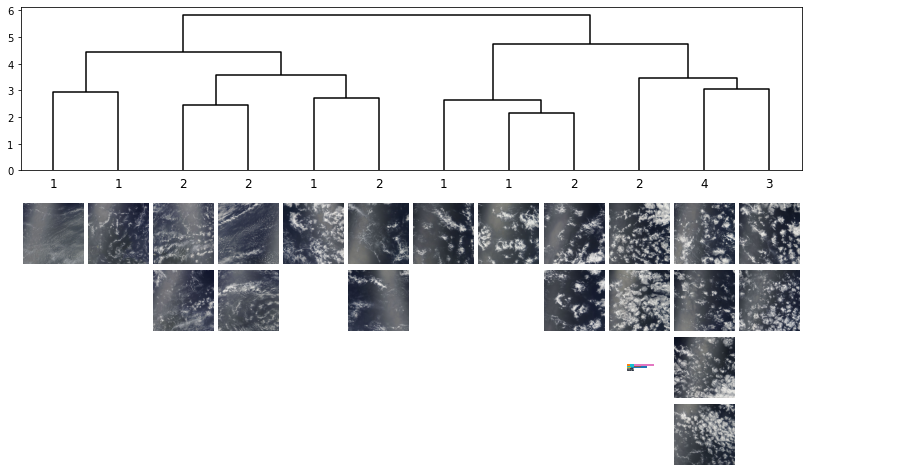

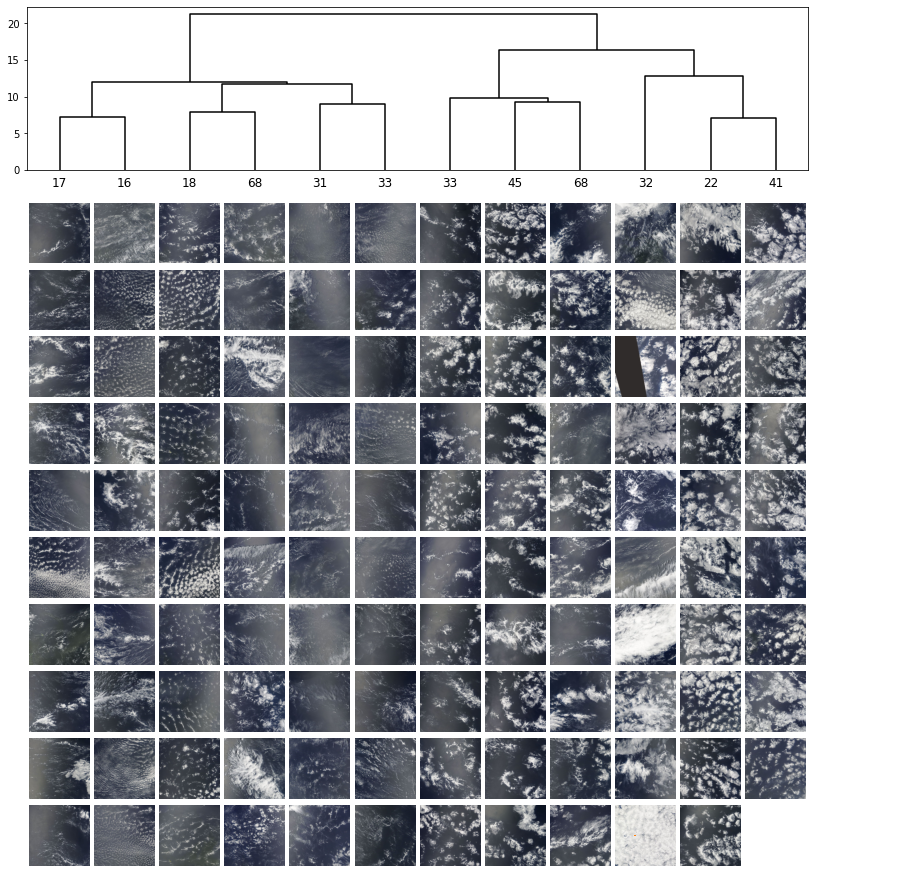

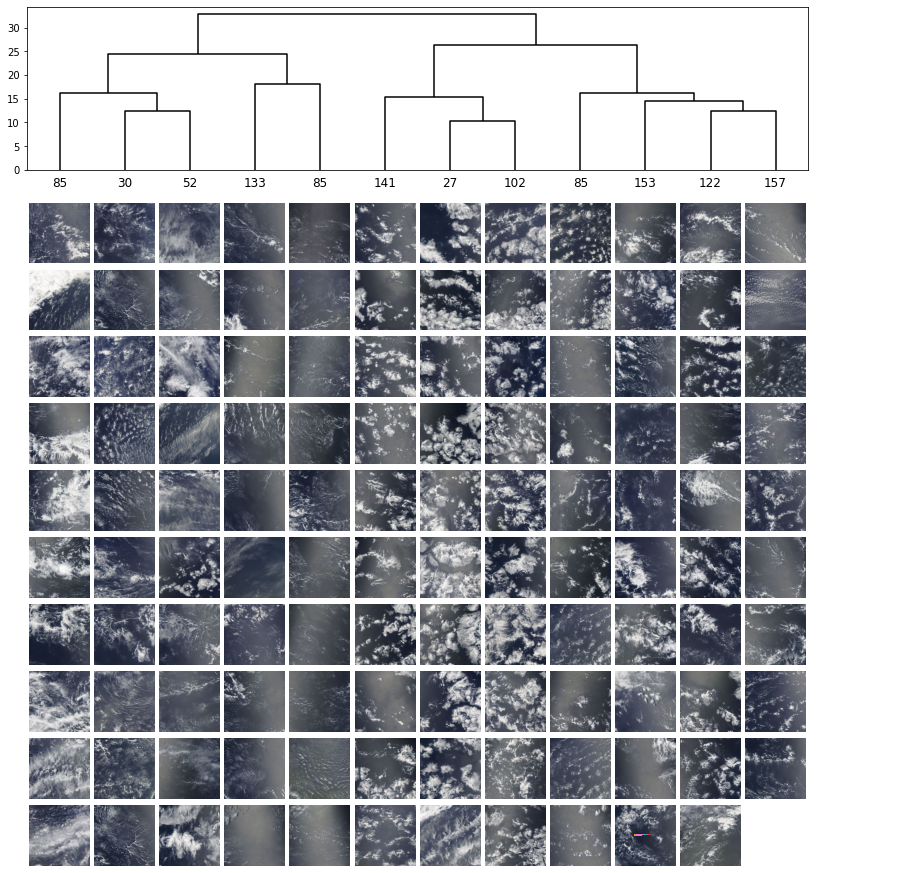

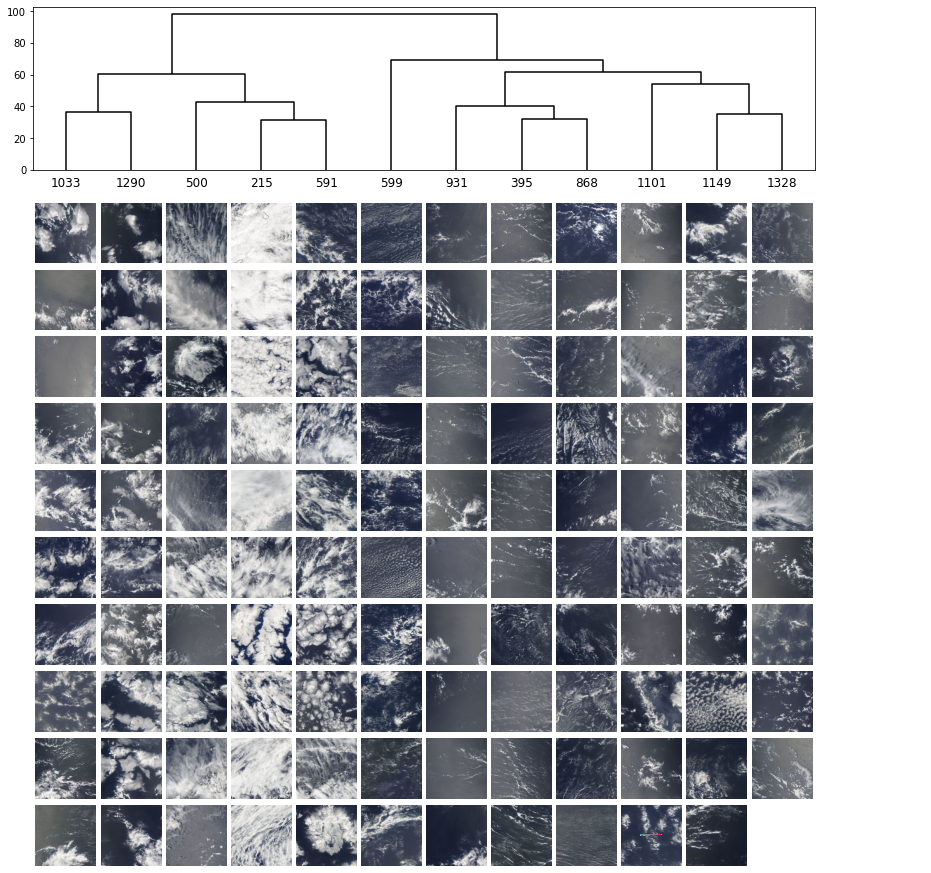

In [3]:
import os
divisions = [256, 512, 612, 850] # 64
#divisions = [612]
for div in reversed(divisions):
    dataset_path =  DATASETS_path+'MULTI_SCALE/'+str(div)+'/'
    print("DATASET : "+str(dataset_path))
    print(os.listdir(dataset_path))
    tile_dataset = ImageSingletDataset(data_dir=dataset_path, tile_type=TileType.ANCHOR)
    da_embeddings = get_embeddings(tile_dataset=tile_dataset, model=model)
    clusters = convml_tt.interpretation.plots.dendrogram(da_embeddings, n_samples=10, n_clusters_max=12, return_clusters=True)#, label_clusters=True)
    
    with open(DATASETS_path+"MULTI_SCALE/"+str(div)+"/labels.pickle", "rb") as handle:
        labs = pickle.load(handle)
    """
    print(len(labs))
    print(len(clusters[1]))
    clclc = list(map(int, clusters[1]))
    cfs_mat = confusion_matrix(labs, clclc)

    associations = ['Fish', 'Flower', 'Gravel', 'Sugar']
    fig, ax = plt.subplots(figsize=(20,10)) 
    plt.title("Confusion Matrix Clusters MODIS model SCALE "+str(div))
    sns.set(font_scale=1.8)
    sns.heatmap(cfs_mat[:4,:], annot=True, fmt='', ax=ax, linewidths=.9, yticklabels=associations)
    fig, ax = plt.subplots(figsize=(20,10))
    print(cfs_mat[:4,:].shape)
    print(   np.sum(  cfs_mat[:4,:], axis=1  ).shape  )
    print(   (  cfs_mat[:4,:].T/np.sum(cfs_mat[:4,:], axis=1)    ).shape  )
    plt.title("Confusion Matrix Clusters MODIS model %  SCALE "+str(div))
    sns.heatmap( (cfs_mat[:4,:].T/np.sum(cfs_mat[:4,:], axis=1)).T, annot=True, 
                fmt='.2%', cmap='Blues' , yticklabels=associations)
    print(len(da_embeddings))
    """
    all_df = {}
    for idx in tqdm(range(len(labs))):
        tm = TILE_FILENAME_FORMAT.format(triplet_id=idx,tile_type='anchor')
        metrics = [
                    'cf',        # Cloud fraction
                #  'cwp',       # Total cloud water path
                    'lMax',      # Max length scale of scene's largest object
                    'periSum',   # Total perimeter of all scene's cloud objects
                    'sizeExp',   # Exponent of cloud size distribution (power law fit)
                    'lMean',     # Mean length of cloud object in scene
                    'specLMom',  # Spectral length scale (Jonker et al. 1999)
                    'cop',       # Convective Organisation Potential White et al. (2018)
                    'scai',      # Simple Convective Aggregation Index Tobin et al. (2012)
                    'nClouds',   # Number of clouds in scene
                #  'rdfMax',    # Max of the radial distribution function of objects
                #  'netVarDeg', # Degree variance of nearest-neighbour network of objects
                    'iOrgPoiss', # Organisation index as used in Tompkins & Semie (2017)
                    'fracDim',   # Minkowski-Bouligand dimension
                    'iOrg',      # Organisation index as modified by Benner & Curry (1998)
                #  'os',        # Contiguous clear sky area estimate (Antonissen, 2019)
                #  'twpVar',    # Variance in CWP anomaly on scales larger than 16 km (Bretherton & Blossey, 2017)
                #  'cthVar',    # Variance in cloud top height
                #  'cwpVarCl',  # Variance in cloud water path
                #  'woi3',      # Wavelet-based organisation index of orientation (Brune et al., 2018)
                    'orie',      # Image raw moment covariance-based orientation metric
                    ]

        filename = DATASETS_path+"MULTI_SCALE/"+str(div)+"/train/"+tm
        img = cv2.imread(filename, 0)

        ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        """
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.figure()
        plt.imshow(thresh1, cmap='gray')
        plt.show()
        """
        filteredDirs = [DATASETS_path+"MULTI_SCALE/"+str(div)+"/train/"]
        metricDirs = ["./visualize/"]

        makeNewDirs(metricDirs)

        createDataFrame.createMetricDF(filteredDirs[0], metrics, metricDirs[0])

        field = thresh1
        fields = {'cm'  : 'Cloud_Mask_1km',
                    'im'  : 'image',
                    'cth' : 'Cloud_Top_Height',
                    'cwp' : 'Cloud_Water_Path'}
        # Specify general parameters for metric computation

        mpar = {'loadPath' : filteredDirs[0],'savePath' : metricDirs[0],'bc':'','save'     : True,'saveExt'  : '',    'resFac'   : 1,    'plot'     : False, 'con'      : 1,     'areaMin'  : 4,     'fMin'     : 0,    'fMax'     : None,  'fields'   : fields, 'nproc':1,}


        #computeMetrics.computeMetrics(metrics,mpar)
        fields = {'cm'  : thresh1,
                    'im'  : img,
                    'cth' : 'Cloud_Top_Height',
                    'cwp' : 'Cloud_Water_Path'}
        df = computeMetrics.evaluateMetrics(metrics, fields, mpar)

        OBJ = thresh1
        OBJ = np.ma.masked_array(OBJ, mask=(OBJ==0))
        cloudprop = measure.regionprops(OBJ)
        objmask = tl.do_unique(deepcopy(OBJ))
        try:
            df['area'] = np.asarray([prop.area for prop in cloudprop])
            df['ecc']  = np.asarray([prop.eccentricity for prop in cloudprop])
            df['eqdia'] = np.asarray([prop.equivalent_diameter for prop in cloudprop])
            df['scai initi']   = tl.scai(cloudprop, objmask, connectivity=1)
            df['mean_area'] = np.mean(int(df['area']))
            df['frac'] = np.sum(OBJ)/np.prod(np.shape(OBJ))
            df['filename'] = tm
        except:
            df['area'] = 0
            df['ecc']  = 0
            df['eqdia'] = 0
            df['scai initi']   = 0
            df['mean_area'] = 0
            df['frac'] = 0
            df['filename'] = tm
        if idx==0:
                all_df = df
        else:
                pieces = [all_df, df]
                all_df = pd.concat(pieces)
    all_df['labels'] = labs
    all_df['clusters'] = list(clusters[1])
    print(all_df)
    file_name = str(div)+" scale clouds physics metrics.csv"
    all_df.to_csv(file_name, sep='\t', encoding='utf-8')
    """
    
    collected = {}
    collected["areas"] = []
    collected["eccs"] = []
    collected["eqdias"]= []
    collected["fracs"] = []
    collected["mean_areas"] = []
    for idx in tqdm(range(len(labs))):
        
        #idx = 4
        tm = TILE_FILENAME_FORMAT.format(triplet_id=idx,tile_type='anchor')
        filename = DATASETS_path+"MULTI_SCALE/"+str(div)+"/train/"+tm
        #print("filename : "+str(filename))
        #print("filename : "+str(filename))
        img = cv2.imread(filename, 0)

        ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
        
        plt.figure()
        plt.imshow(img, cmap='gray')
        plt.figure()
        plt.imshow(thresh1, cmap='gray')
        plt.show()
        
        OBJ = thresh1
        OBJ = np.ma.masked_array(OBJ, mask=(OBJ==0))
        cloudprop = measure.regionprops(OBJ)
        objmask = tl.do_unique(deepcopy(OBJ))

        area = np.asarray([prop.area for prop in cloudprop])
        ecc  = np.asarray([prop.eccentricity for prop in cloudprop])
        eqdia = np.asarray([prop.equivalent_diameter for prop in cloudprop])
        frac = np.sum(OBJ)/np.prod(np.shape(OBJ))
        #nd = tl.neighbor_distance(cloudprop, mindist=30)
        #indice1 = tl.scai(cloudprop, objmask, connectivity=1)
        #indice2 = tl.iorg(nd, objmask)
        mean_area = np.mean(area)
        #print("AREA : "+str(area))
        try:
            collected["areas"].append(area[0])
            collected["eccs"].append(ecc[0])
            collected["eqdias"].append(eqdia[0])
            collected["fracs"].append(frac)
            collected["mean_areas"].append(mean_area)

        except:
            collected["areas"].append(0)
            collected["eccs"].append(0)
            collected["eqdias"].append(0)
            collected["fracs"].append(0)
            collected["mean_areas"].append(0)
        #collected["nd"].append(nd[0])
        #indices1.append(indice1)
        #indices2.append(indice2[0])

    collected["clusters"] = clusters[1]
    variables = ["mean_areas", "eccs", "fracs", "eqdias"]
    
    sns.set(rc={'figure.figsize':(10, 10)})
    sns.set_theme(style="whitegrid")
    data = {}
    data = collected
    df = pd.DataFrame.from_dict(data)


    print(df)
    try:
        os.makedirs("visualize/"+str(div))
    except:
        pass
    corrcoefs = []
    for var in variables:
        
        corrcoef = np.corrcoef(np.array(clusters[1]), np.array(data[var]))
        corrcoefs.append(corrcoef[0][1])
        
        fig, ax = plt.subplots(figsize=(20,10)) 
        sns.barplot(x = "clusters", y = var, data = df, ci="sd")
        plt.yticks(fontsize=20)
        plt.xticks(fontsize=20)

        ax.set_ylabel(var, fontsize=20)
        ax.set_xlabel("Cluster", fontsize=20)
        fig.suptitle("Plot of "+str(var)+" per cluster with images of scale "+str(div), fontsize=20)
        plt.savefig("visualize/"+str(div)+"/Plot_of_"+str(var)+"_per_cluster_with_images_of_scale_"+str(div)+".png")
        plt.show()

    fig, ax = plt.subplots(figsize=(23,4)) 
    sns.set(font_scale=1.8)
    sns.heatmap([corrcoefs], annot=True, fmt='', ax=ax, linewidths=.9, xticklabels=list(variables))
    plt.xticks(fontsize=20)
    fig.suptitle("Plot of corrcoefs with clusters with images of scale "+str(div), fontsize=20)
    plt.savefig("visualize/"+str(div)+"/Plot_"+str(var)+"_corrcoef_with_clusters_with_images_of_scale_"+str(div)+".png")
    plt.show()
    """ 

      Unnamed: 0   cf        lMax     periSum   sizeExp      lMean  specLMom  \
0              0  0.0   72.753007   77.154284 -0.989098  17.853751       NaN   
1              0  0.0   38.405729   29.721934 -1.306331   8.268638       NaN   
2              0  0.0   84.723078   49.619204 -1.565382  12.548122       NaN   
3              0  0.0   65.551506   47.288286 -1.090247  11.862820       NaN   
4              0  0.0   83.510478   45.093639 -1.186664  10.639041       NaN   
...          ...  ...         ...         ...       ...        ...       ...   
9995           0  0.0   16.431677   15.597989 -1.702276   4.630183       NaN   
9996           0  0.0    7.211103    9.186758  0.507658   3.271984       NaN   
9997           0  0.0  190.782599   78.424694 -1.395078  26.663541       NaN   
9998           0  0.0  217.345347  120.532798 -0.868620  40.863524       NaN   
9999           0  0.0   67.037303   43.520467 -1.934212  10.457220       NaN   

           cop      scai  nClouds  ... 

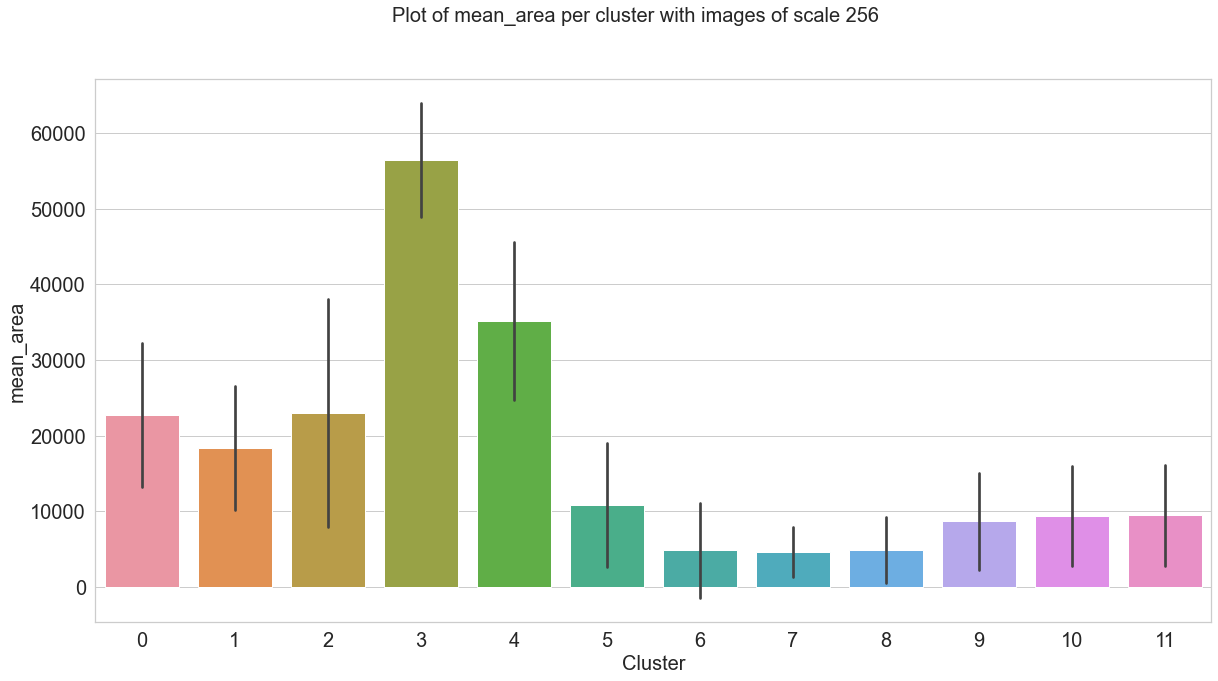

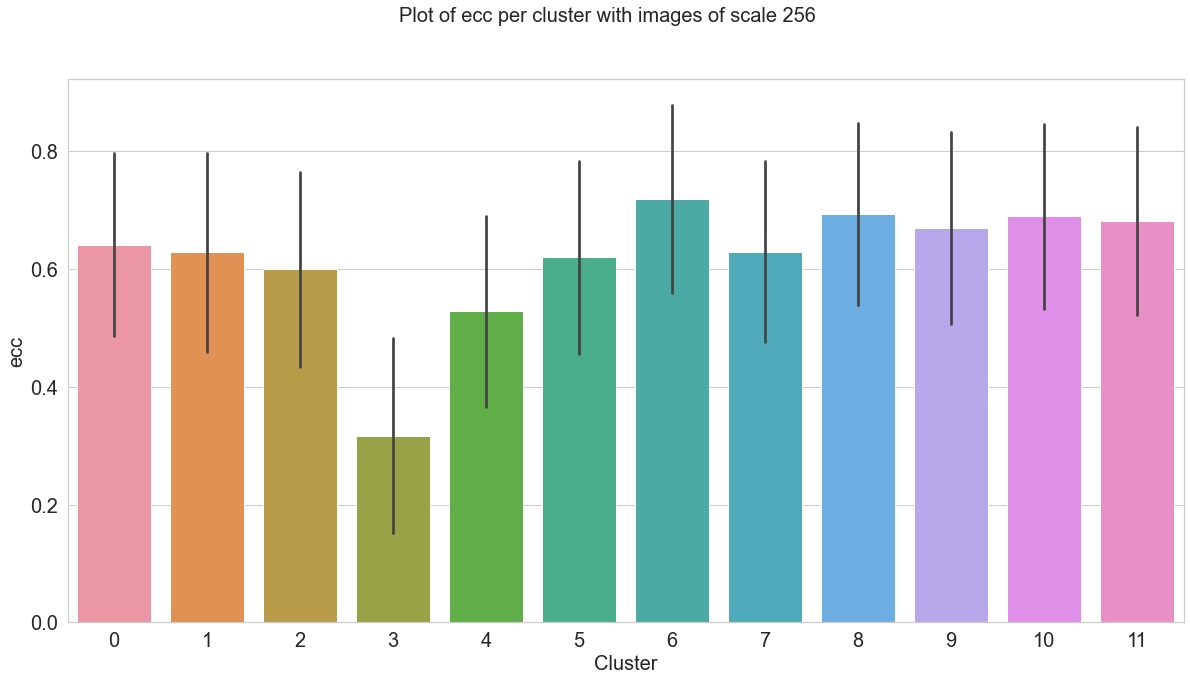

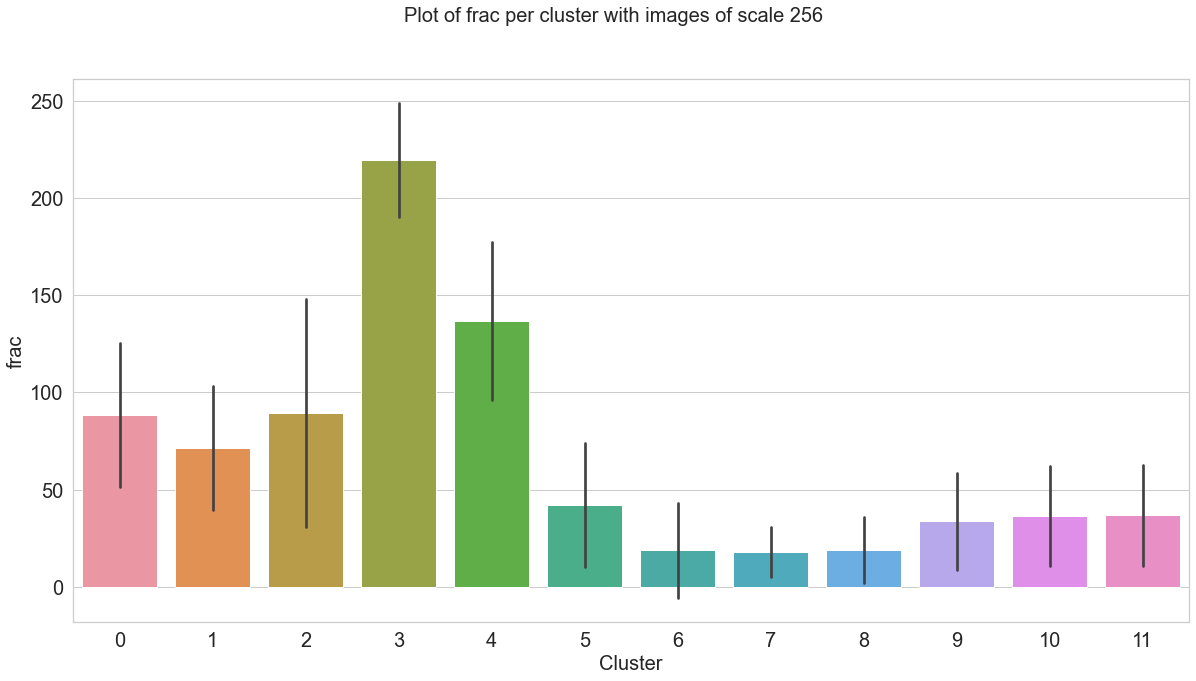

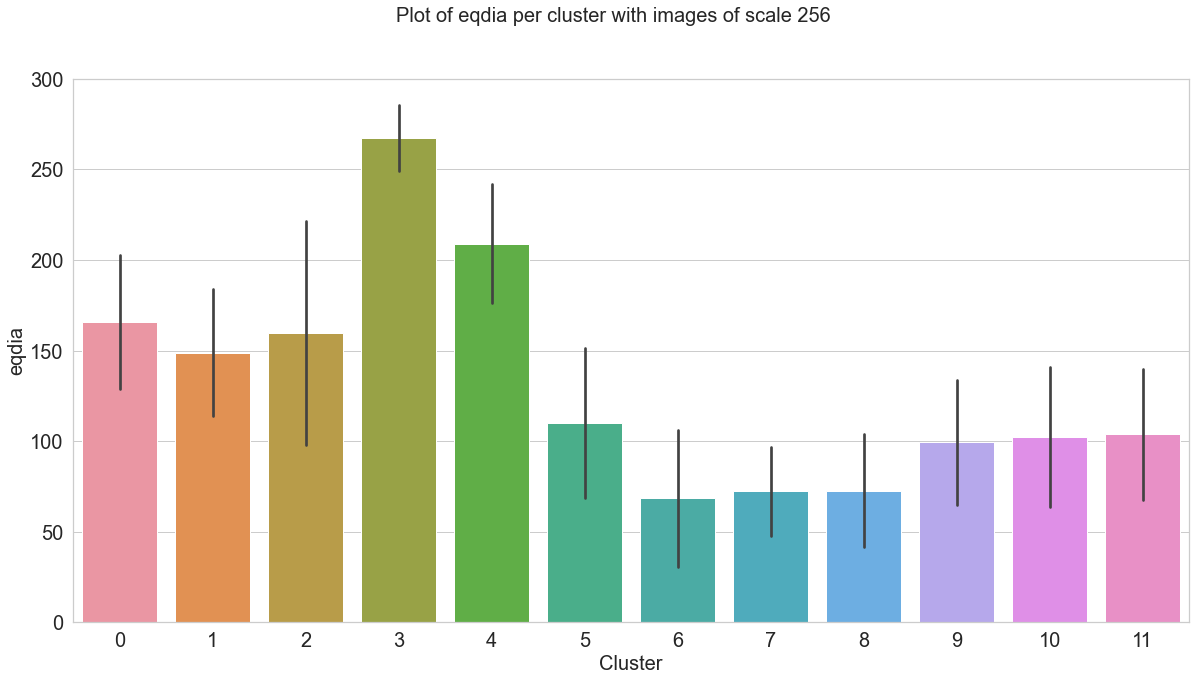

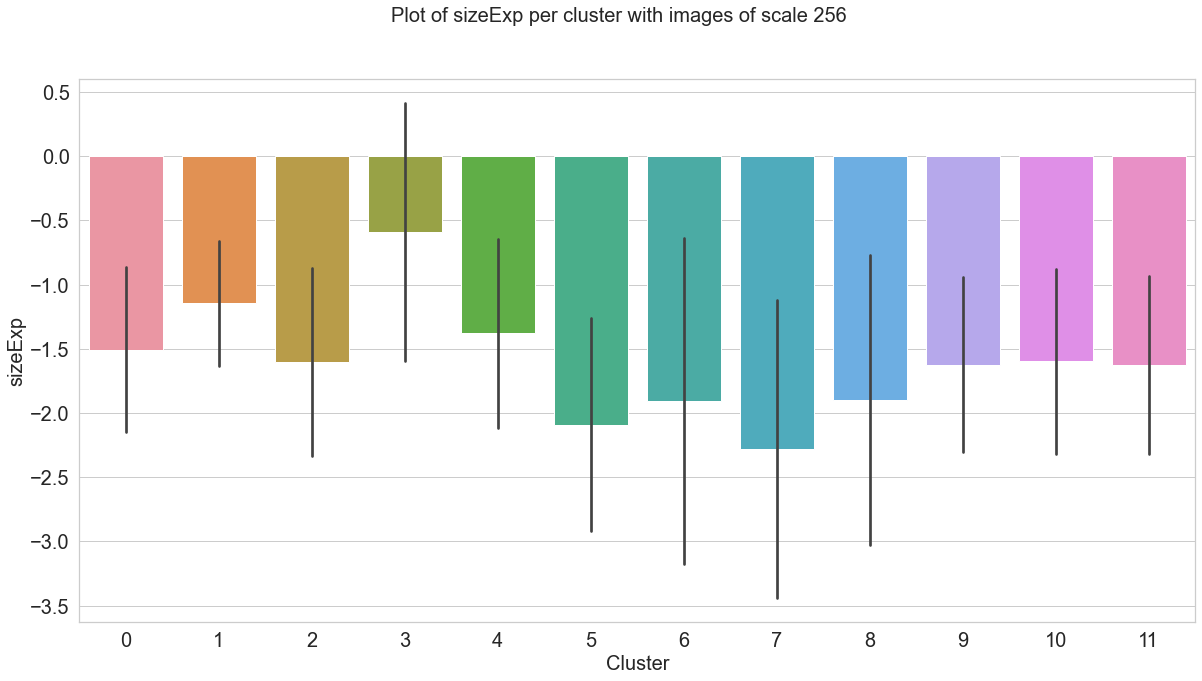

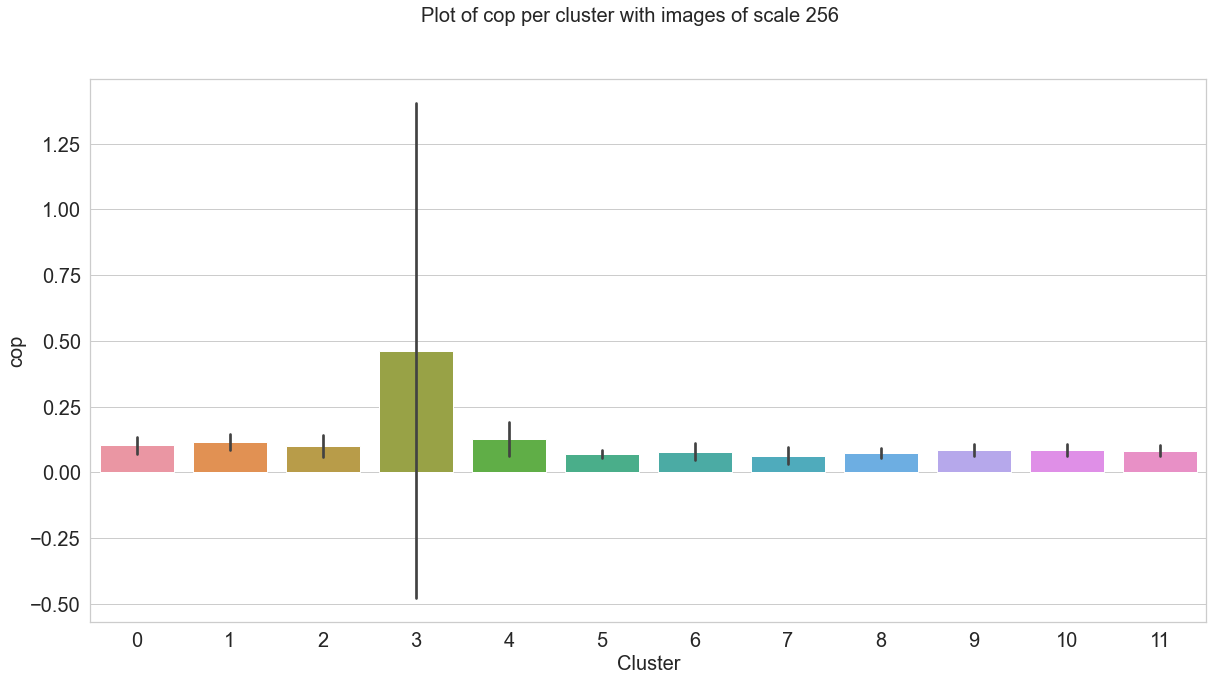

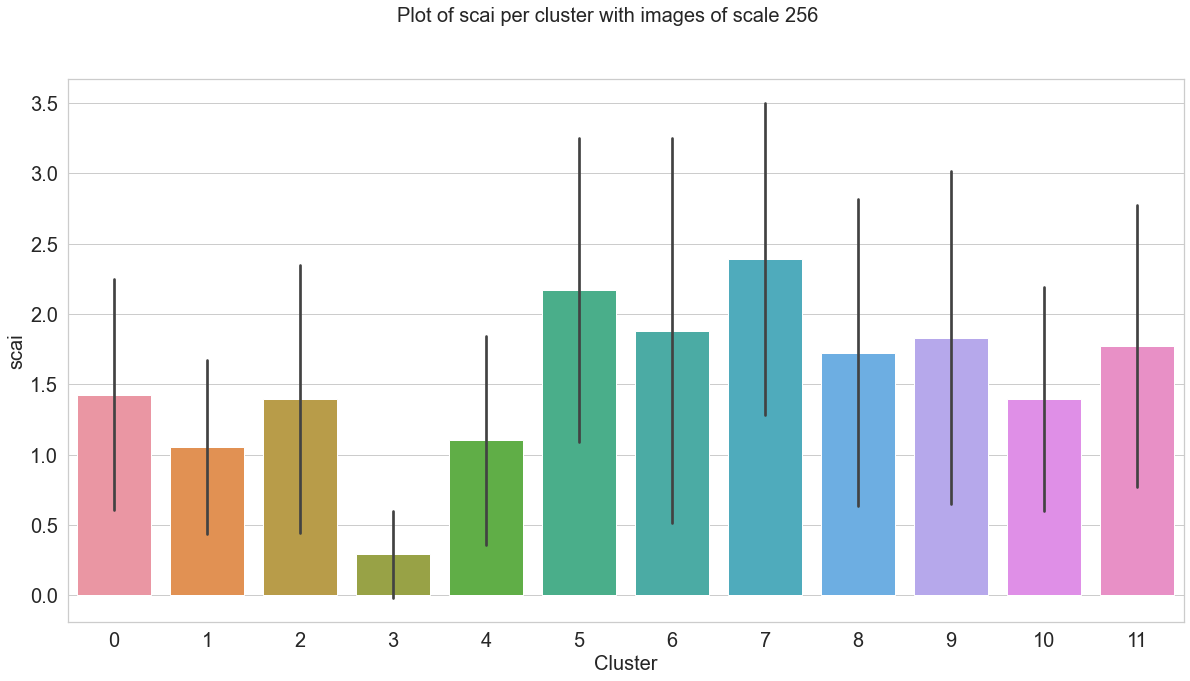

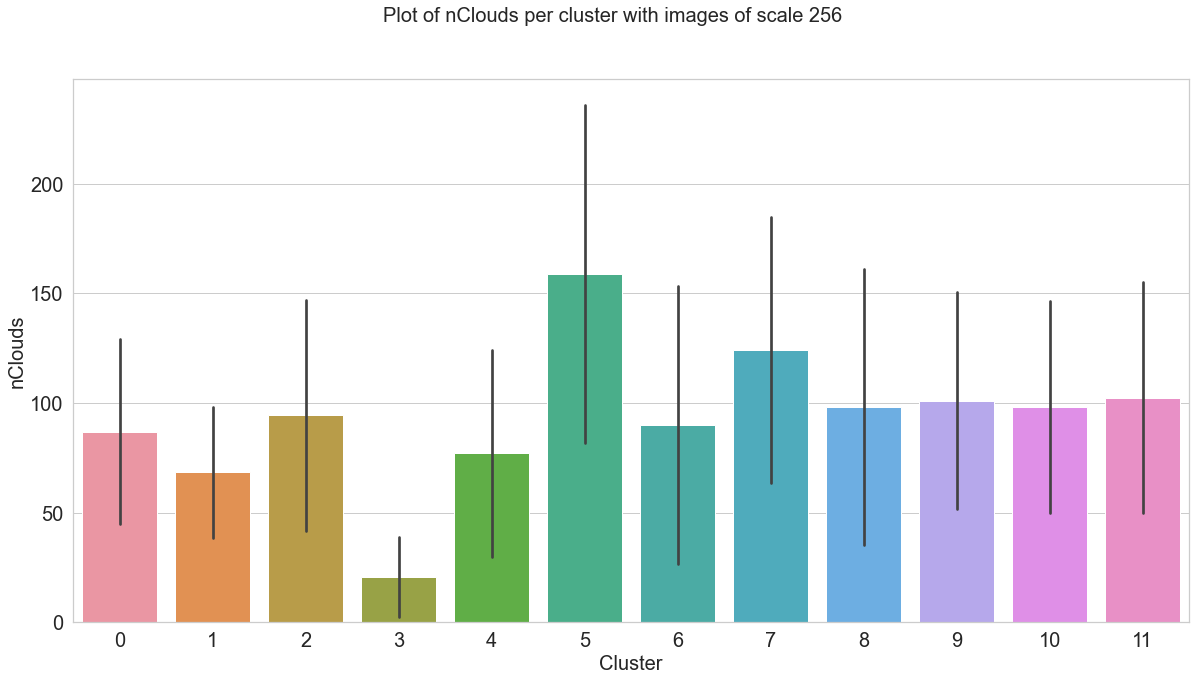

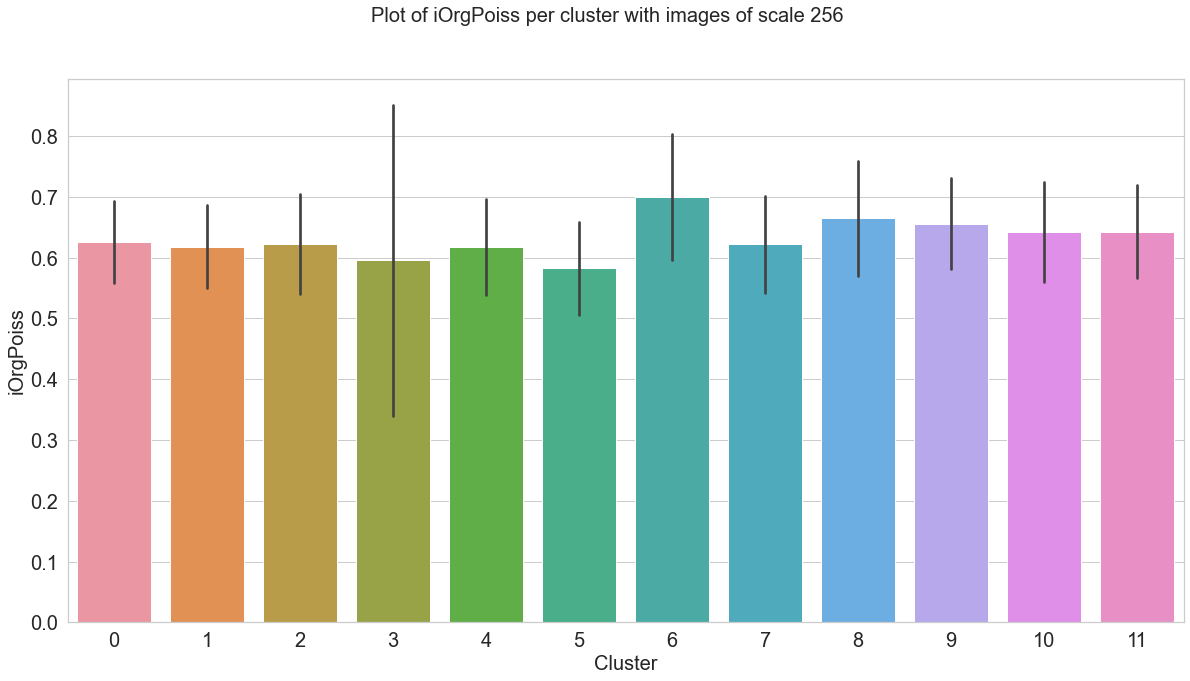

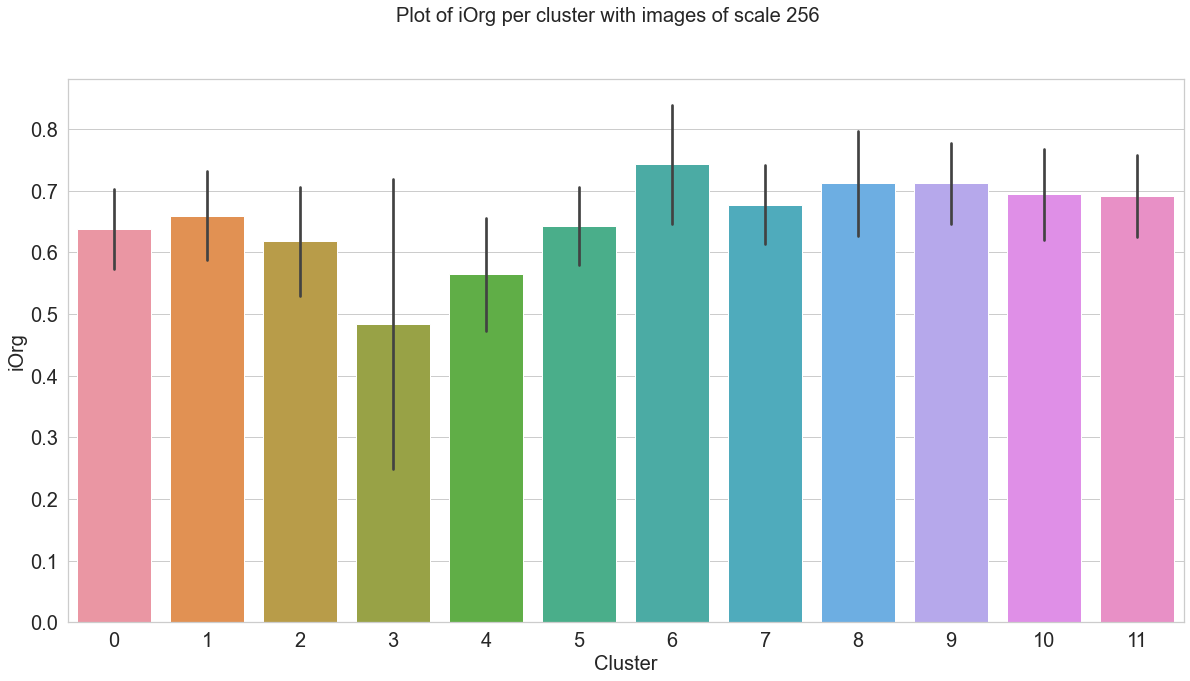

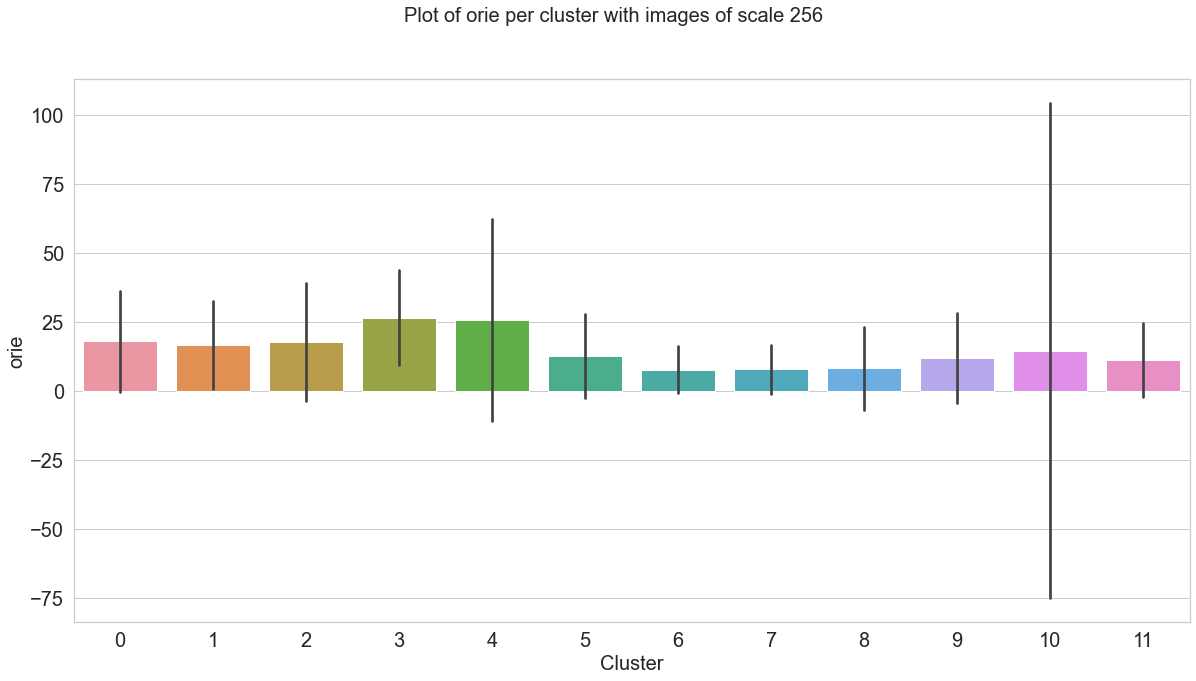

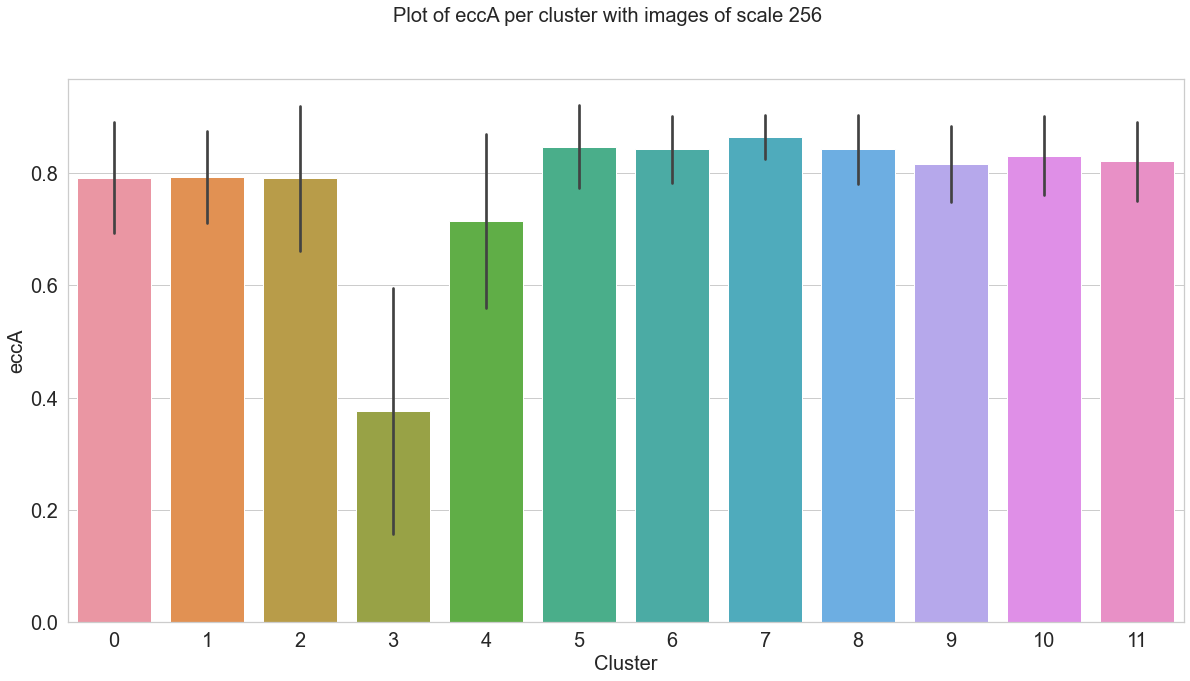

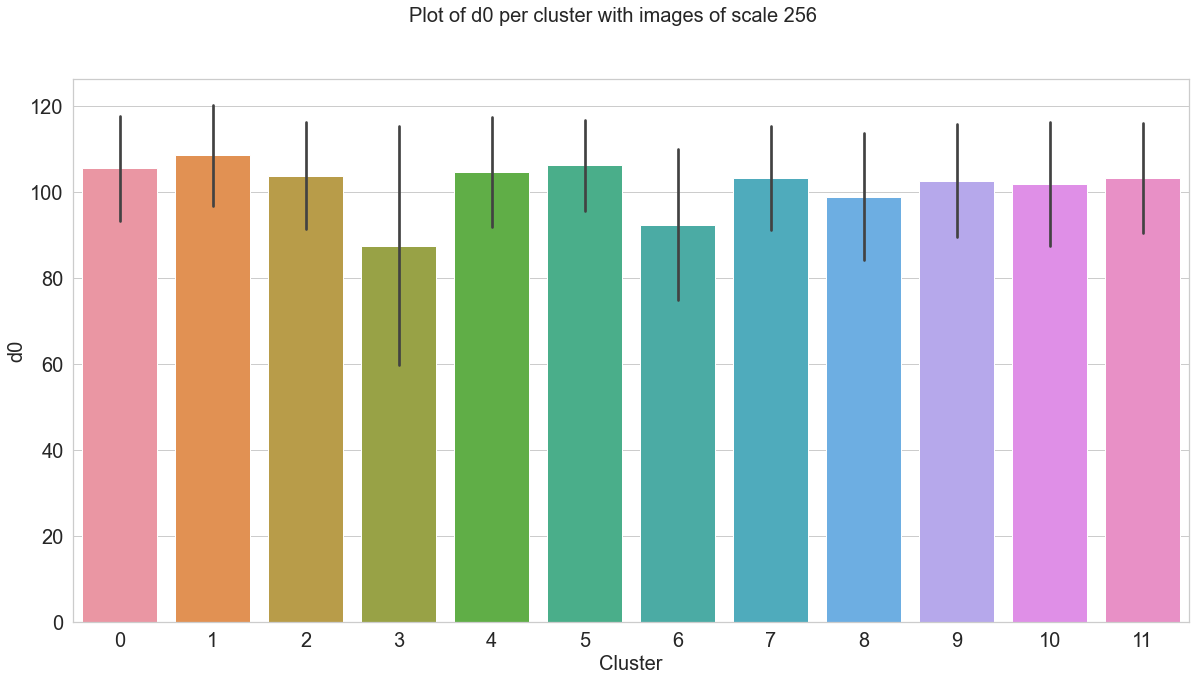

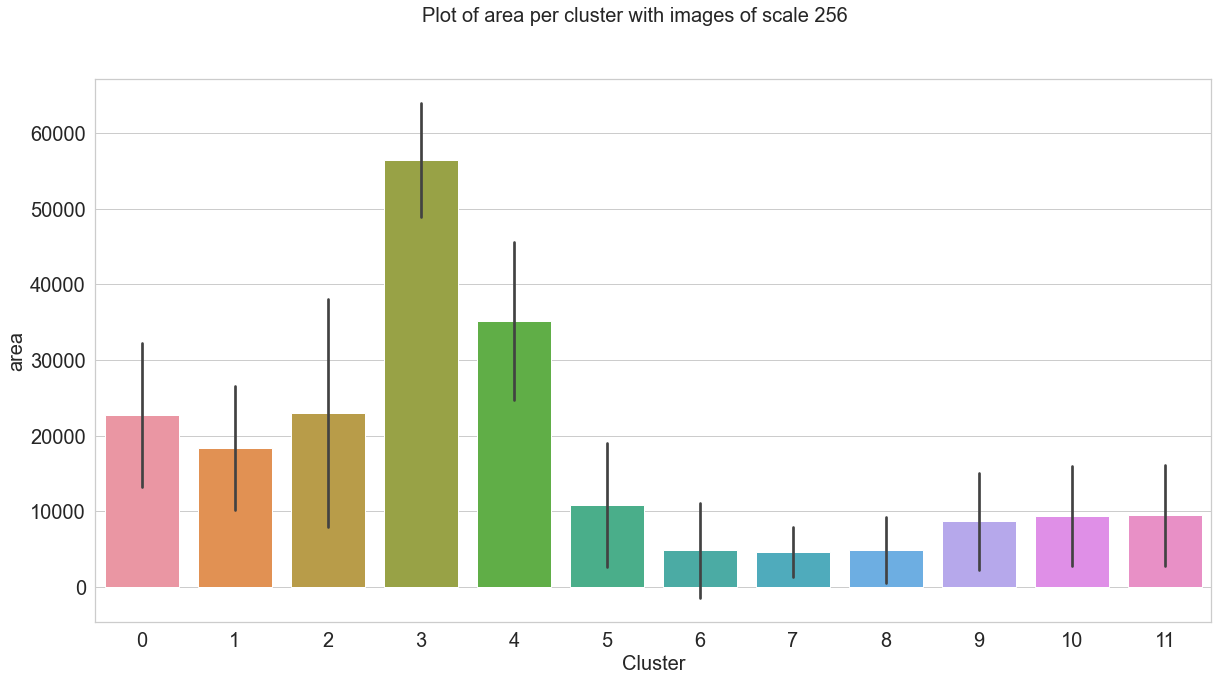

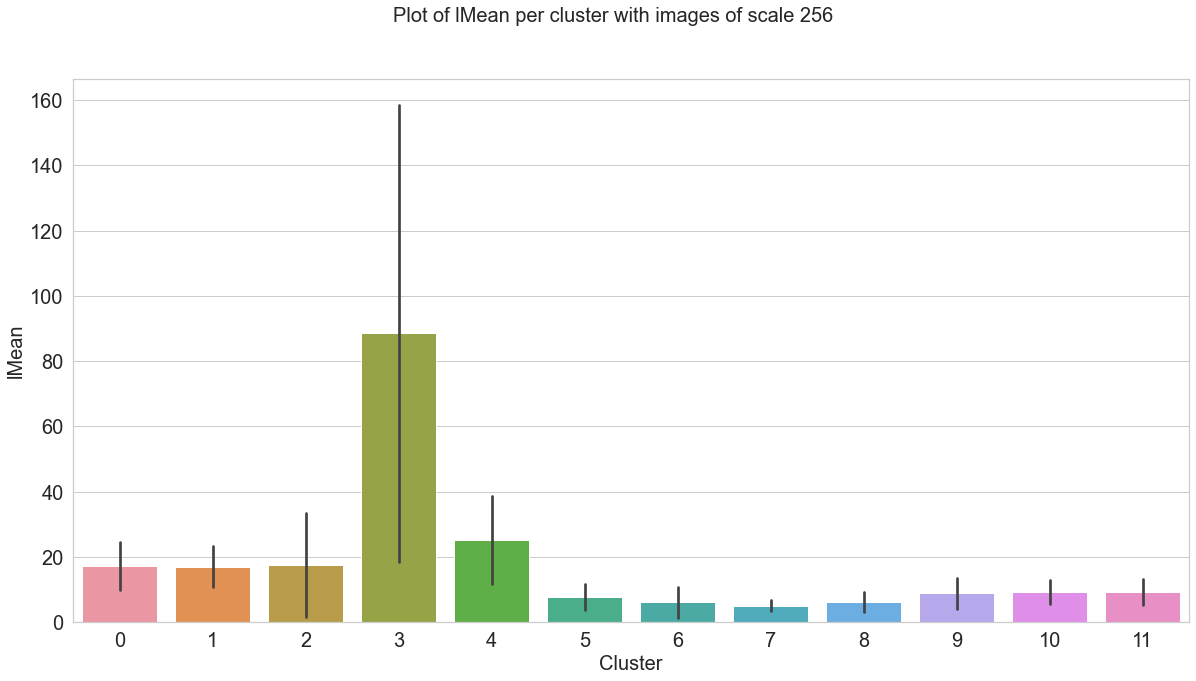

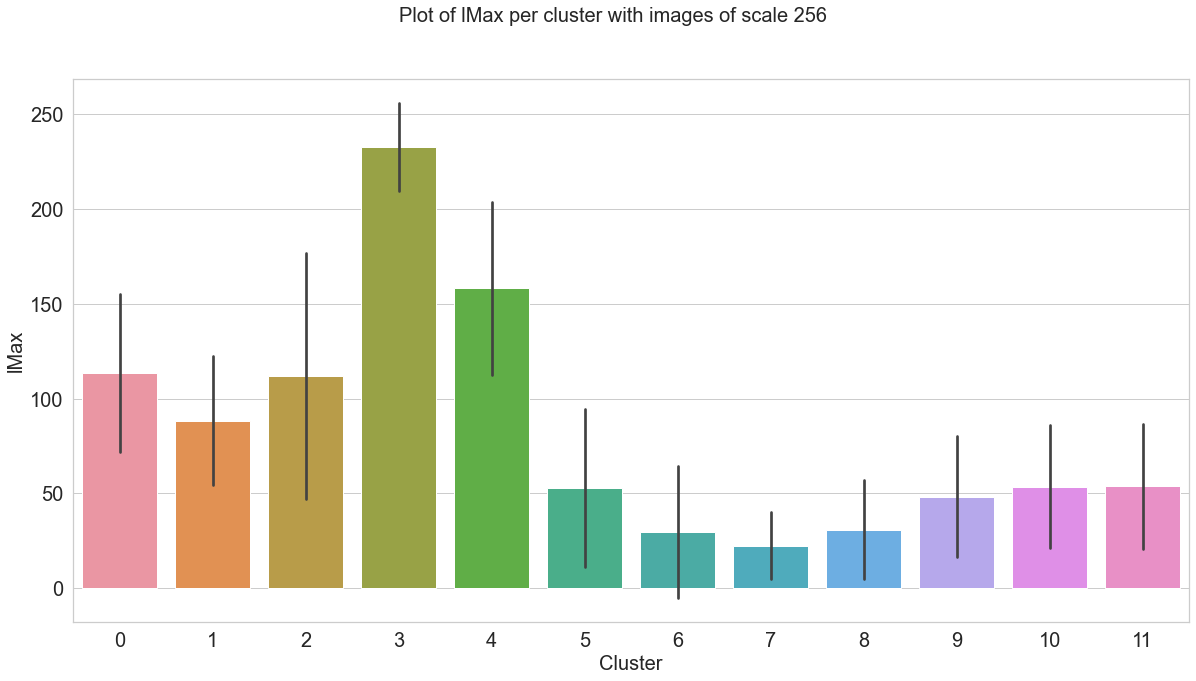

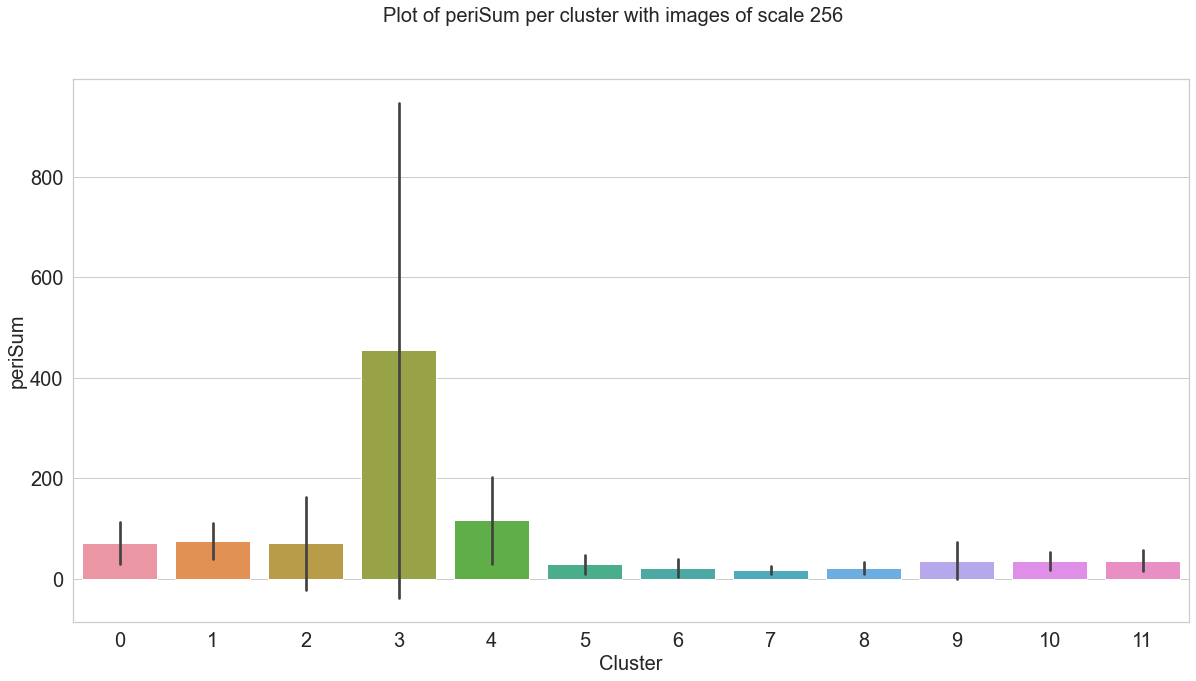

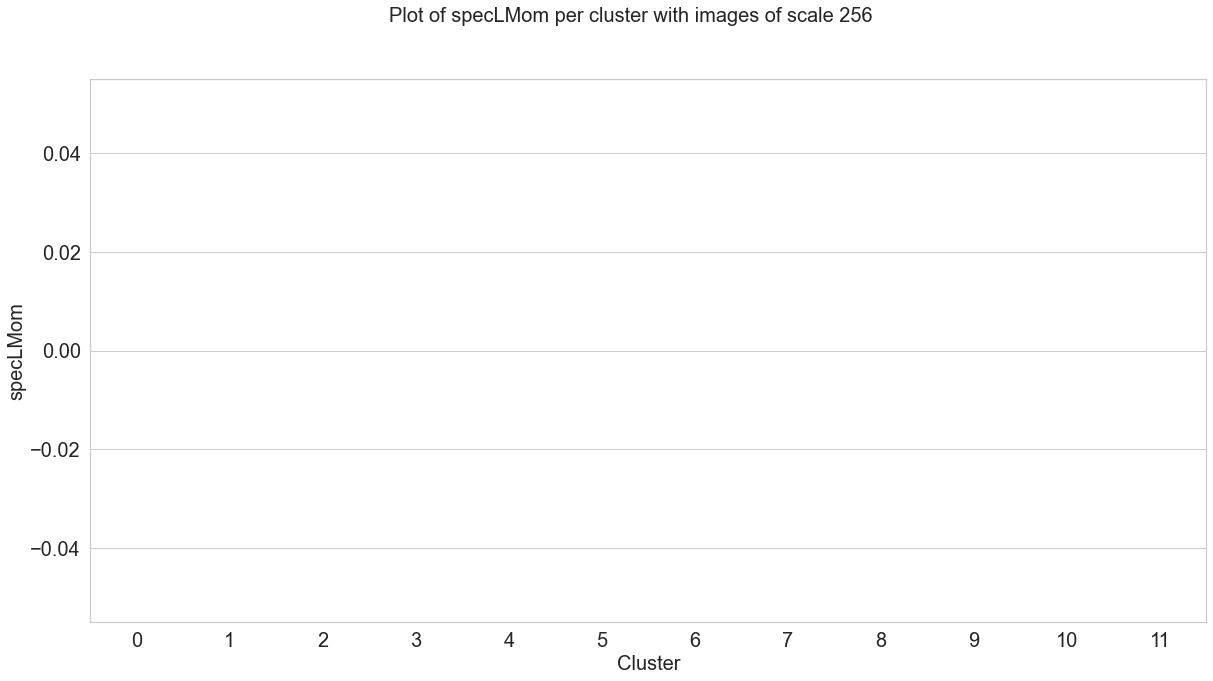

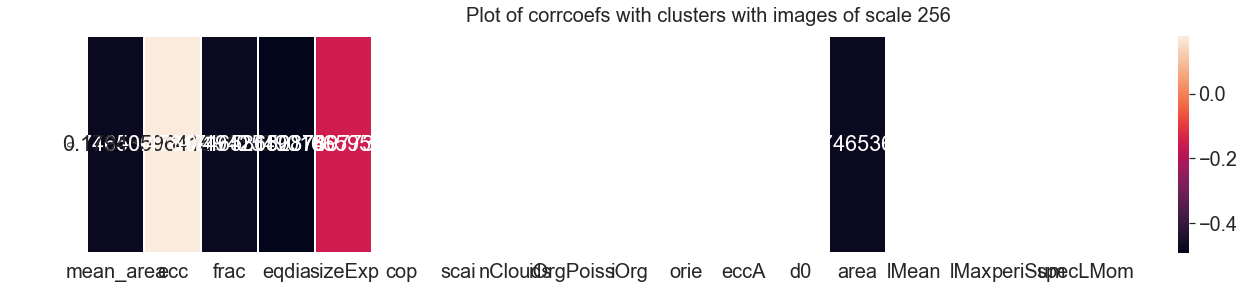

      Unnamed: 0   cf       lMax    periSum   sizeExp      lMean  specLMom  \
0              0  0.0  21.517435  21.339088 -1.491044   5.737390       NaN   
1              0  0.0  45.365185  53.219545 -1.031016  11.249859       NaN   
2              0  0.0  40.149720  27.832807 -1.624804   7.627701       NaN   
3              0  0.0  43.943145  34.718460 -1.290044   8.735427       NaN   
4              0  0.0  23.979158  28.589104 -1.153050   6.719868       NaN   
...          ...  ...        ...        ...       ...        ...       ...   
1167           0  0.0  50.099900  44.376603 -1.309039   9.892539       NaN   
1168           0  0.0  46.443514  22.979250 -2.384825   6.010204       NaN   
1169           0  0.0  41.833001  39.915110 -1.598174   9.054909       NaN   
1170           0  0.0  20.808652  17.988510 -2.716438   5.080082       NaN   
1171           0  0.0  73.641021  32.019501 -1.407273   9.048426       NaN   

           cop      scai  nClouds  ...          d0   area      

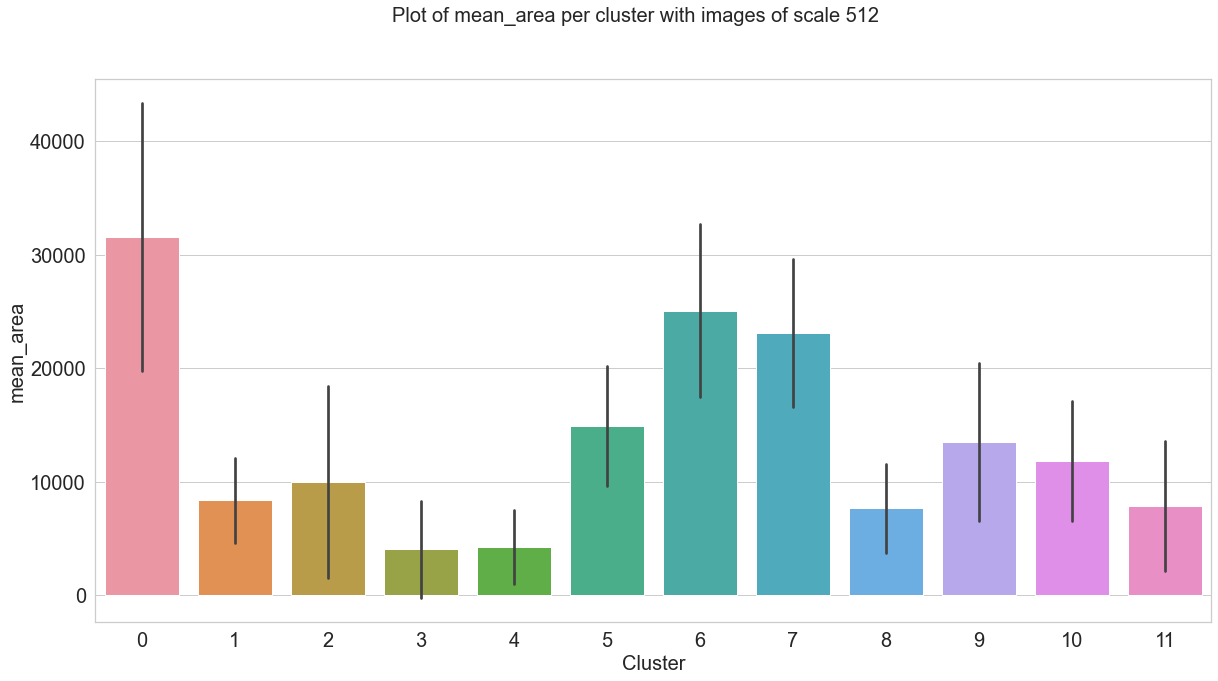

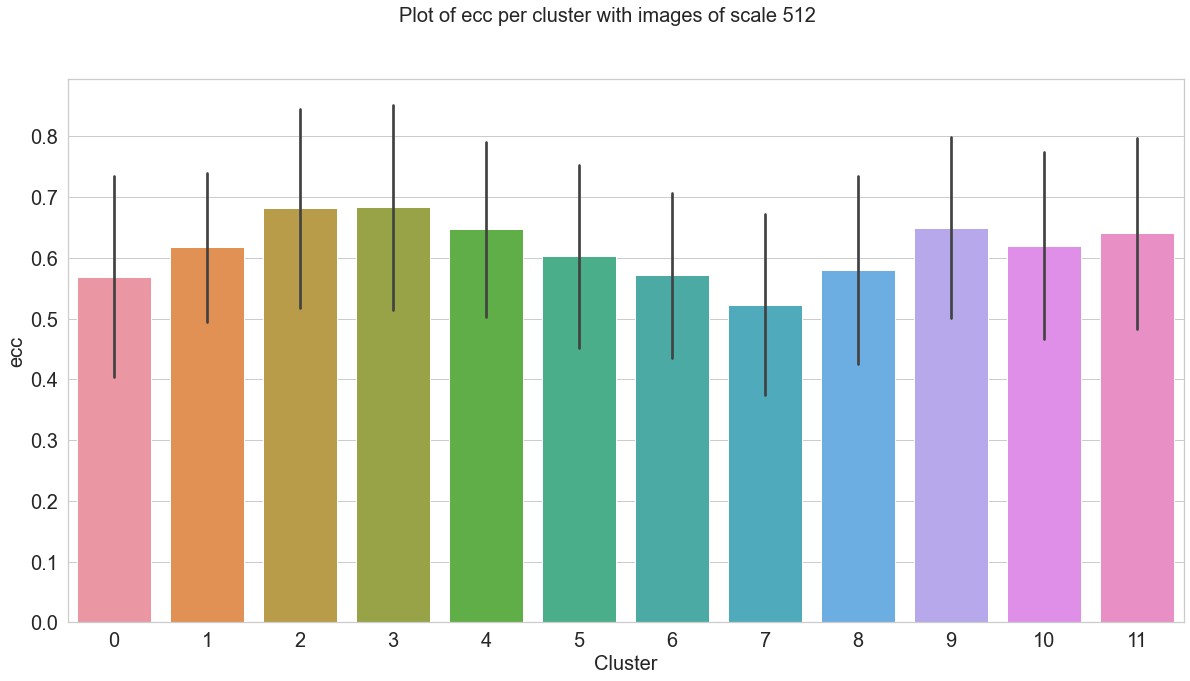

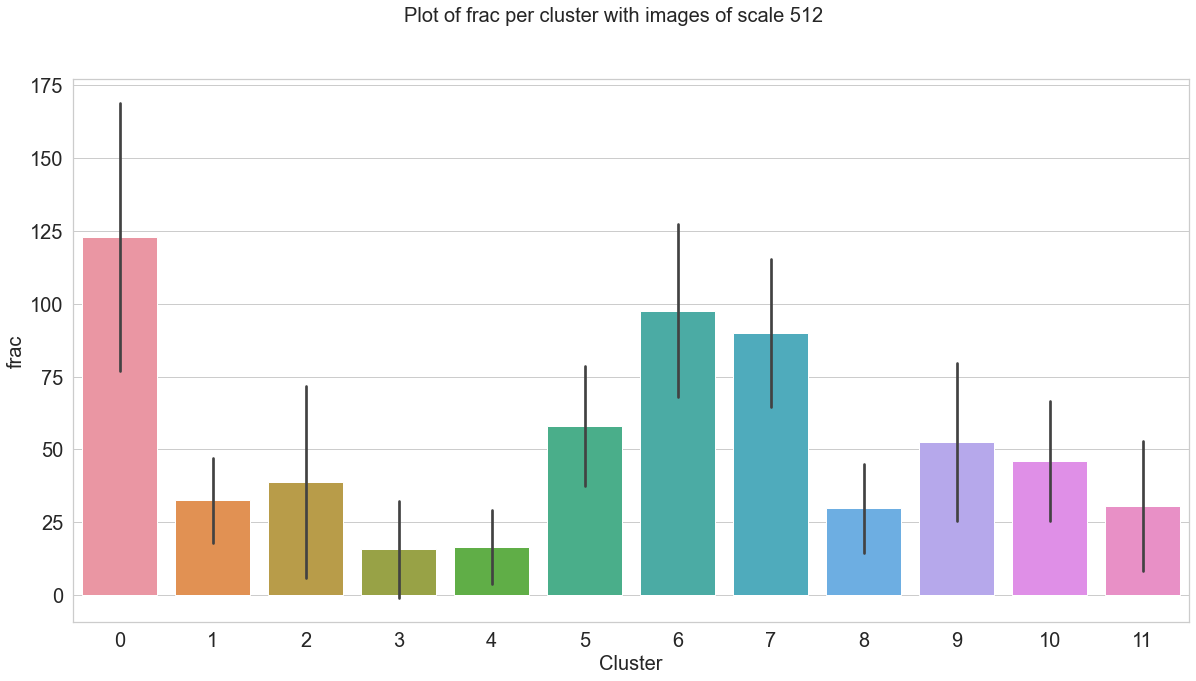

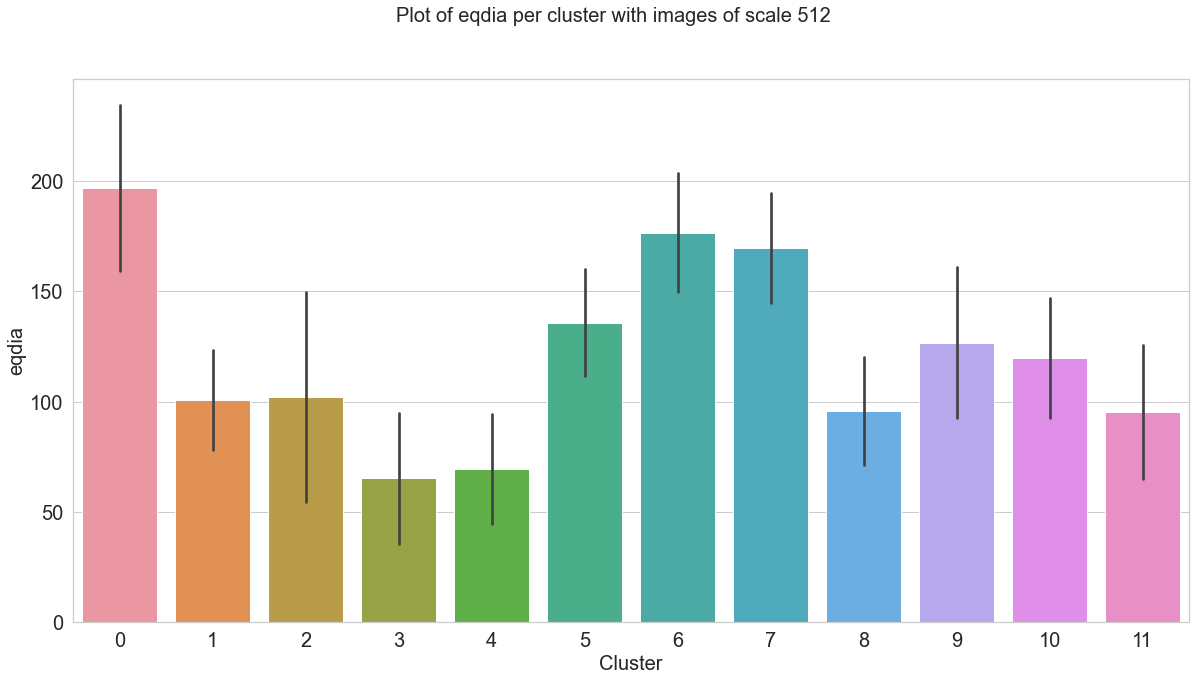

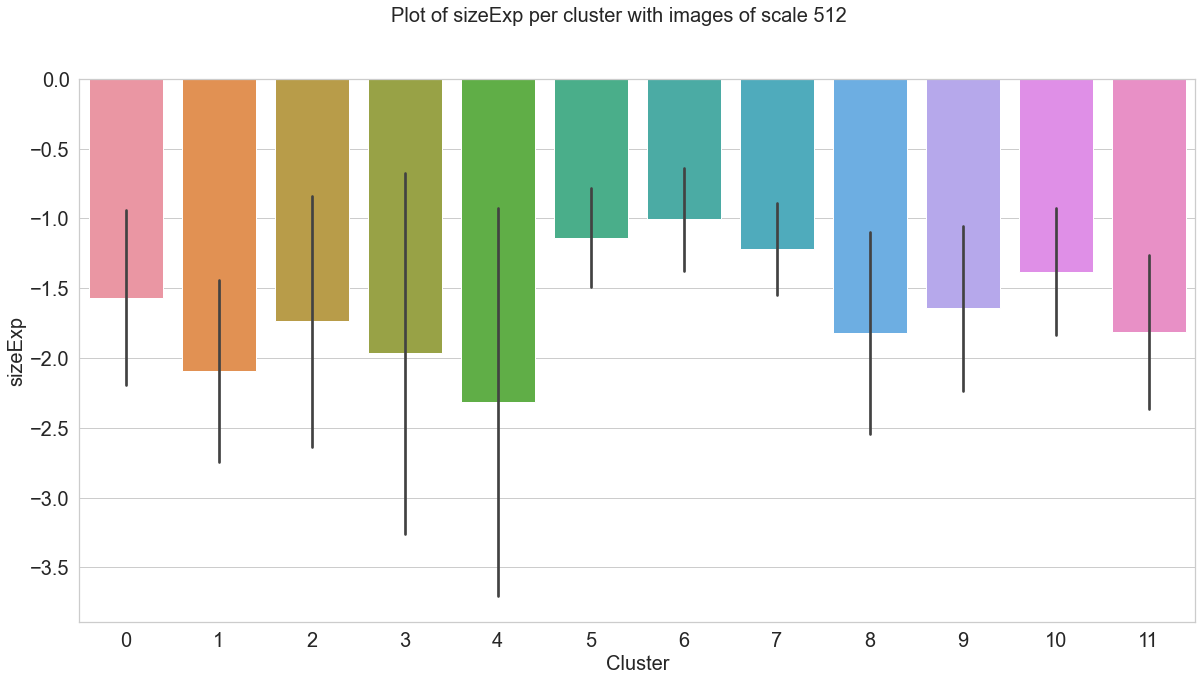

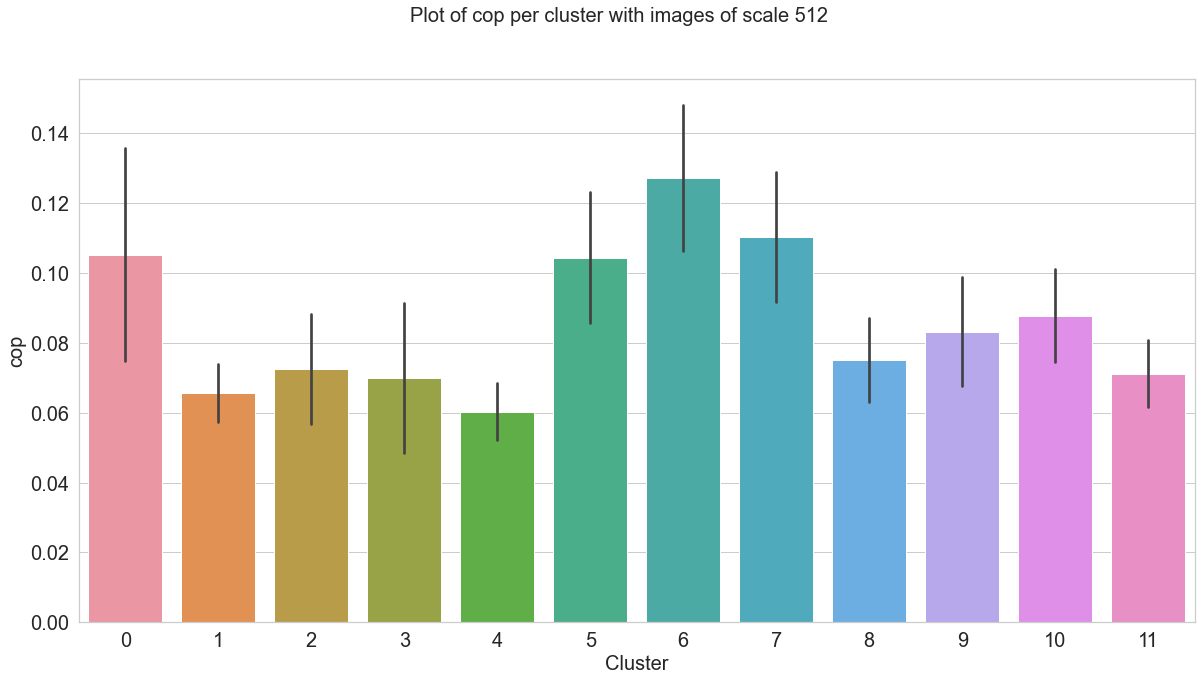

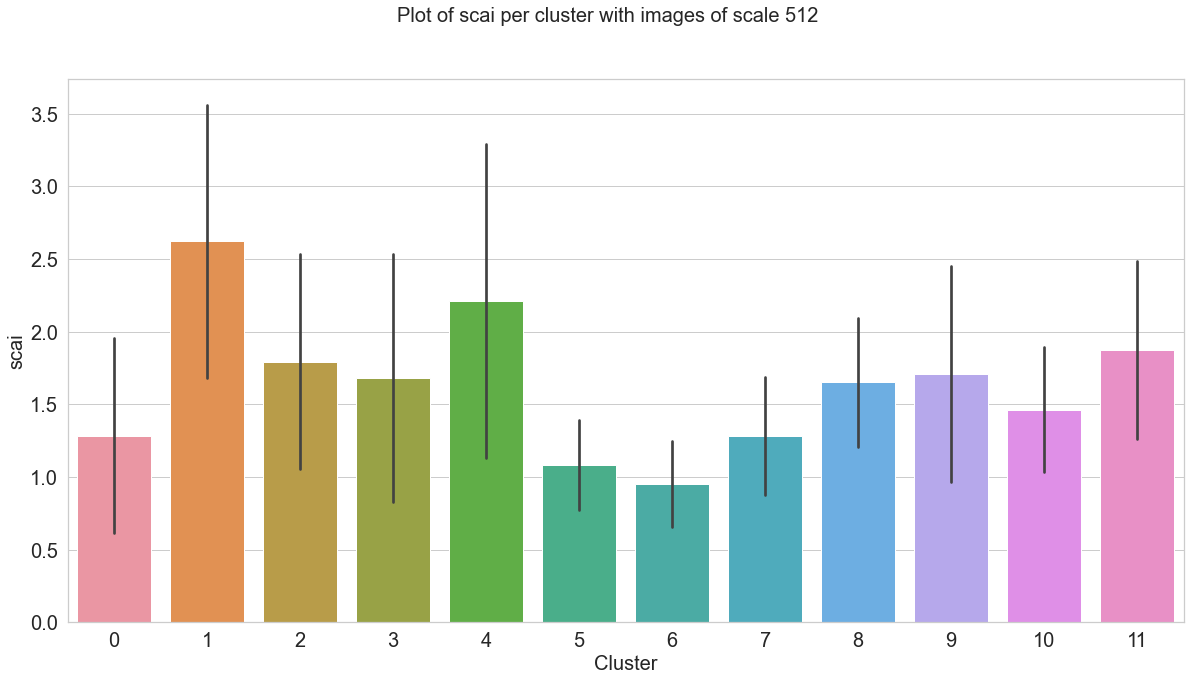

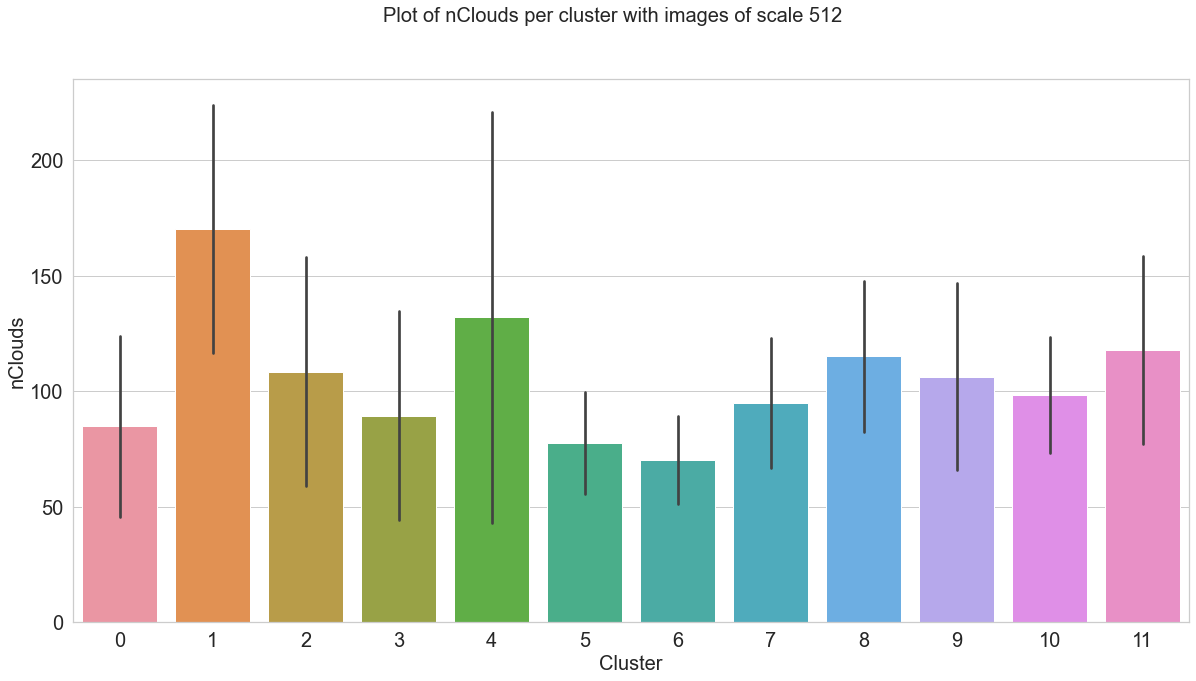

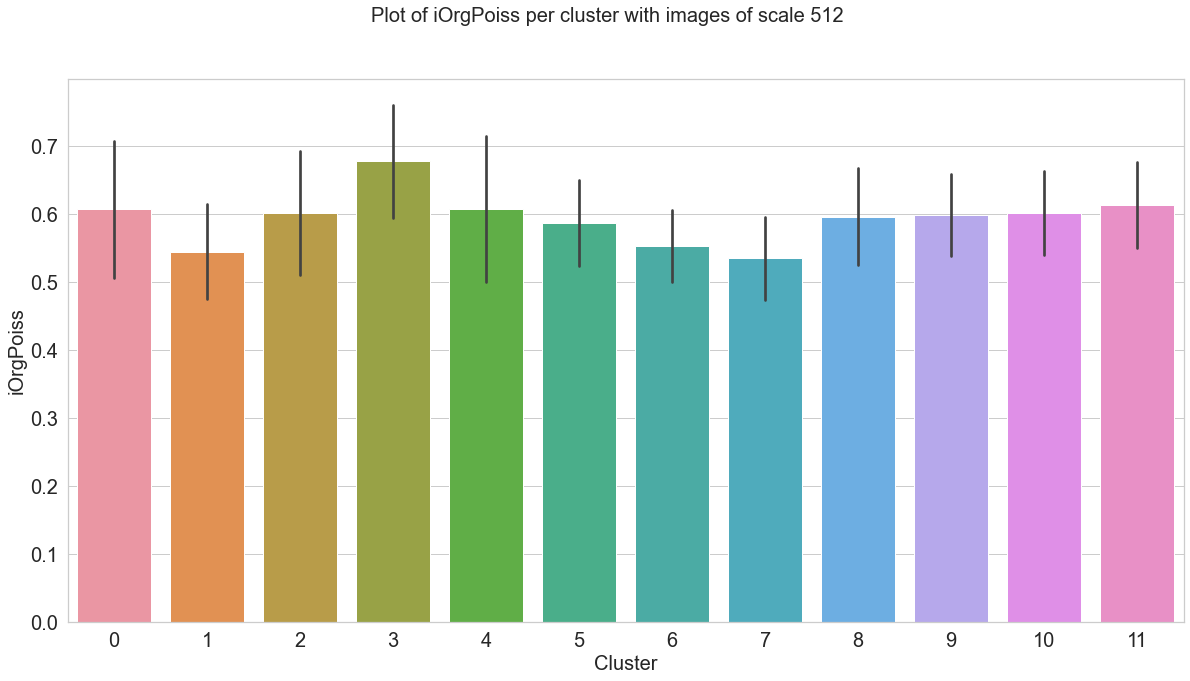

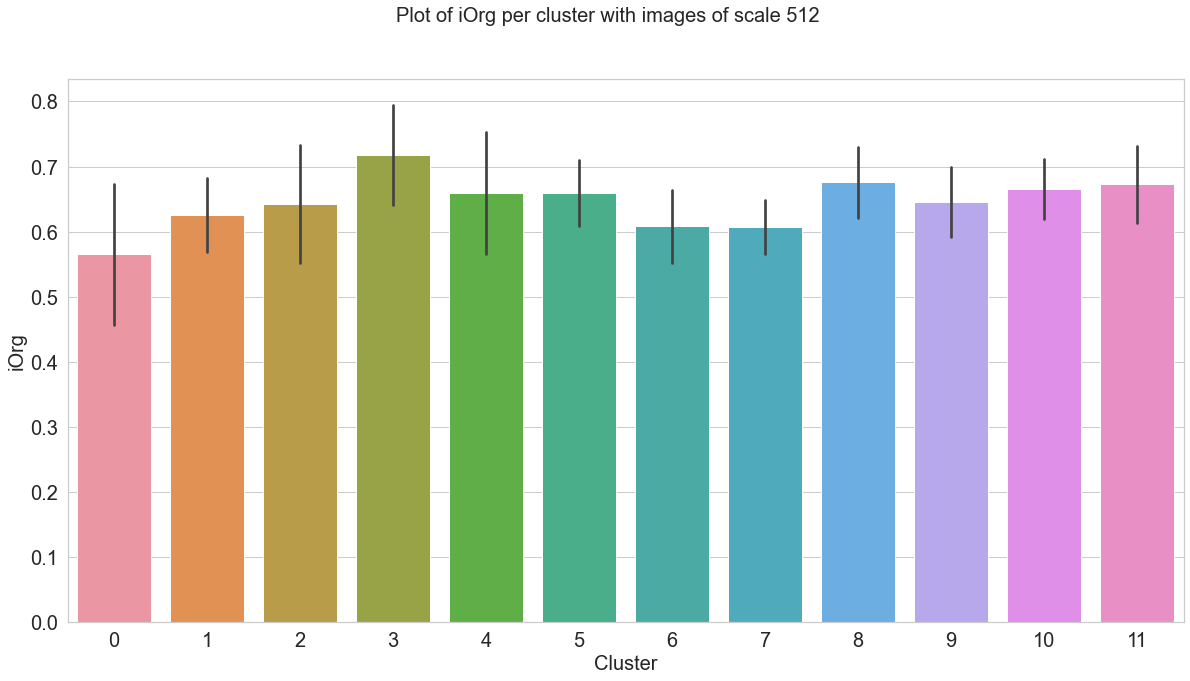

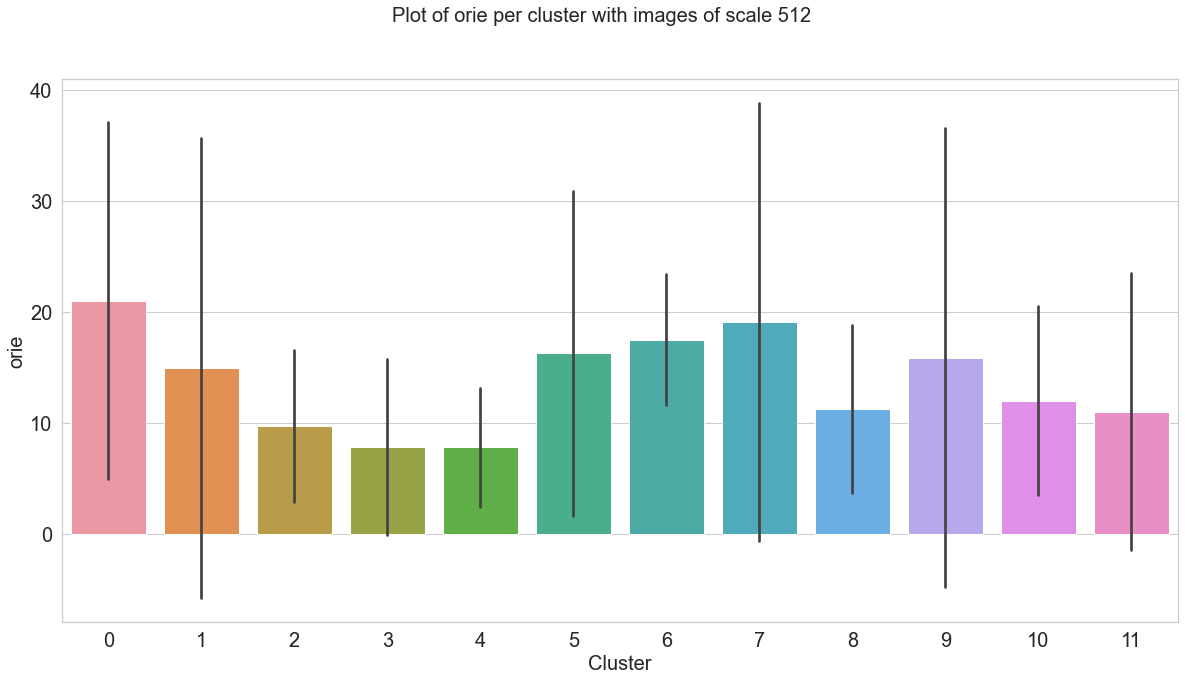

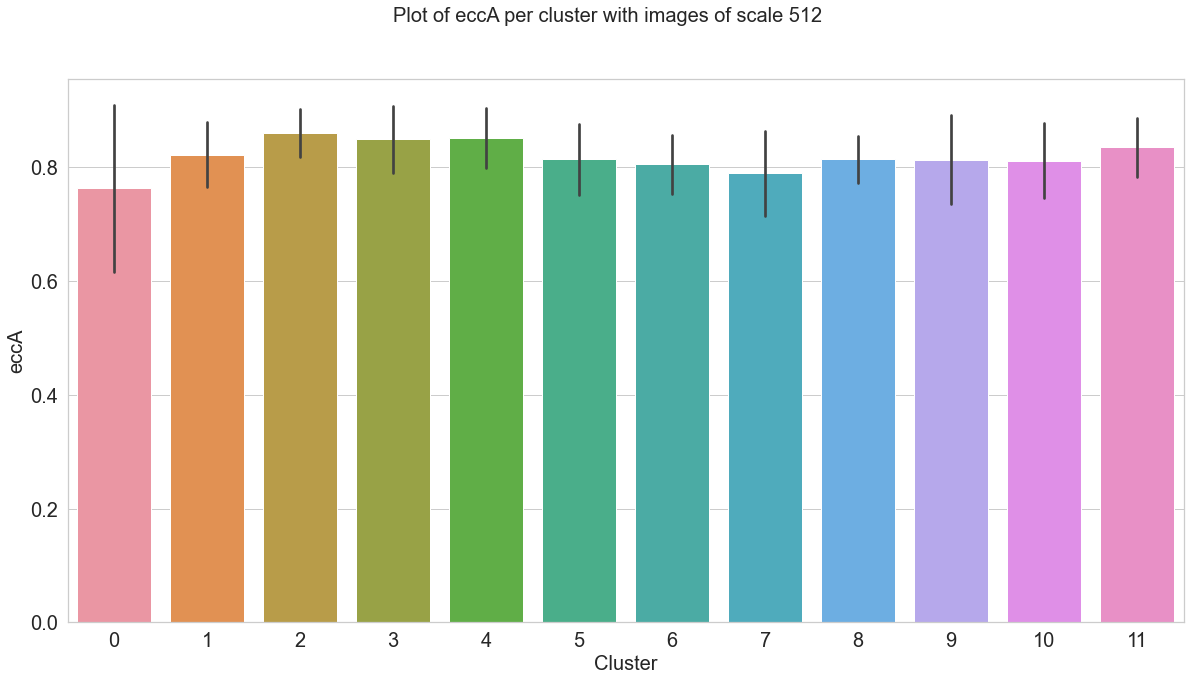

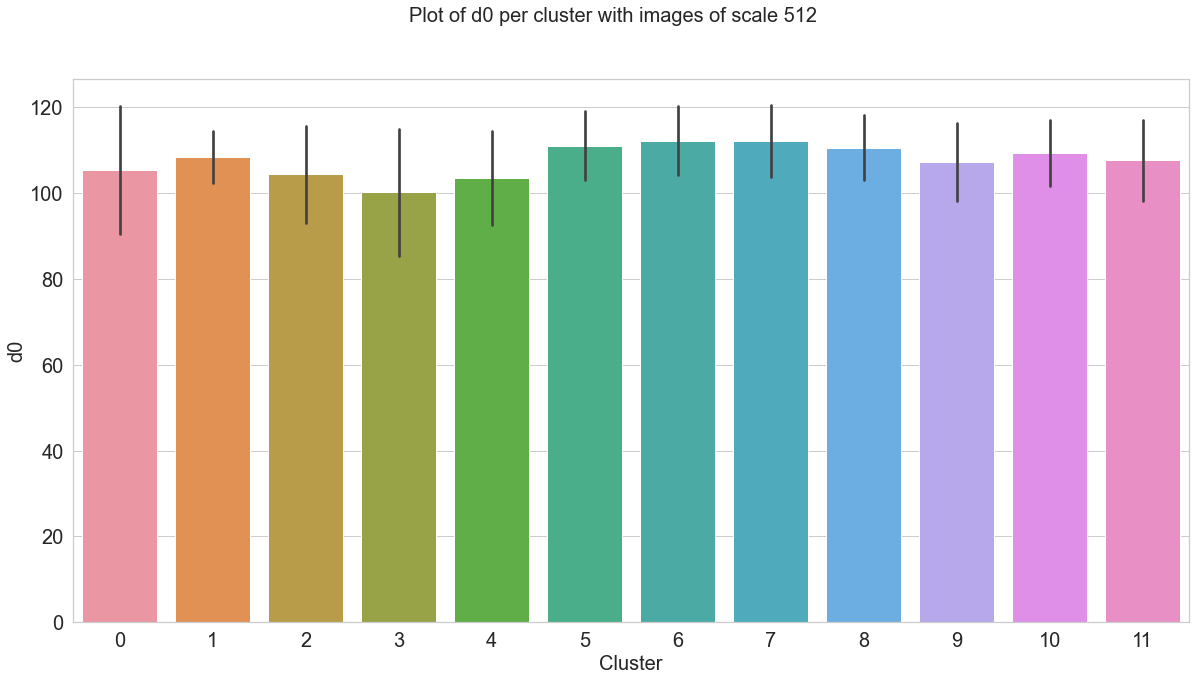

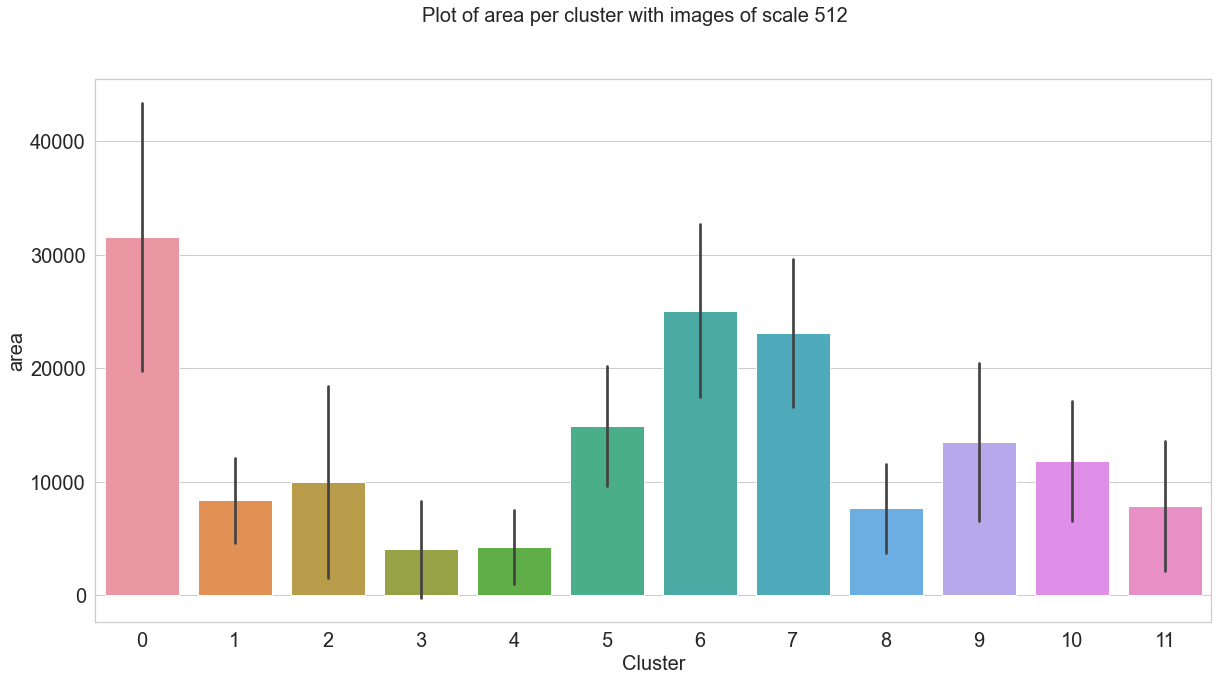

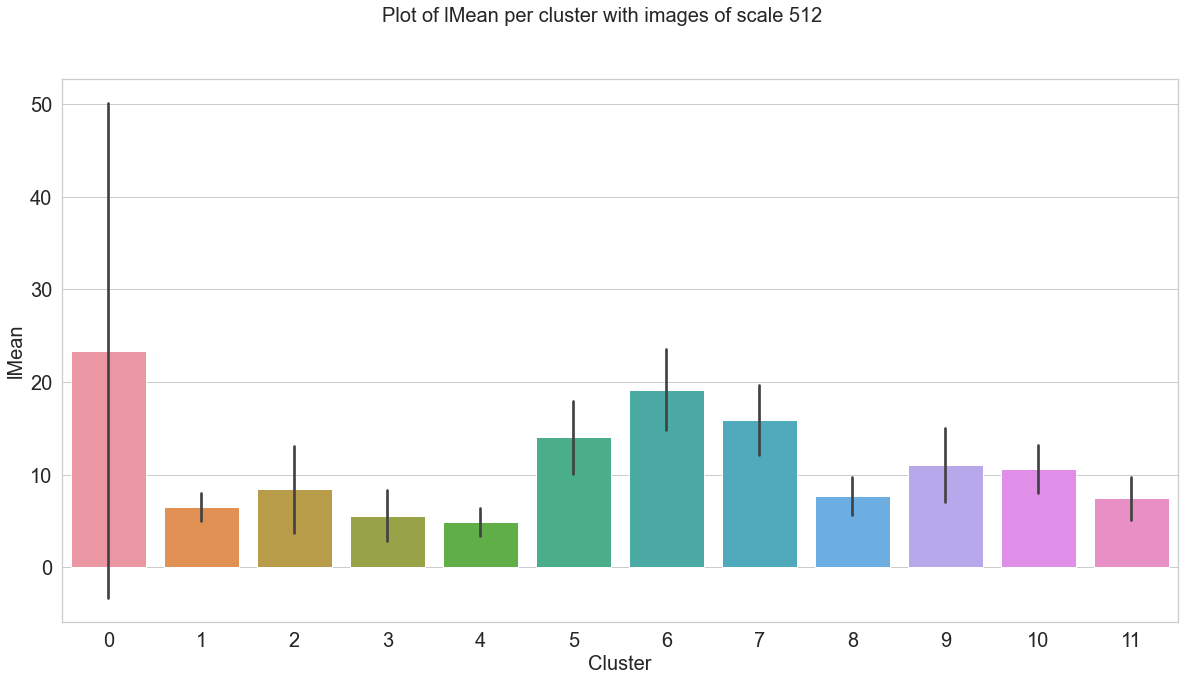

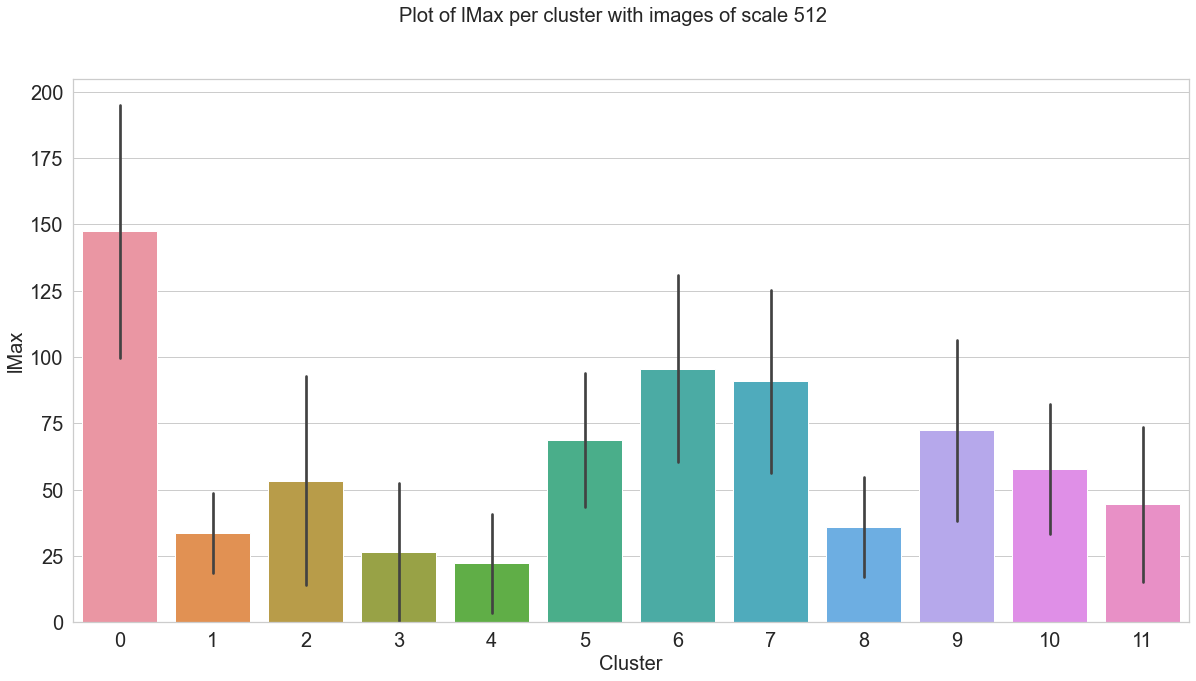

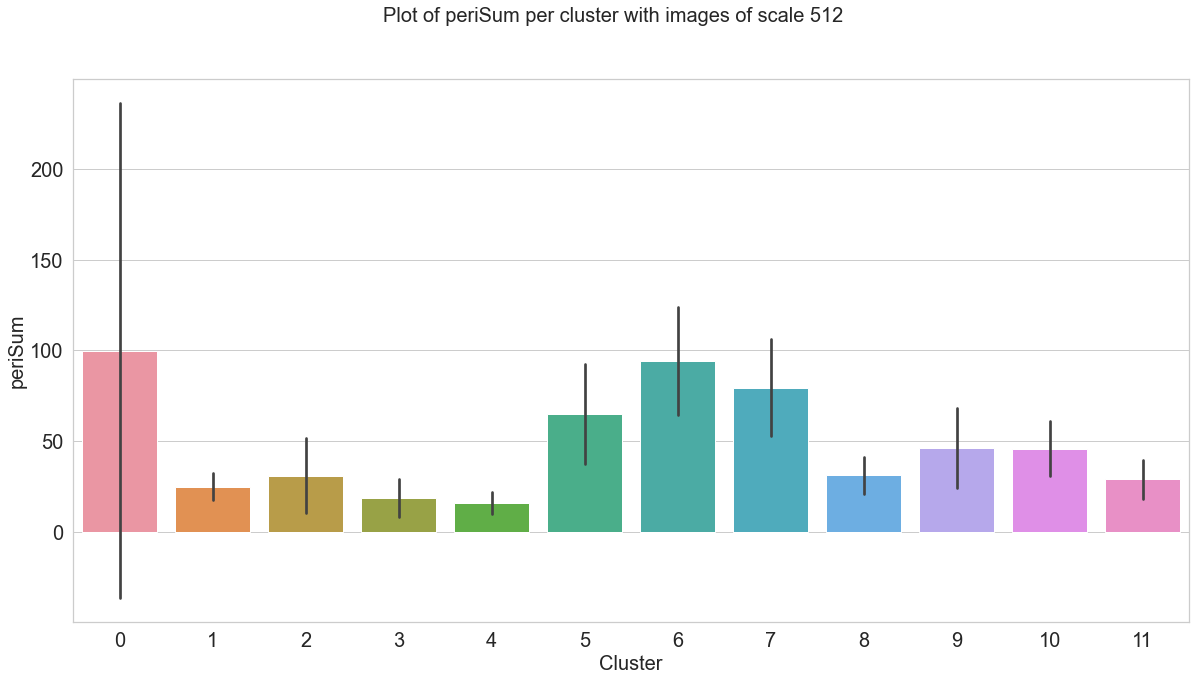

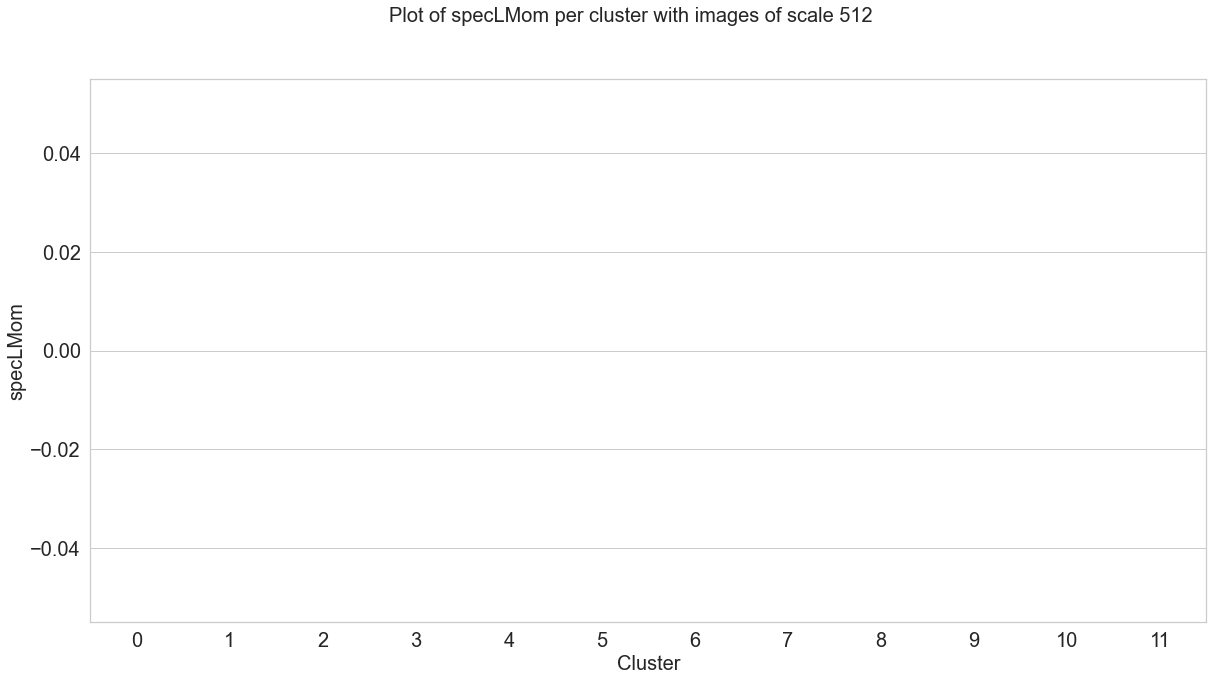

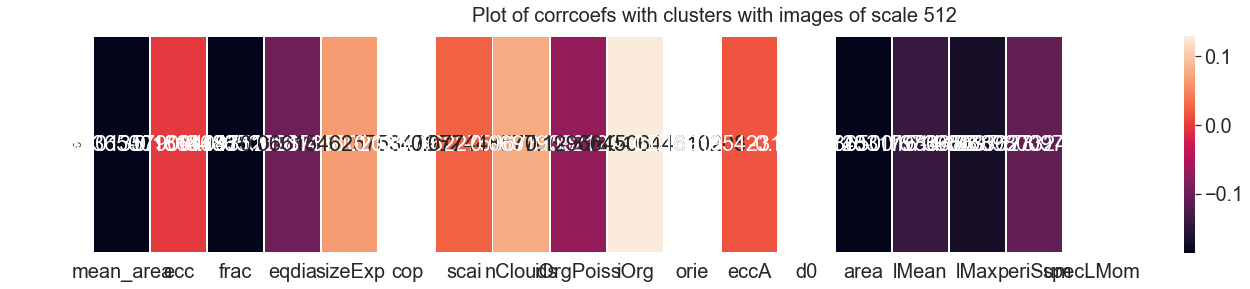

     Unnamed: 0   cf       lMax    periSum   sizeExp      lMean  specLMom  \
0             0  0.0  34.365681  26.654681 -1.691733   6.756217       NaN   
1             0  0.0  81.400246  40.041690 -1.270999  10.794906       NaN   
2             0  0.0  94.191295  86.325953 -1.214395  17.745193       NaN   
3             0  0.0  25.119713  27.998388 -1.082519   7.053905       NaN   
4             0  0.0  47.159304  39.345563 -1.492320   9.519716       NaN   
..          ...  ...        ...        ...       ...        ...       ...   
419           0  0.0  45.727453  50.771120 -1.269327  11.046935       NaN   
420           0  0.0  46.818800  51.493889 -1.280329  11.267187       NaN   
421           0  0.0   7.615773  10.309172 -2.534973   3.378011       NaN   
422           0  0.0  29.120440  31.986997 -1.689068   7.657051       NaN   
423           0  0.0  44.542115  53.063120 -1.185898  10.867574       NaN   

          cop      scai  nClouds  ...          d0   area       ecc  \
0    

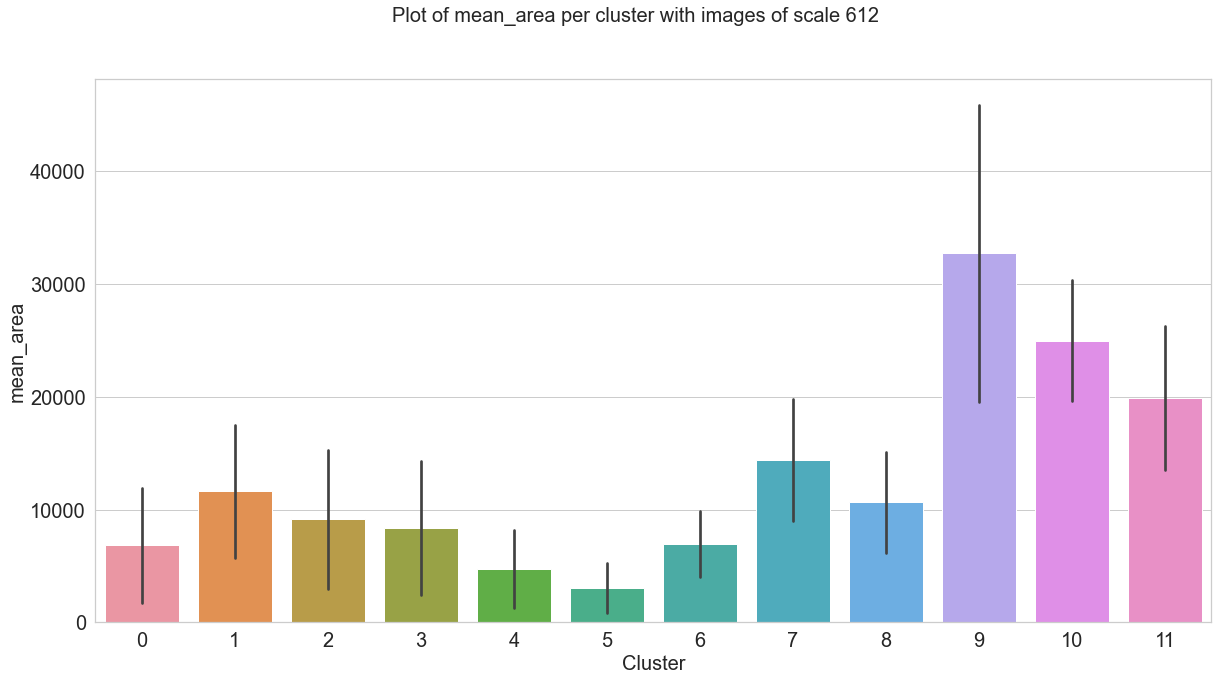

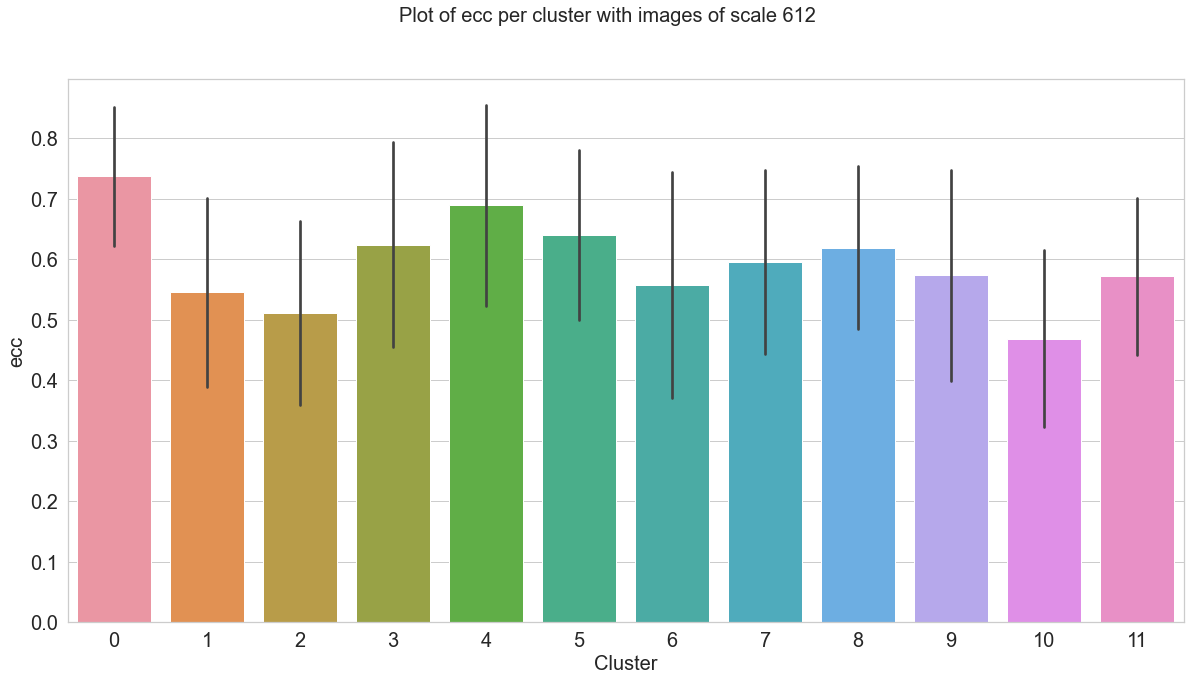

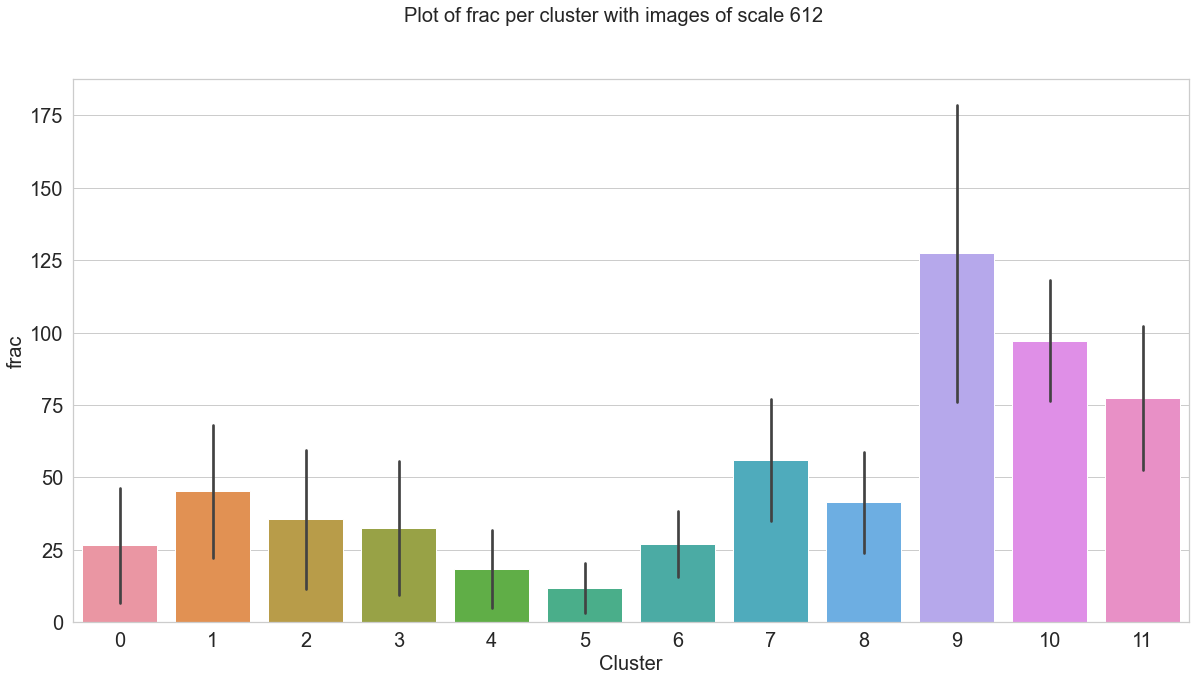

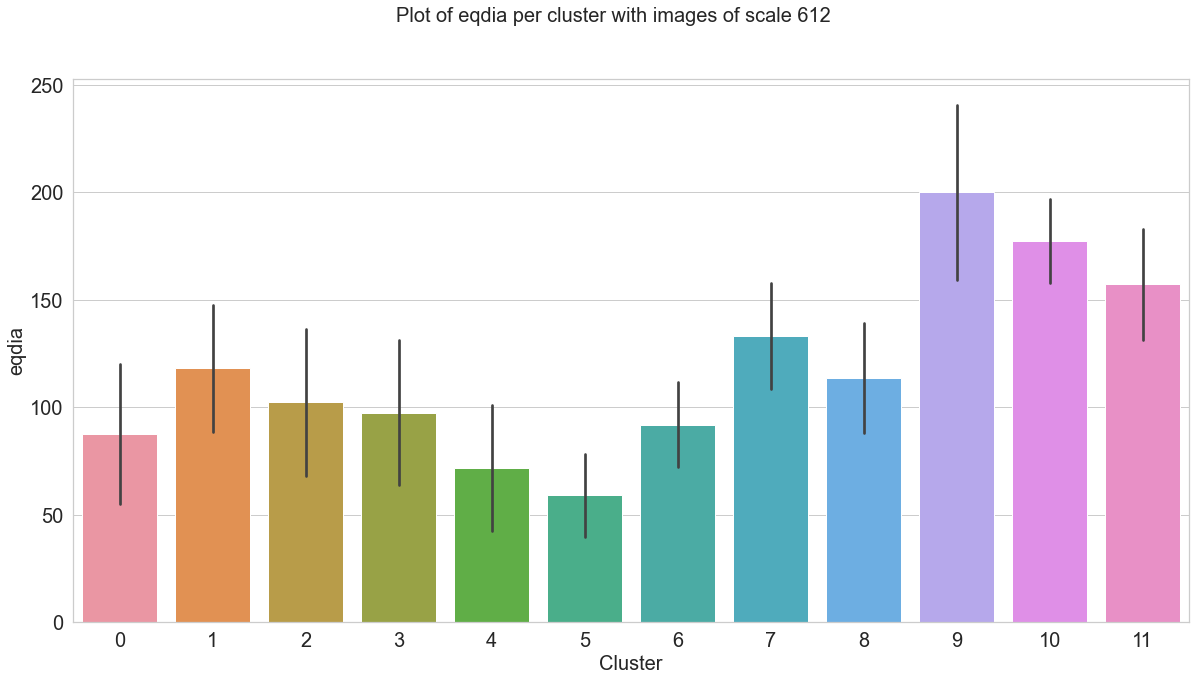

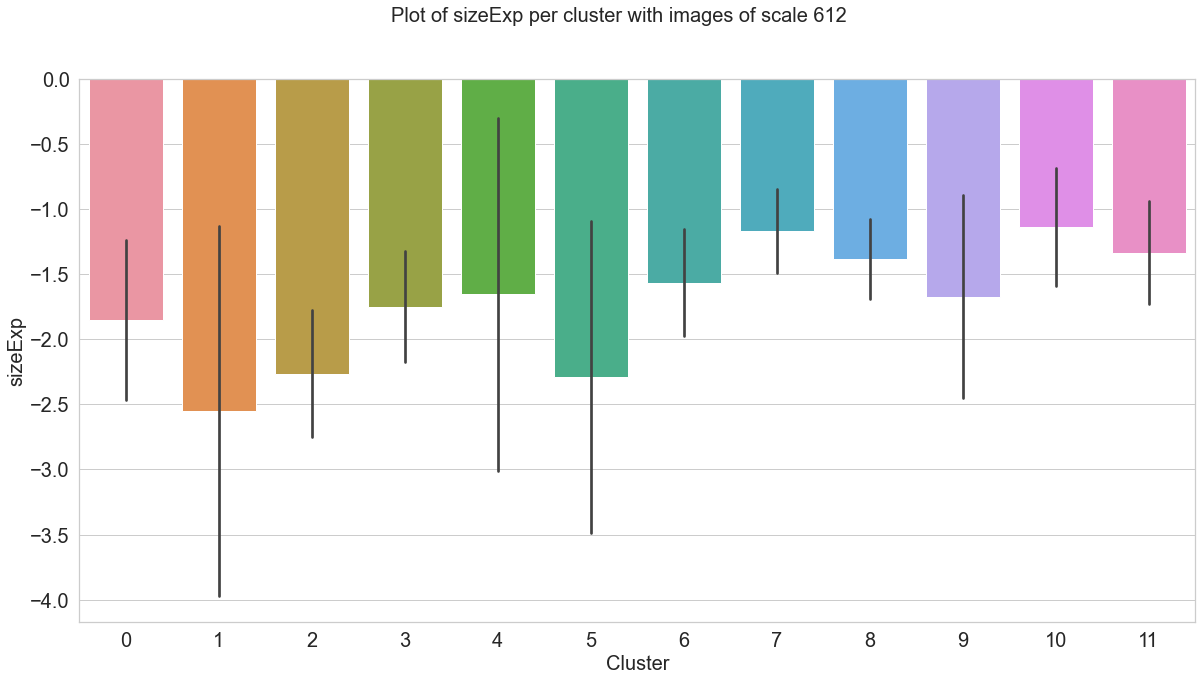

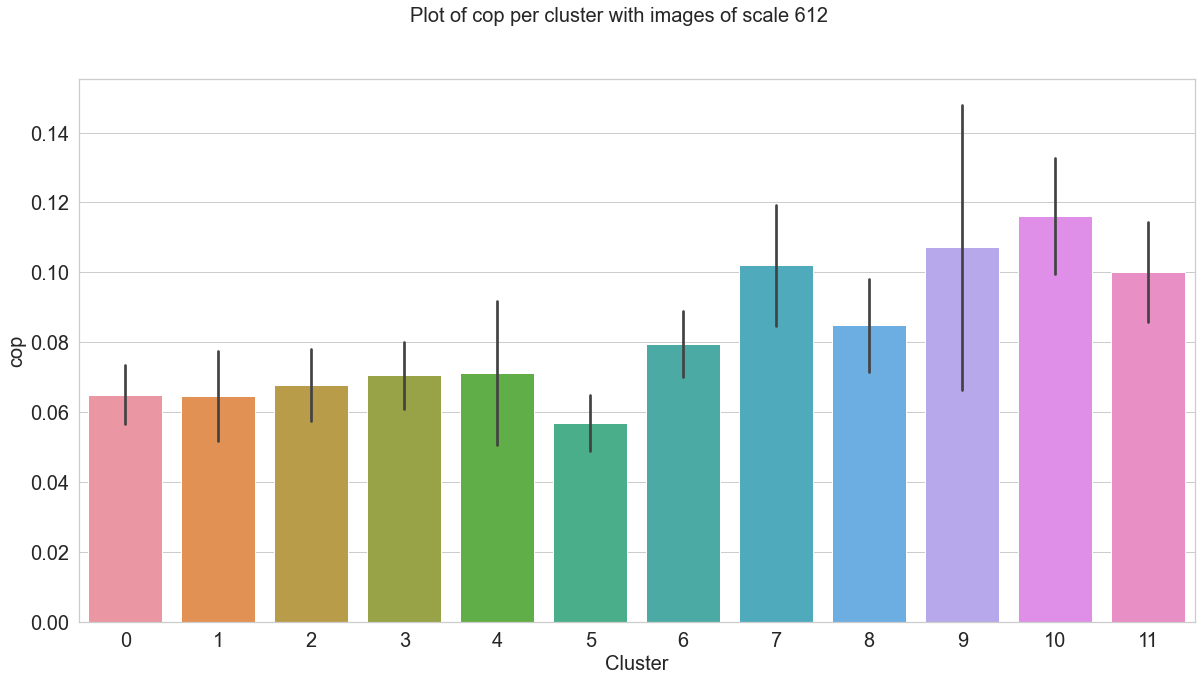

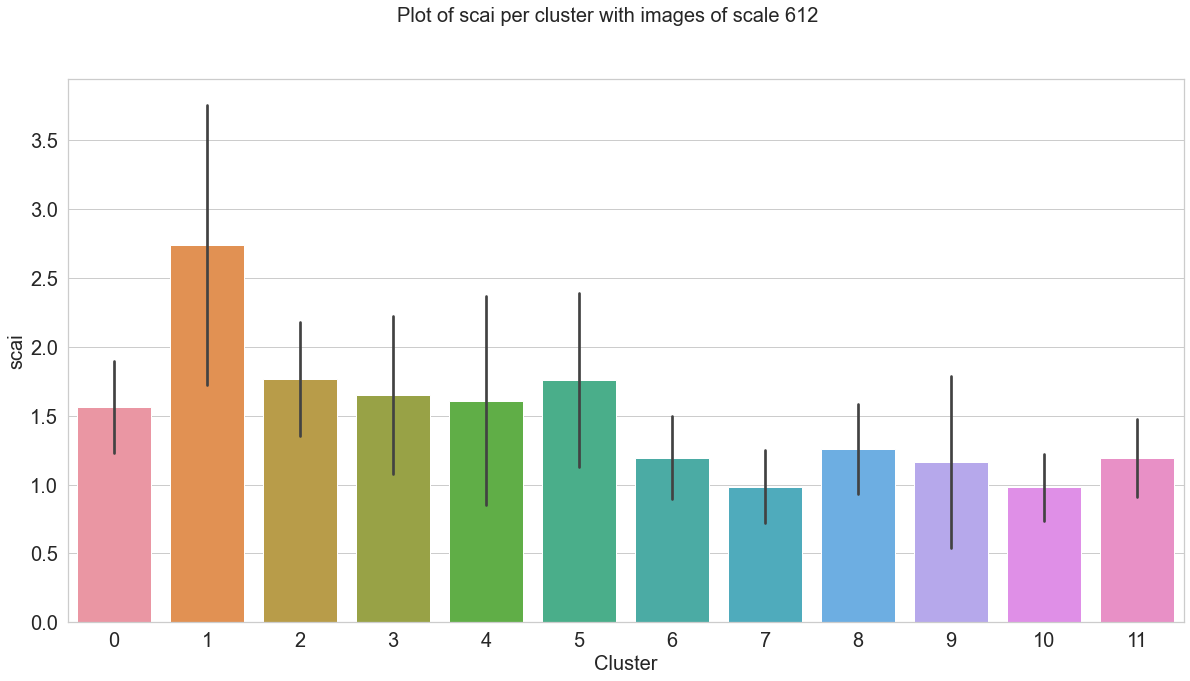

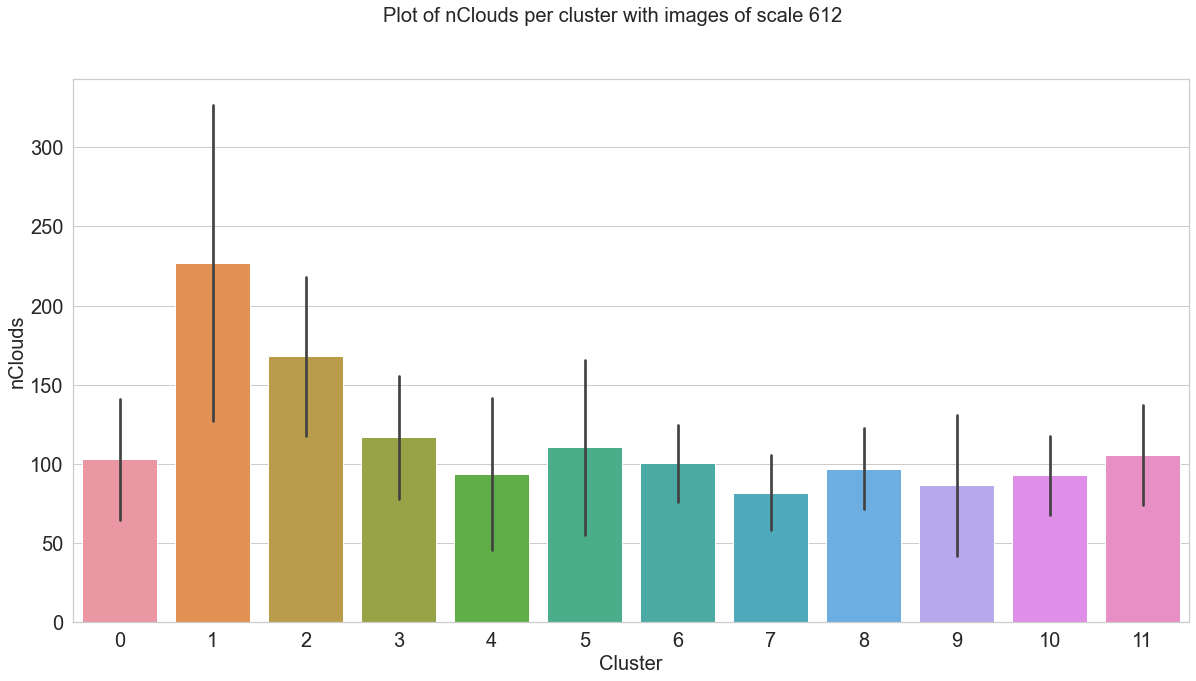

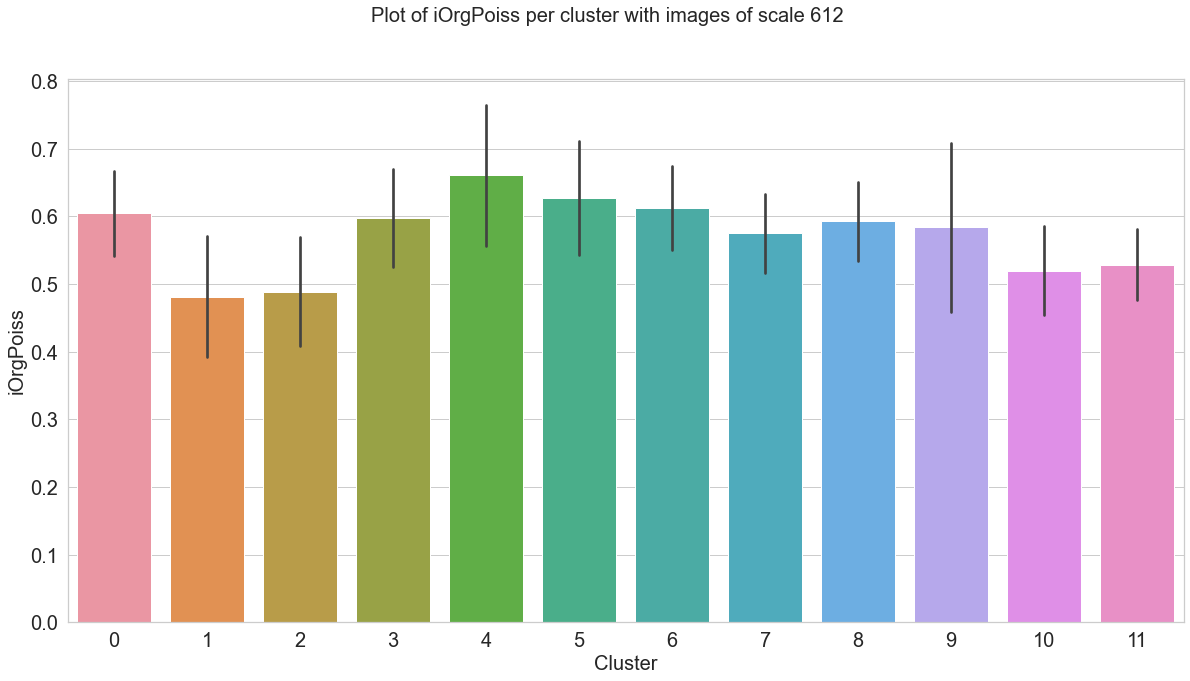

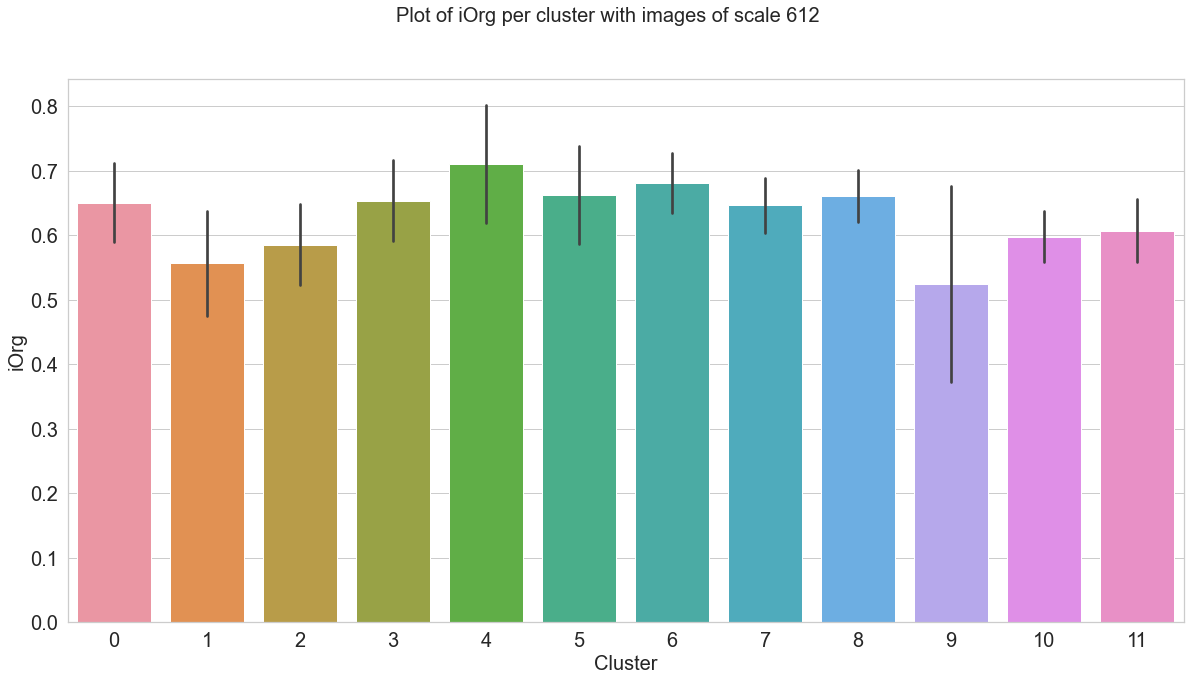

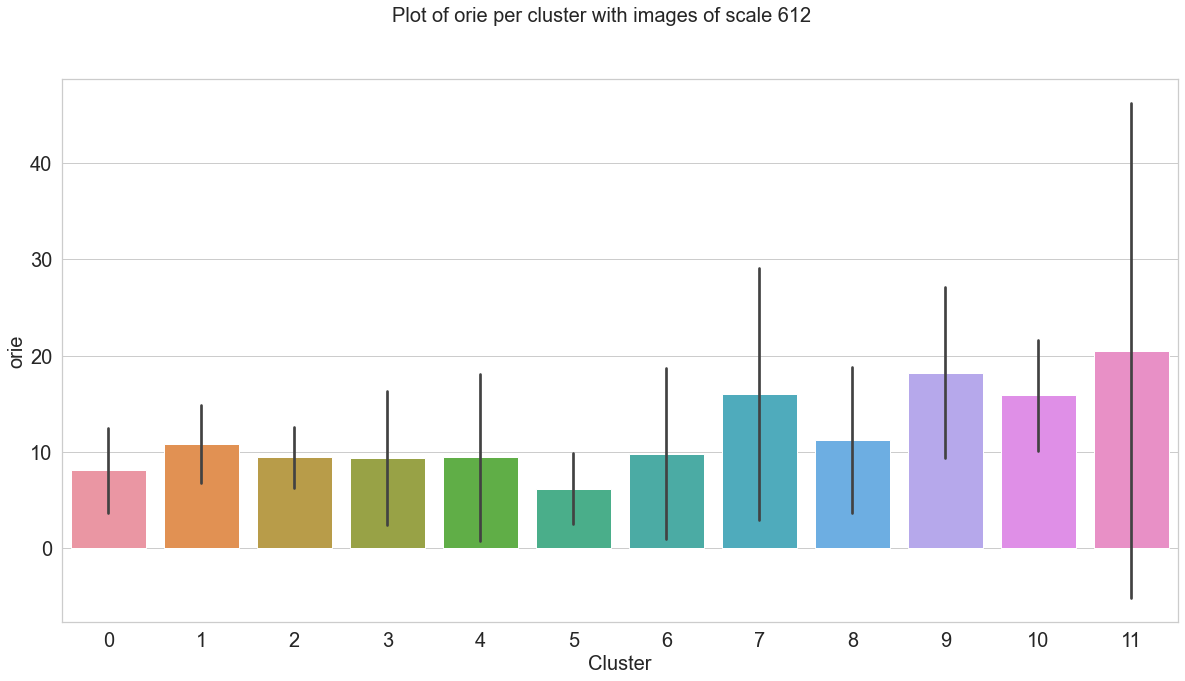

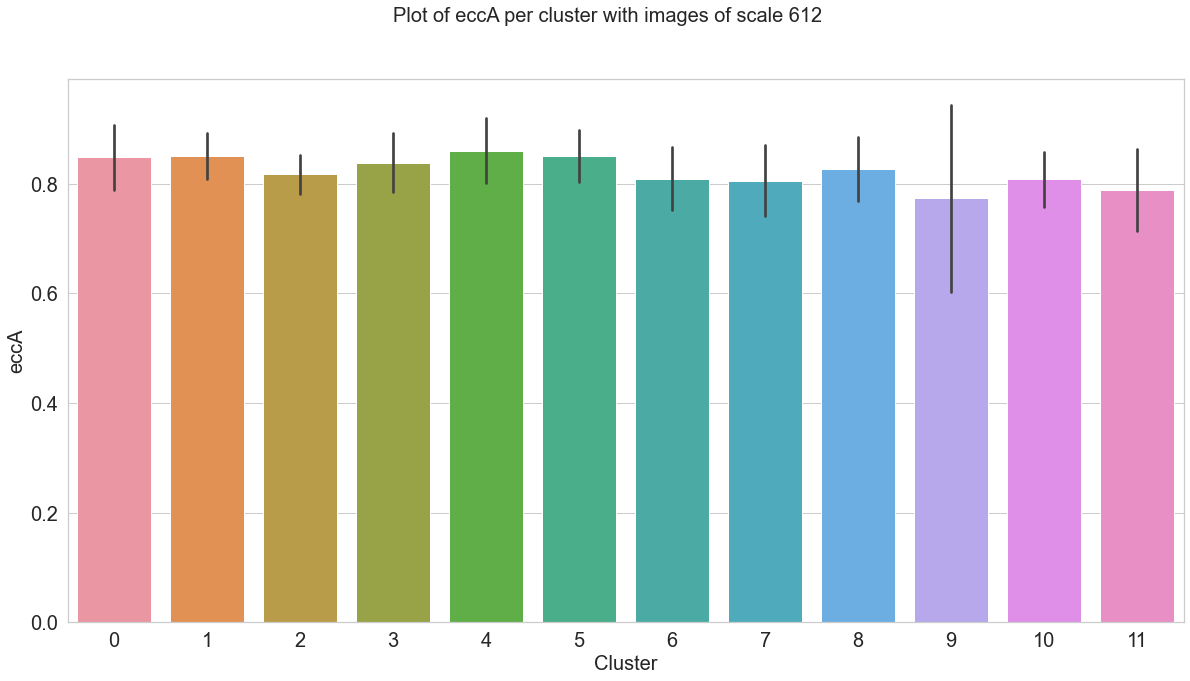

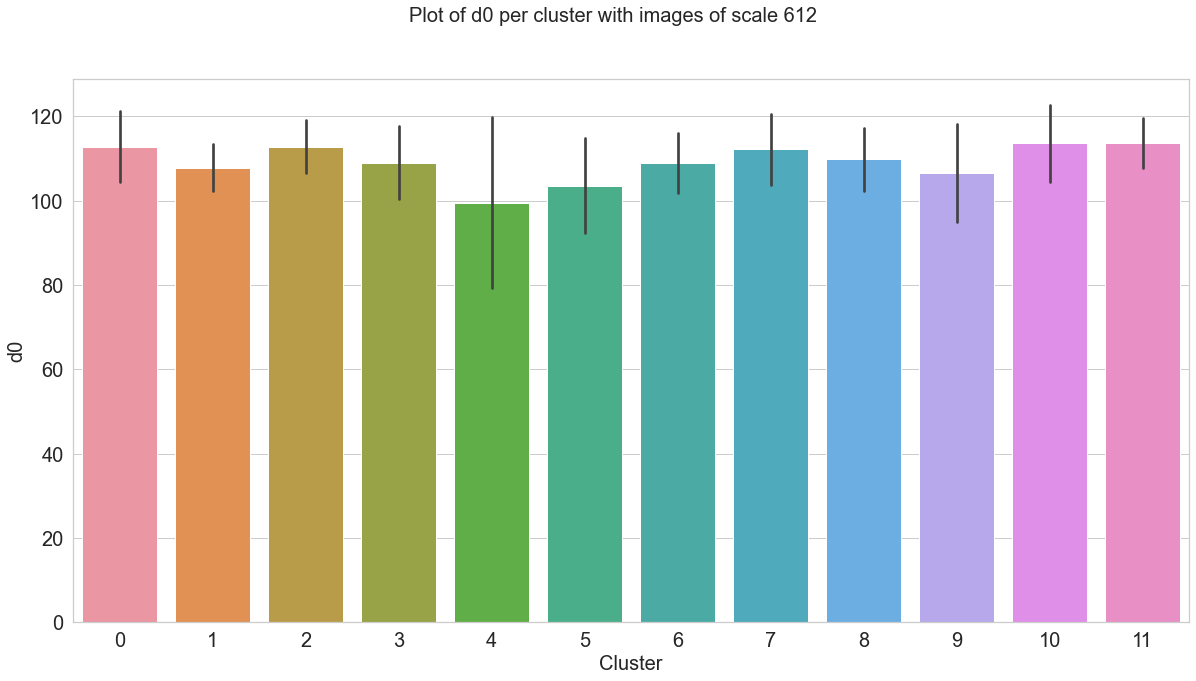

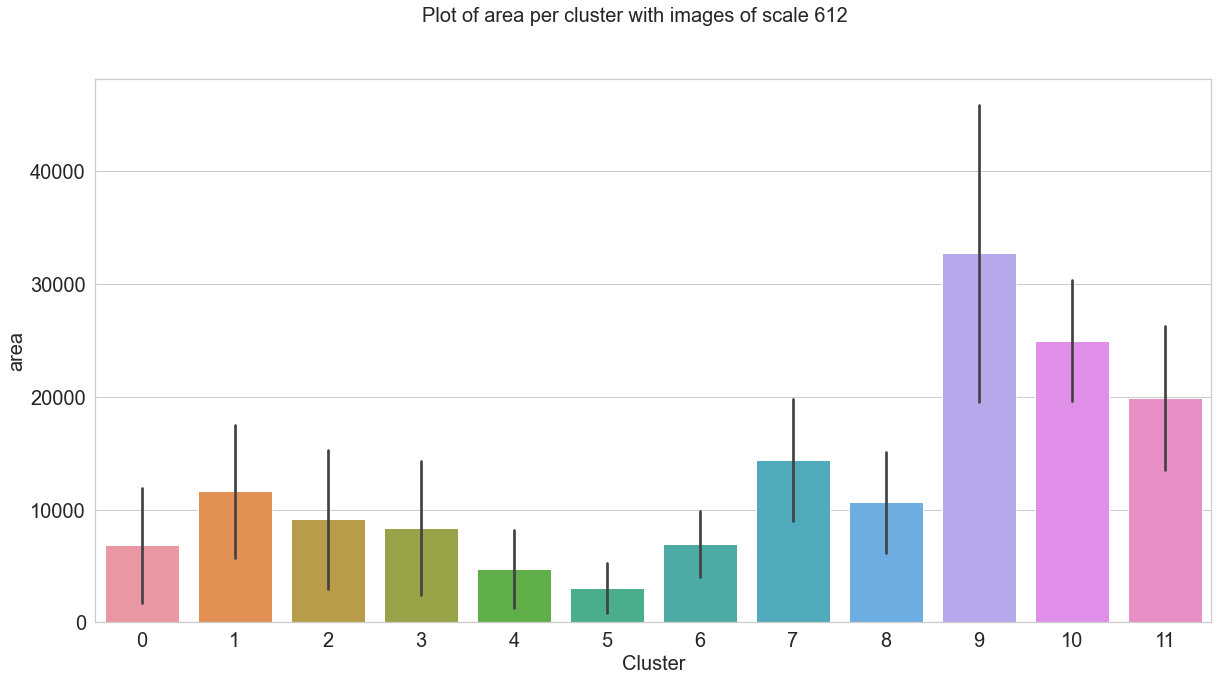

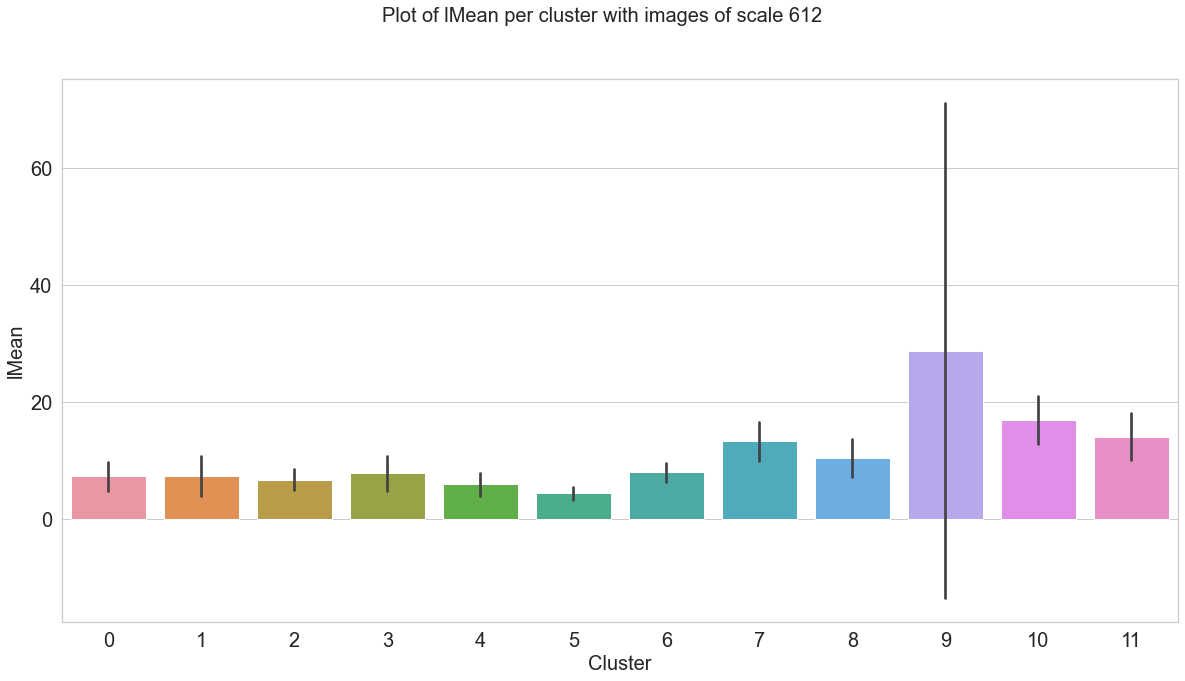

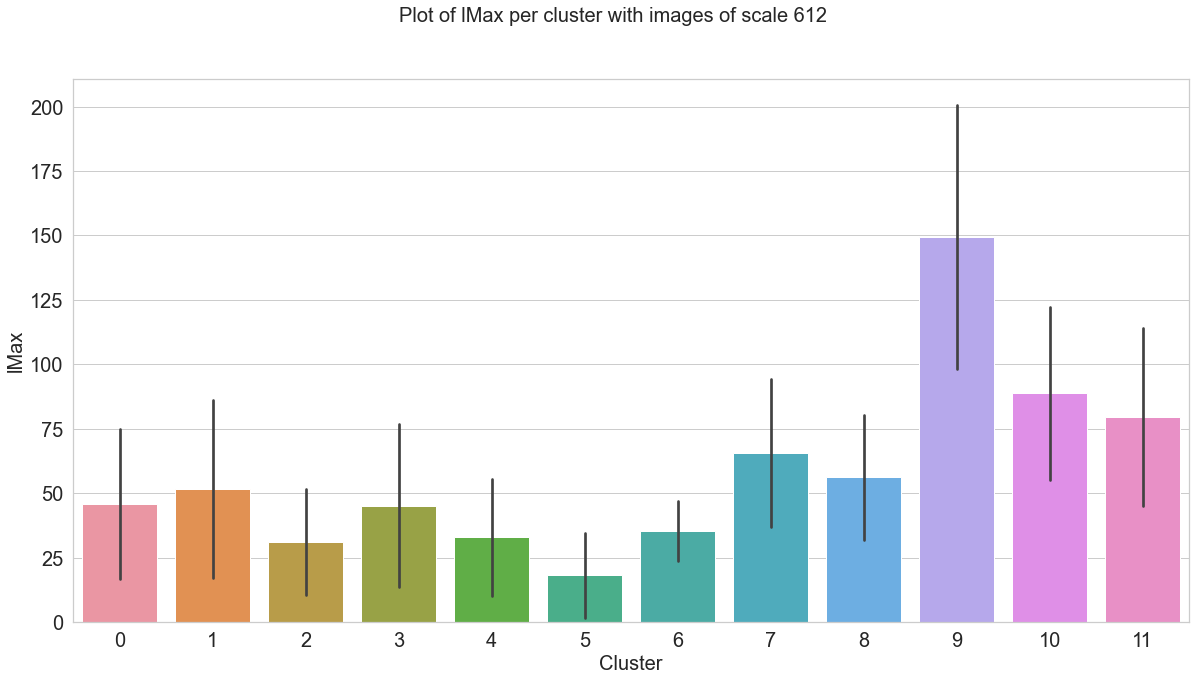

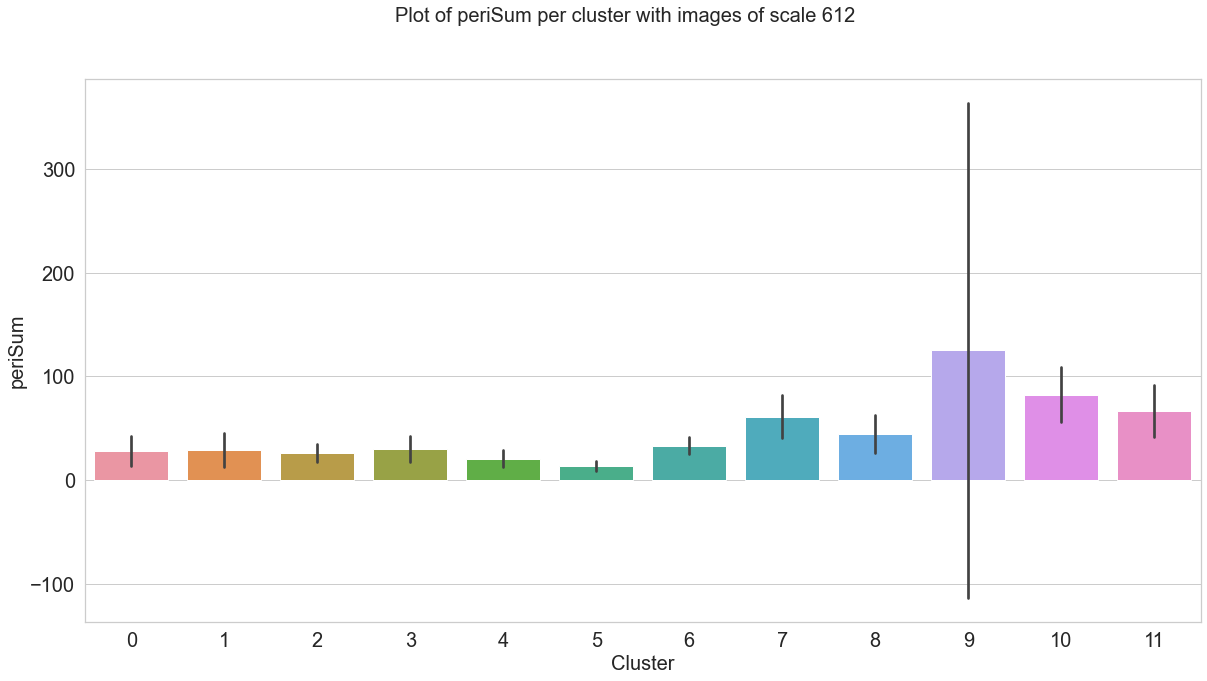

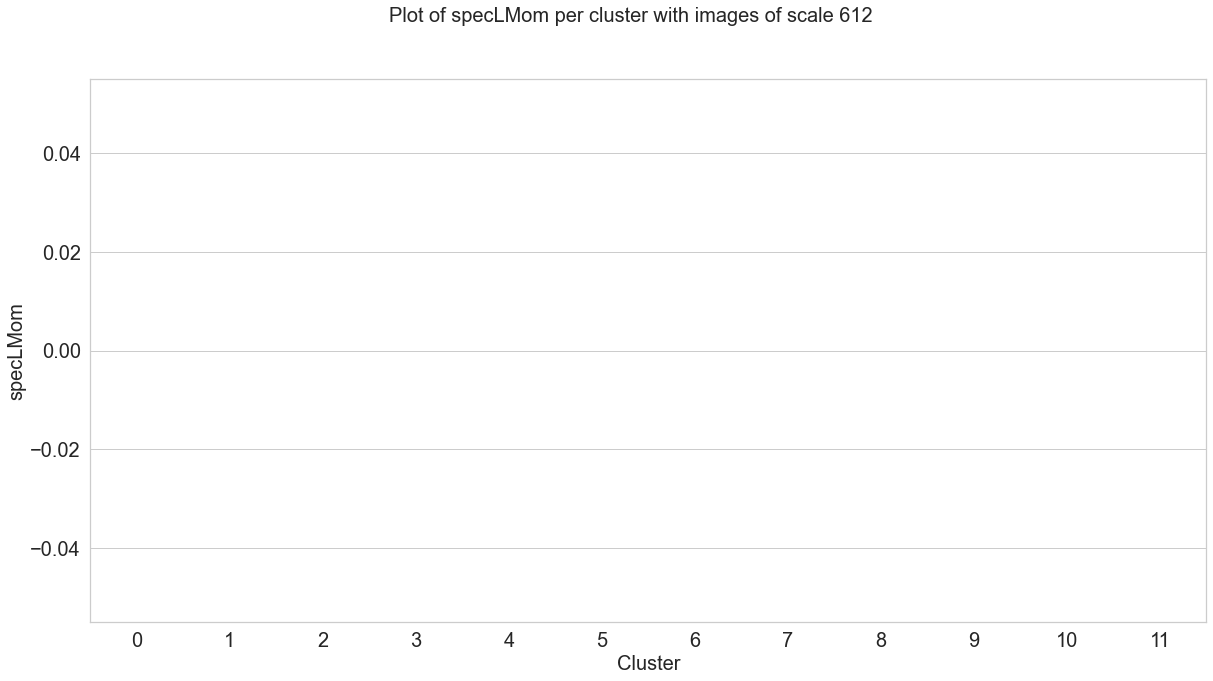

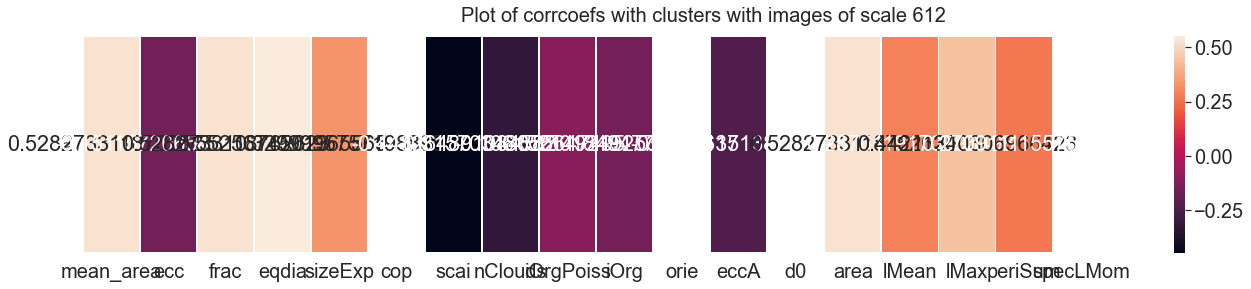

    Unnamed: 0   cf        lMax     periSum   sizeExp      lMean  specLMom  \
0            0  0.0   24.637370   23.769556 -1.434924   6.040642       NaN   
1            0  0.0   53.786615   59.812214 -1.139926  12.417729       NaN   
2            0  0.0   37.868192   17.453751 -1.314495   5.367018       NaN   
3            0  0.0   61.975802   36.546740 -1.716115   9.432141       NaN   
4            0  0.0   28.160256   24.250607 -2.015155   6.751108       NaN   
5            0  0.0   41.892720   50.043553 -1.382480  11.118031       NaN   
6            0  0.0   34.409301   25.147033 -1.138877   6.813943       NaN   
7            0  0.0   34.044089   27.786705 -1.954321   7.152112       NaN   
8            0  0.0   20.149442   18.224061 -2.306649   4.919188       NaN   
9            0  0.0   82.540899   44.272727 -2.050893  10.548104       NaN   
10           0  0.0   89.117899   41.674834 -2.042011  10.315099       NaN   
11           0  0.0   73.088987   54.887874 -1.318027  11.685771

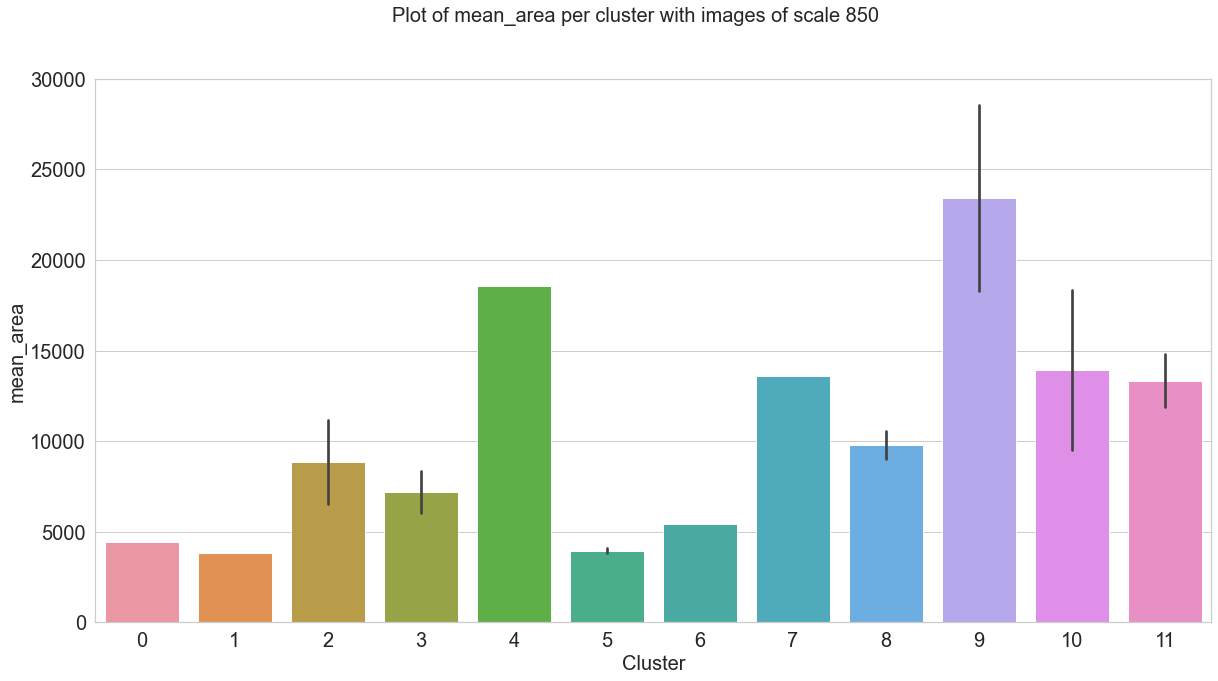

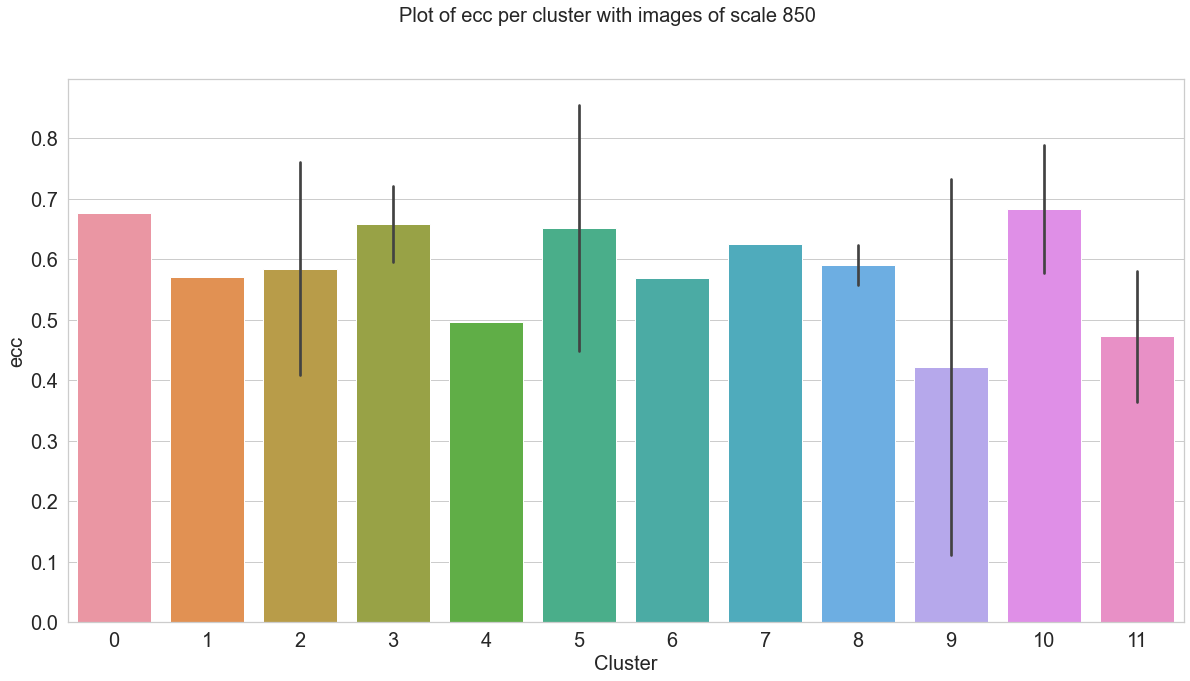

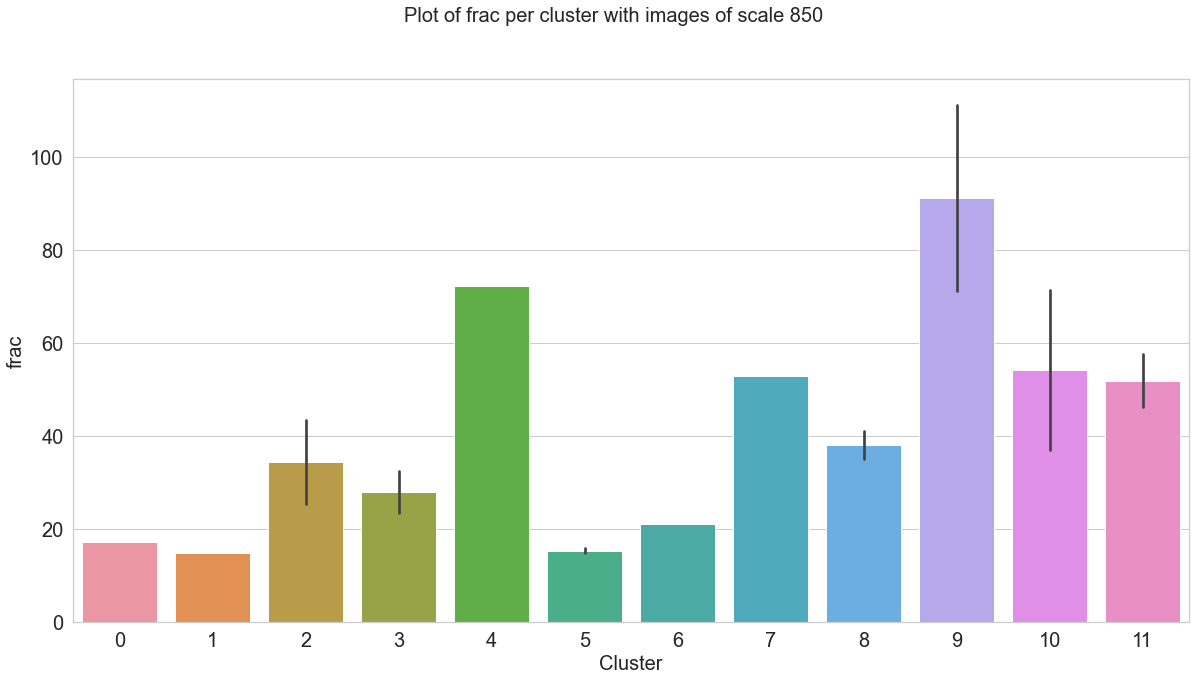

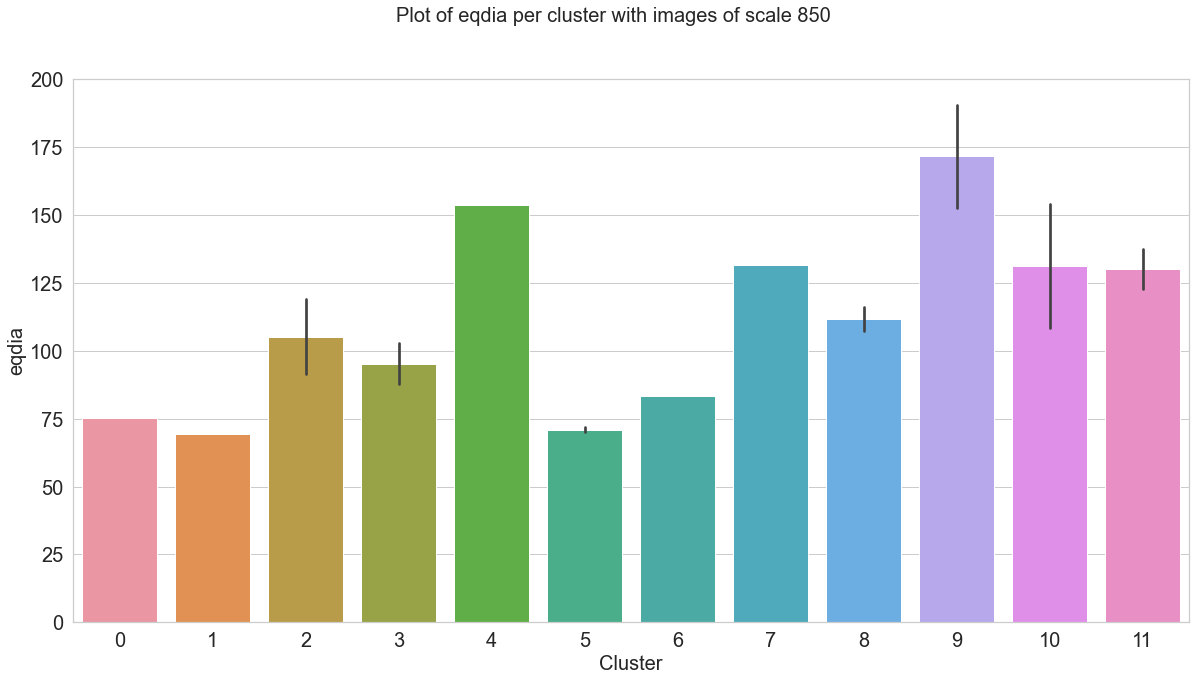

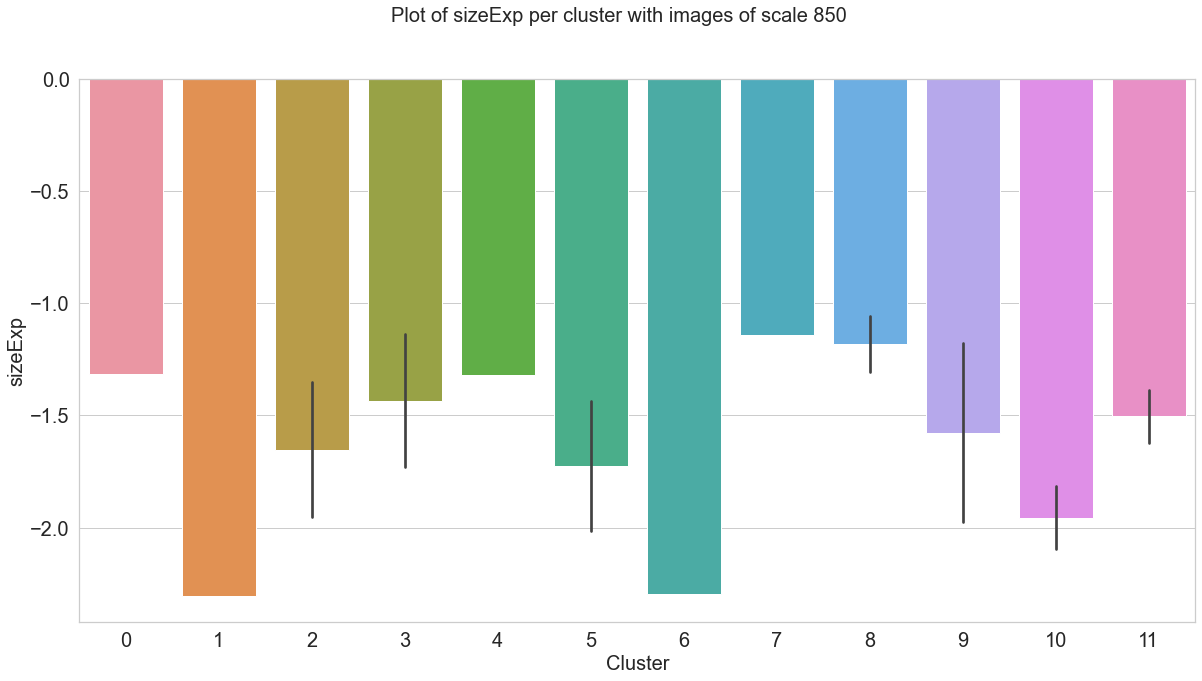

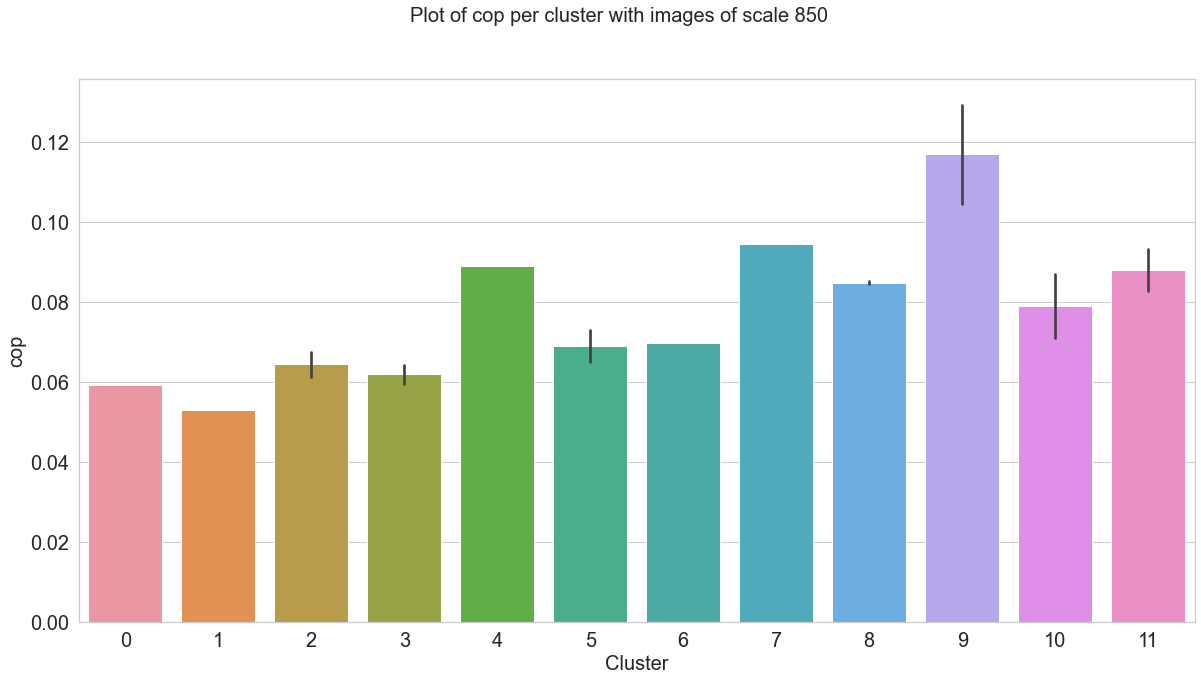

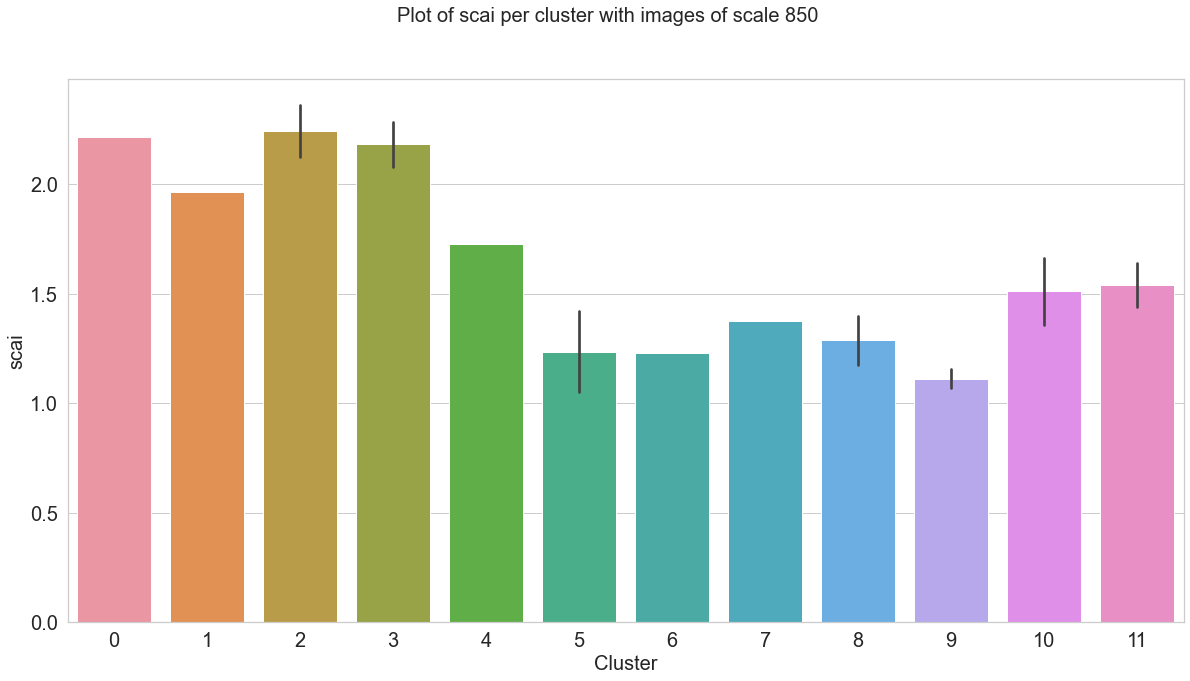

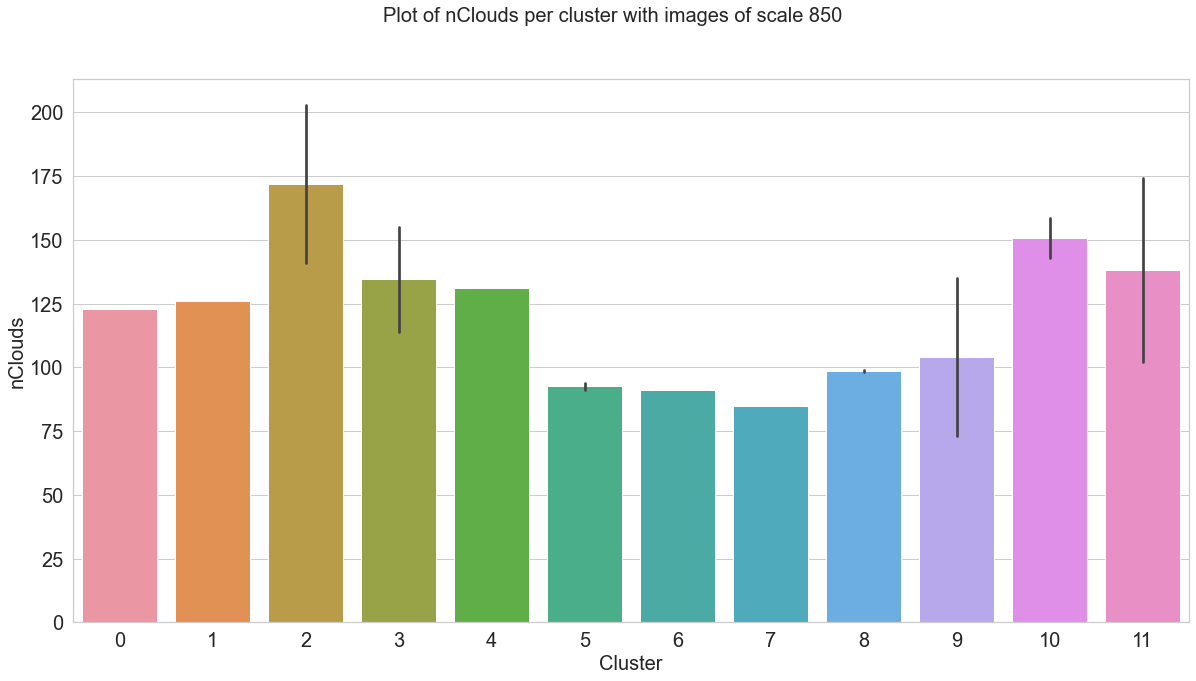

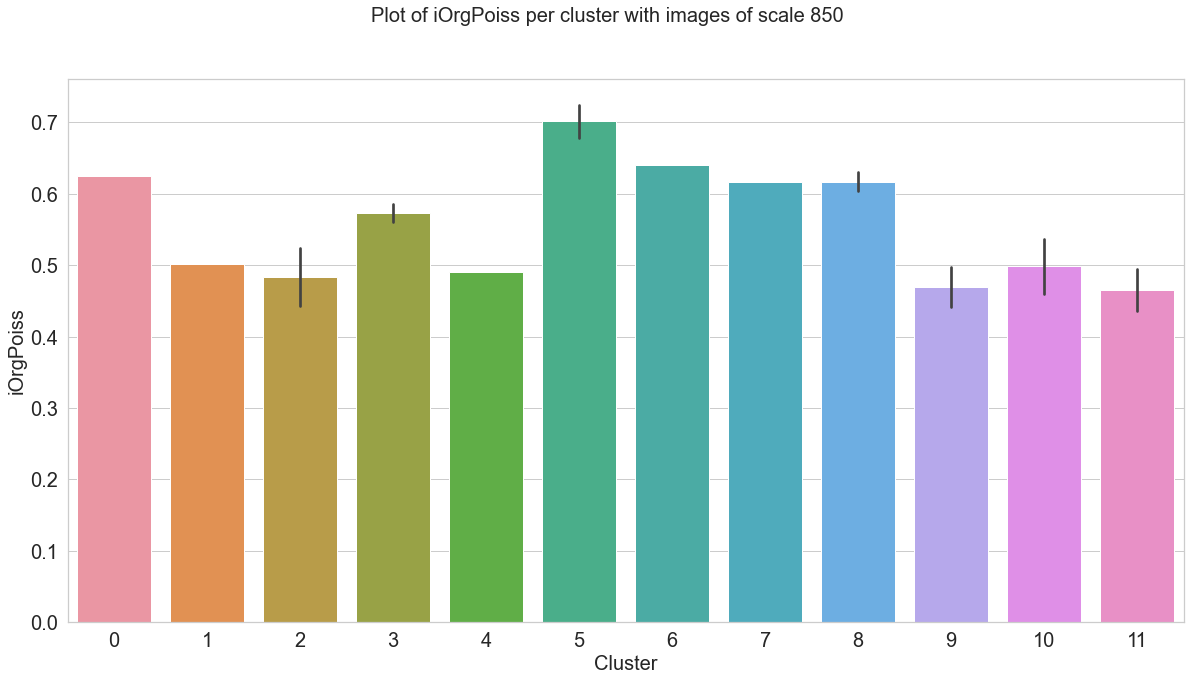

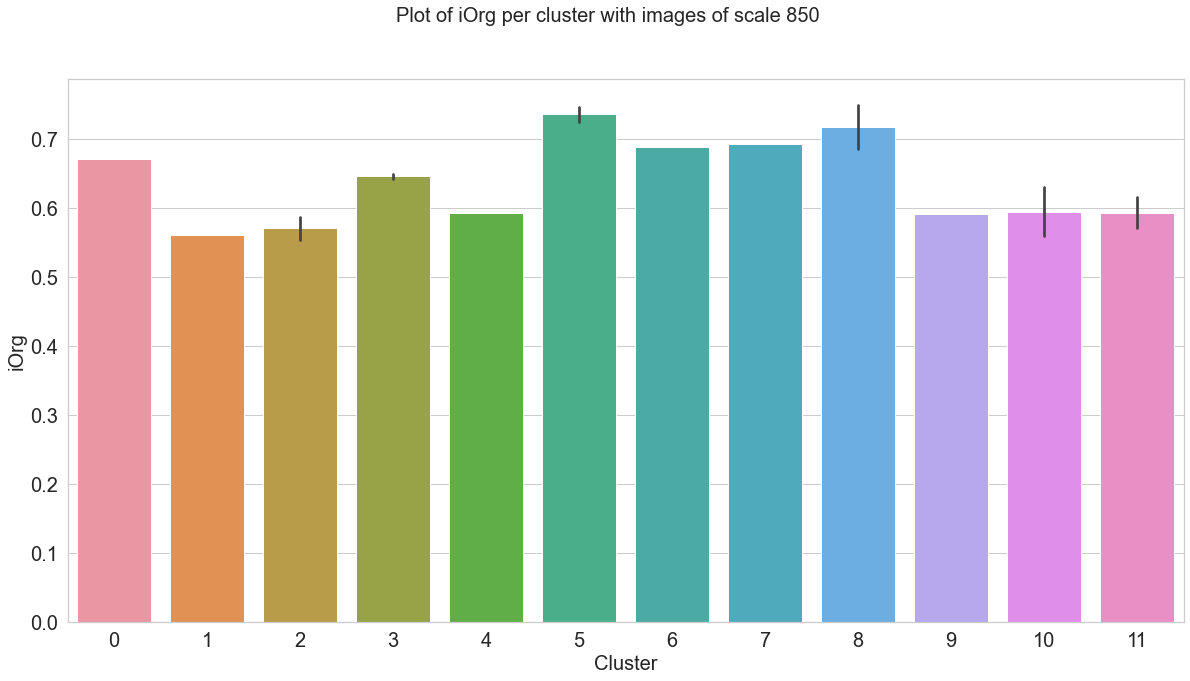

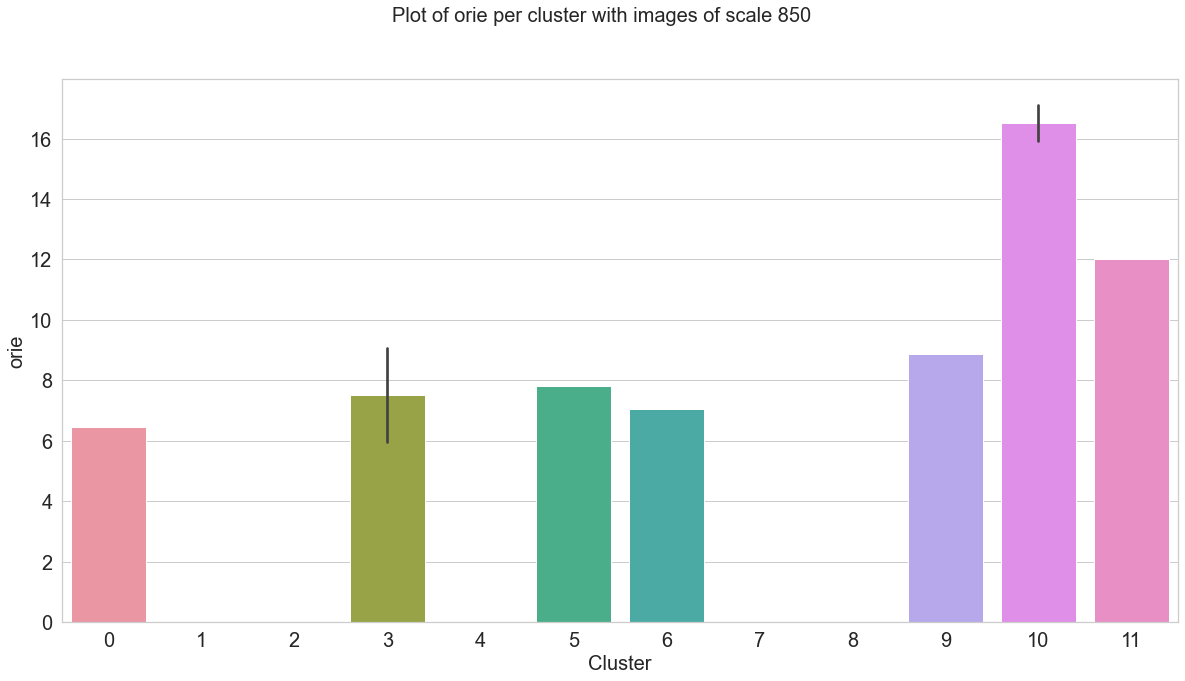

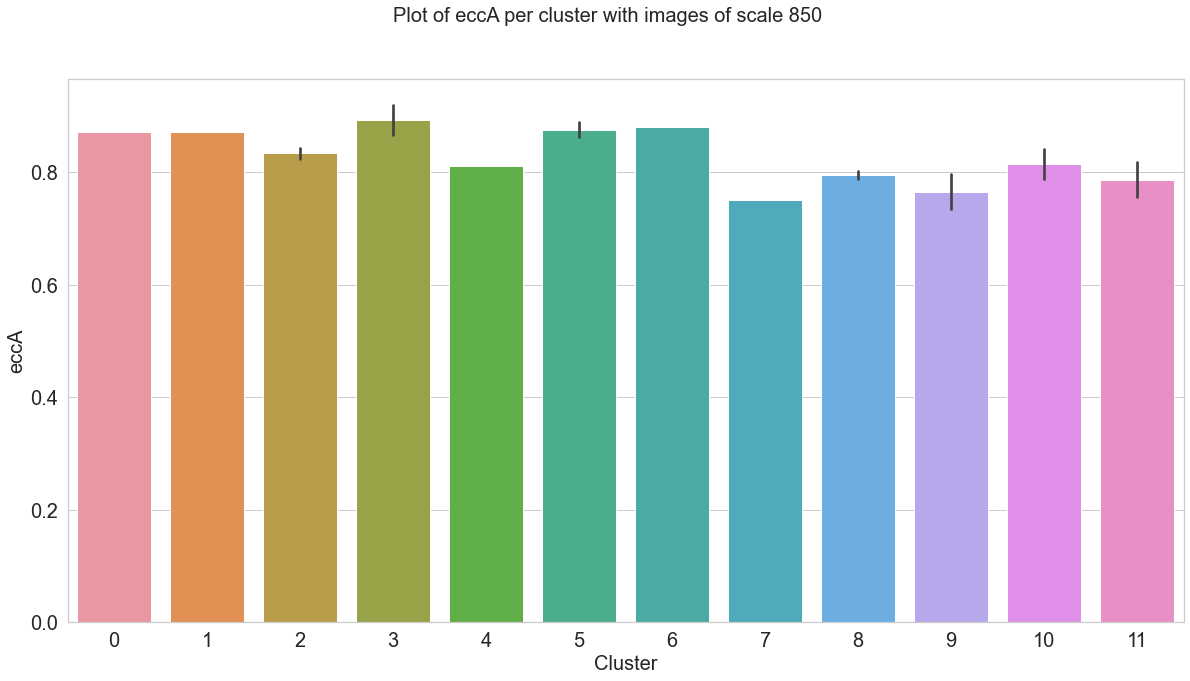

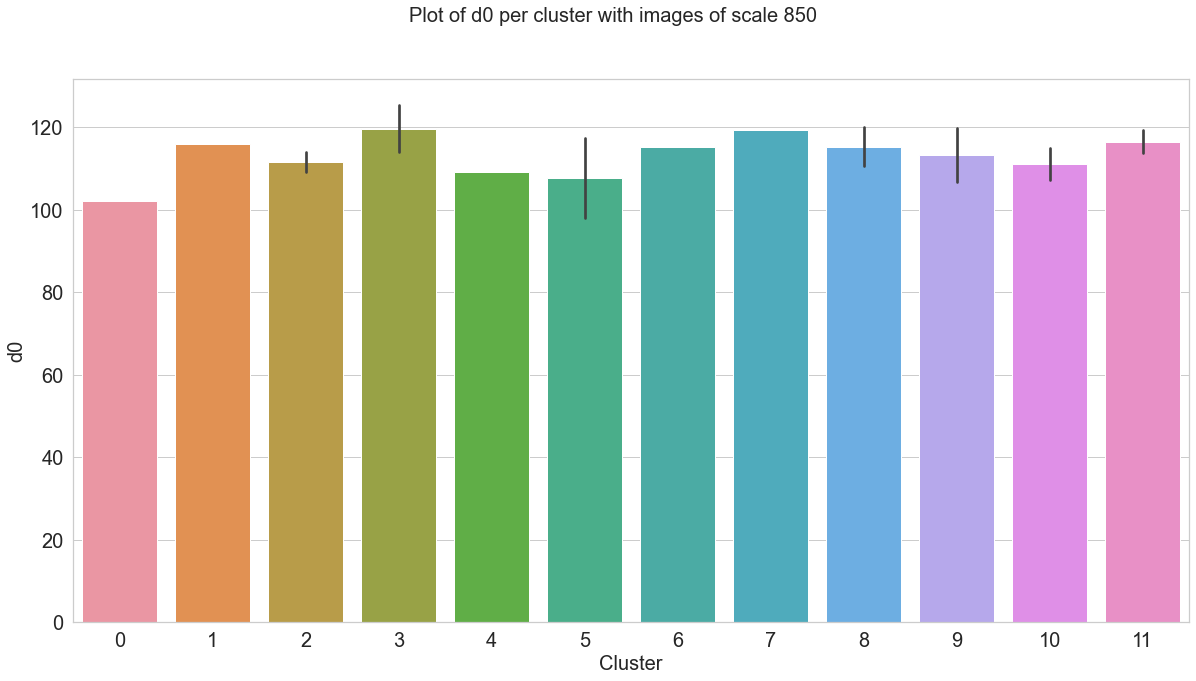

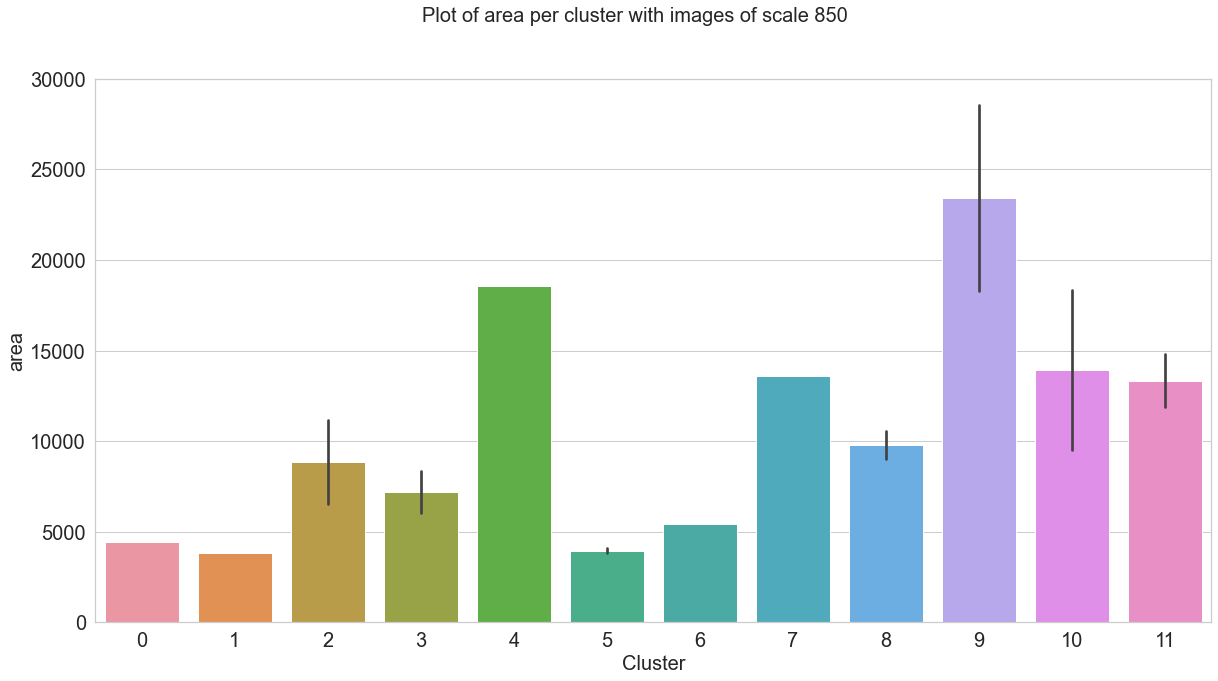

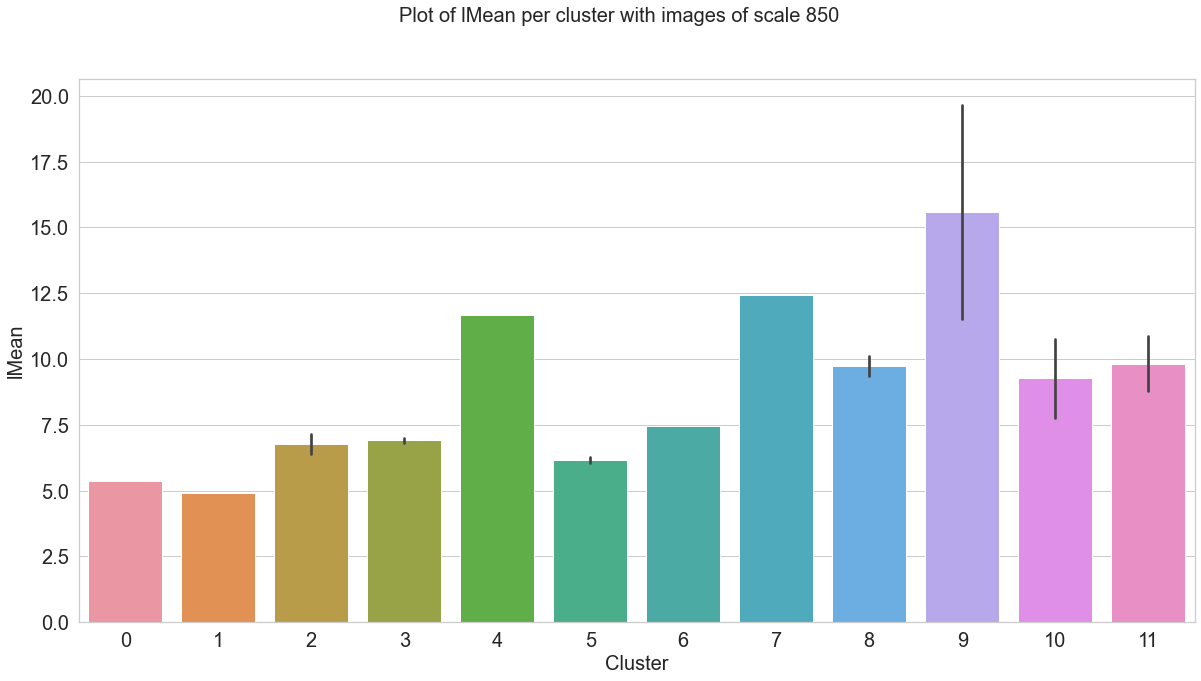

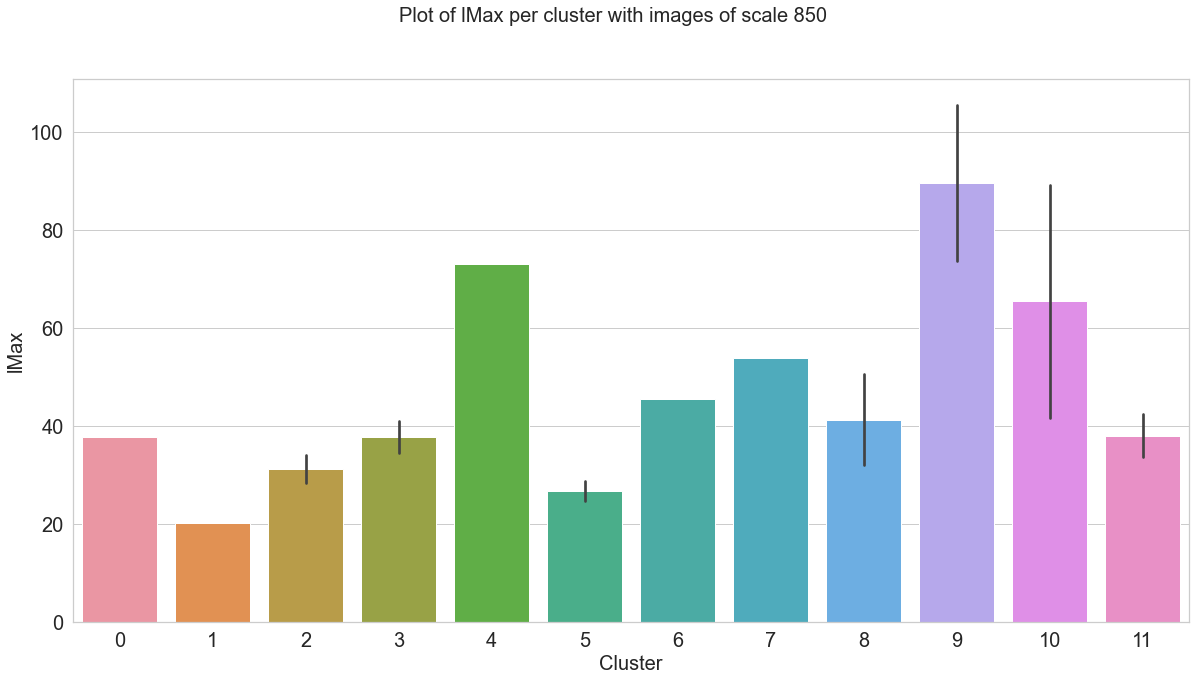

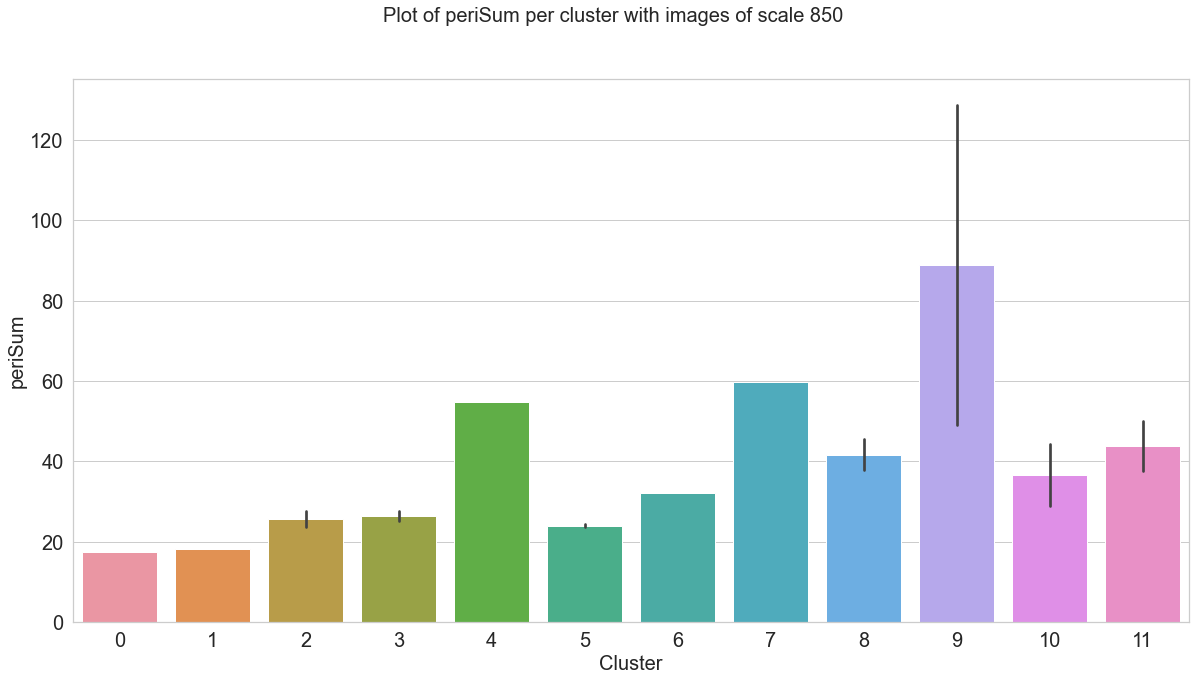

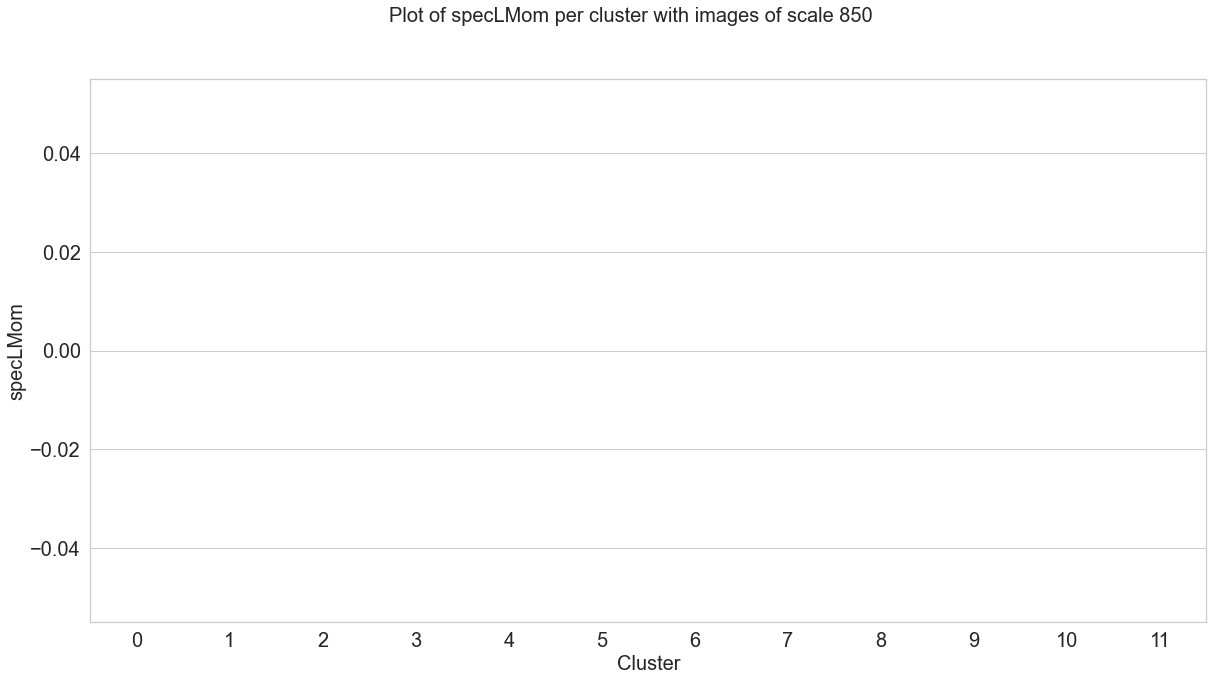

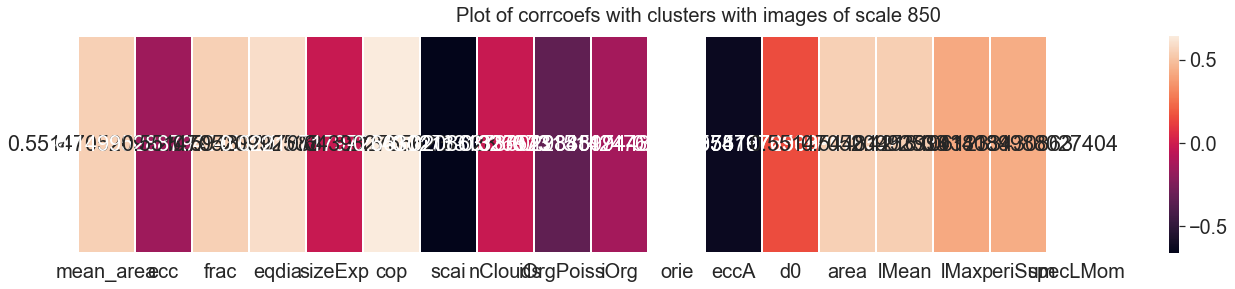

In [4]:
divisions = [256, 512, 612, 850]
for div in divisions:
    variables = ["mean_area", "ecc", "frac", "eqdia", "sizeExp", "cop", "scai", "nClouds", "iOrgPoiss", "iOrg", "orie", "eccA", "d0", "area", "lMean", "lMax", "periSum", "specLMom"]
    sns.set(rc={'figure.figsize':(10, 10)})
    sns.set_theme(style="whitegrid")
    file_name = str(div)+" scale clouds physics metrics.csv"
    df = pd.read_csv(file_name, sep='\t', encoding='utf-8')

    print(df)
    try:
        os.makedirs("visualize/"+str(div))
    except:
        pass
    corrcoefs = []
    for var in variables:
        corrcoef = np.corrcoef(np.array(df['clusters']), np.array(df[var]))
        corrcoefs.append(corrcoef[0][1])
        
        fig, ax = plt.subplots(figsize=(20,10)) 
        sns.barplot(x = "clusters", y = var, data = df, ci="sd")
        plt.yticks(fontsize=20)
        plt.xticks(fontsize=20)

        ax.set_ylabel(var, fontsize=20)
        ax.set_xlabel("Cluster", fontsize=20)
        fig.suptitle("Plot of "+str(var)+" per cluster with images of scale "+str(div), fontsize=20)
        plt.savefig("visualize/"+str(div)+"/Plot_of_"+str(var)+"_per_cluster_with_images_of_scale_"+str(div)+".png")
        plt.show()

    fig, ax = plt.subplots(figsize=(23,4)) 
    sns.set(font_scale=1.8)
    sns.heatmap([corrcoefs], annot=True, fmt='', ax=ax, linewidths=.9, xticklabels=list(variables))
    plt.xticks(fontsize=20)
    fig.suptitle("Plot of corrcoefs with clusters with images of scale "+str(div), fontsize=20)
    plt.savefig("visualize/"+str(div)+"/Plot_"+str(var)+"_corrcoef_with_clusters_with_images_of_scale_"+str(div)+".png")
    plt.show()

In [ ]:
print(len(eccs))
for key in data:
    print(str(key)+" len : "+str(len(data[key])))

print(len(clusters[1]))

shape components : (17, 2)
explained variance shapoe : (2,)


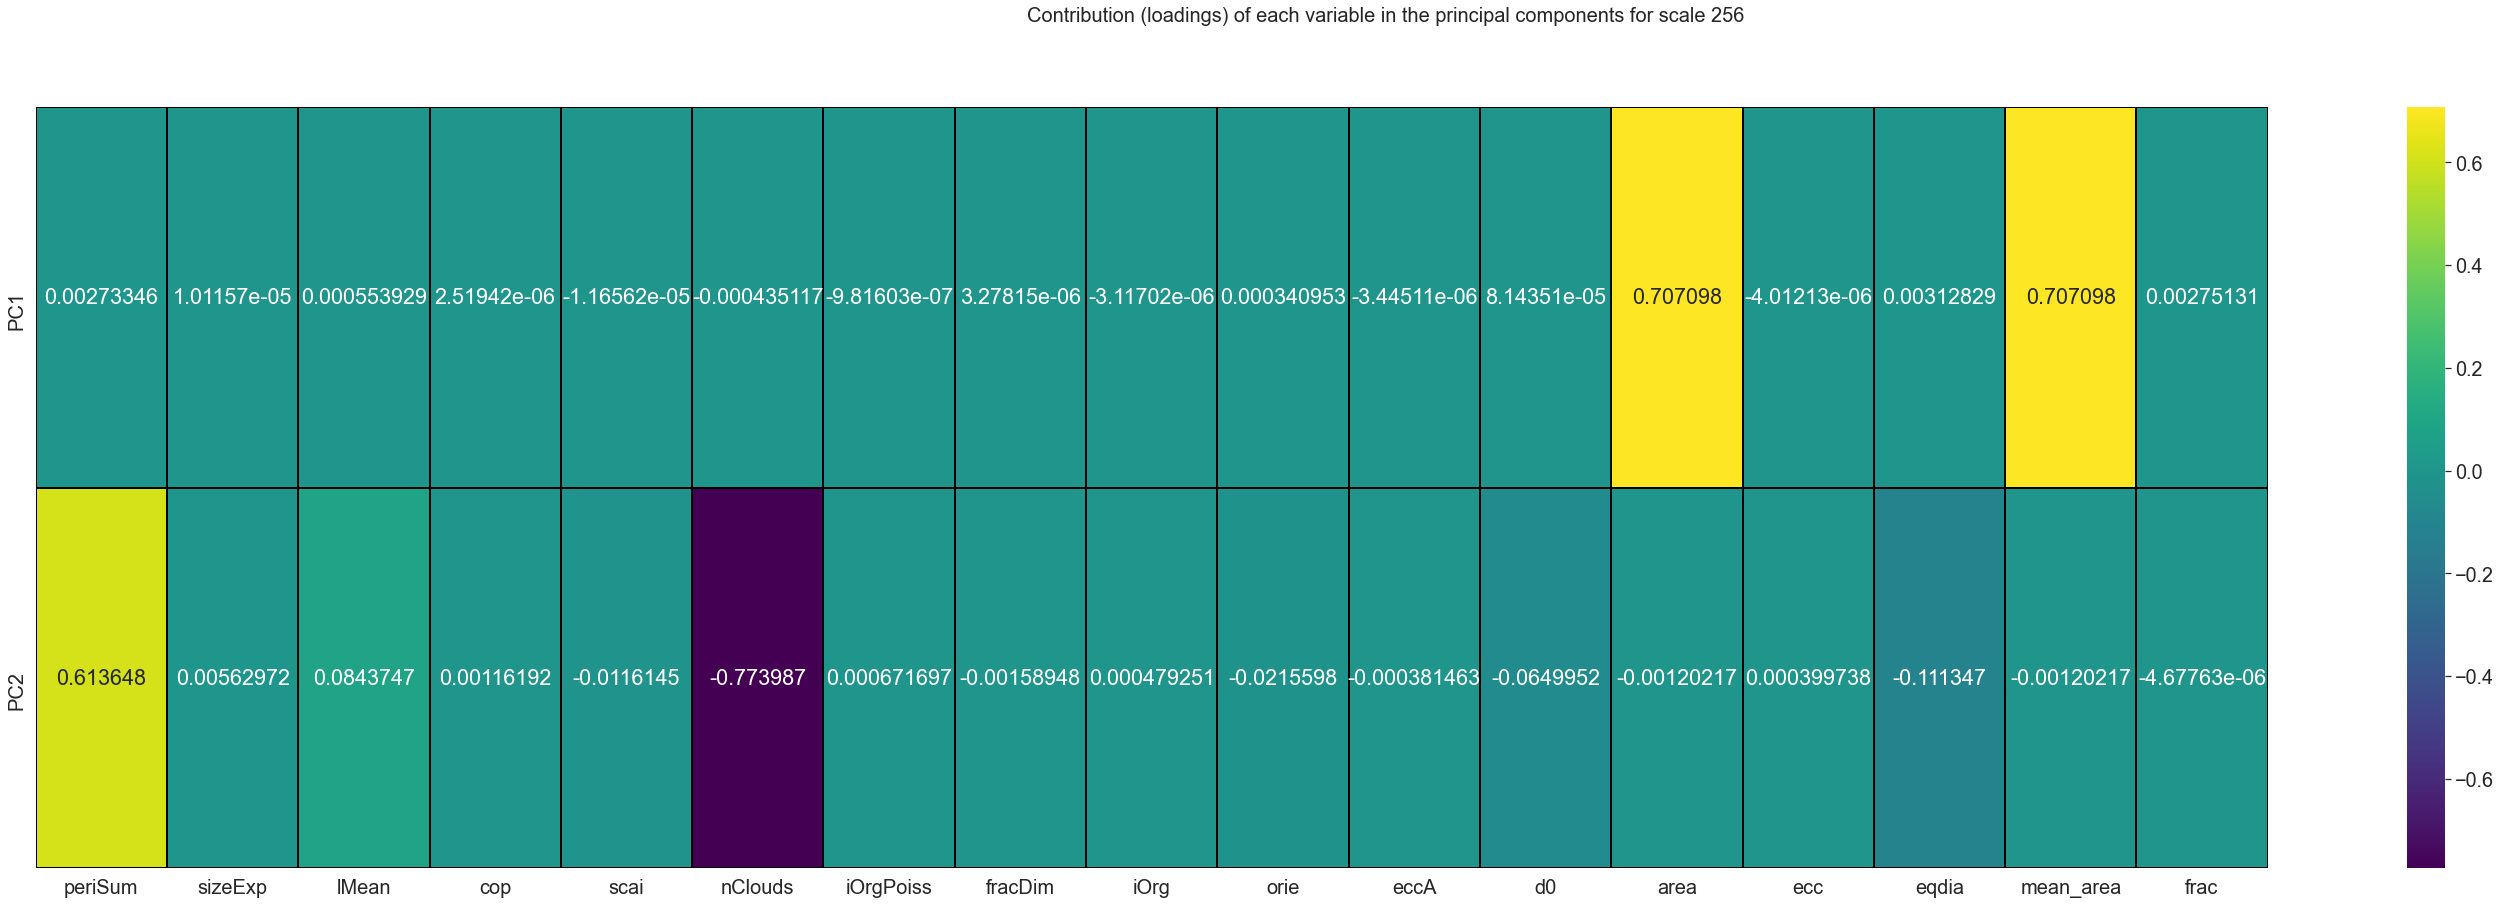

Scale : 256 explained variances of : [9.99976721e-01 1.18943346e-05]
Cluster scale silouhette scale 256 = -0.23826300623727384
Classes scale silouhette scale 256 = -0.07108085142826902


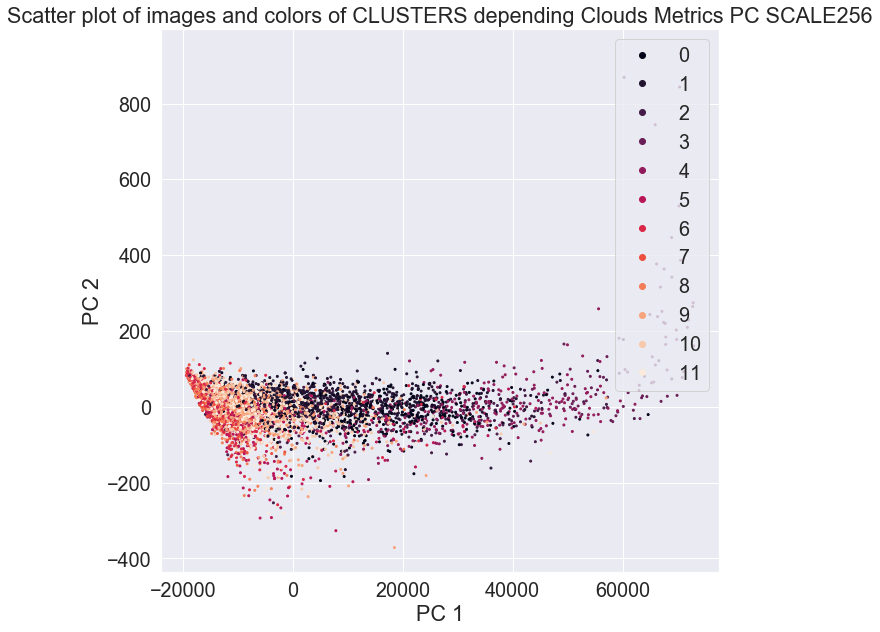

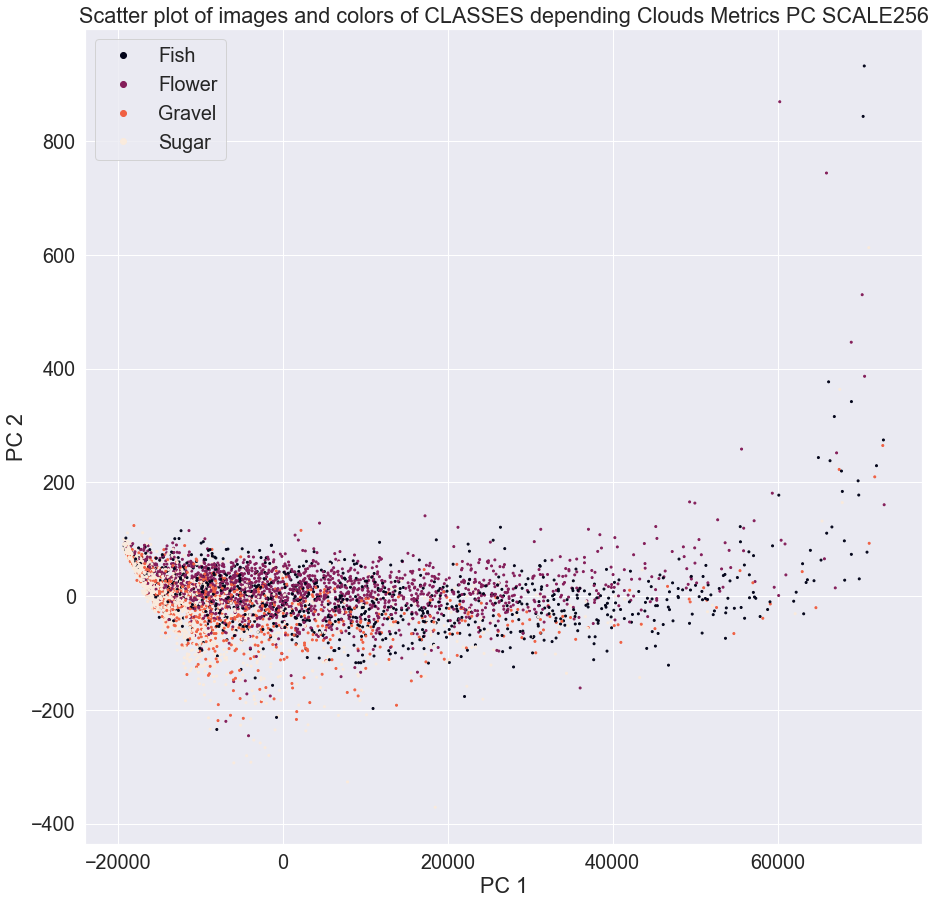

(4, 12)
(4,)
(12, 4)


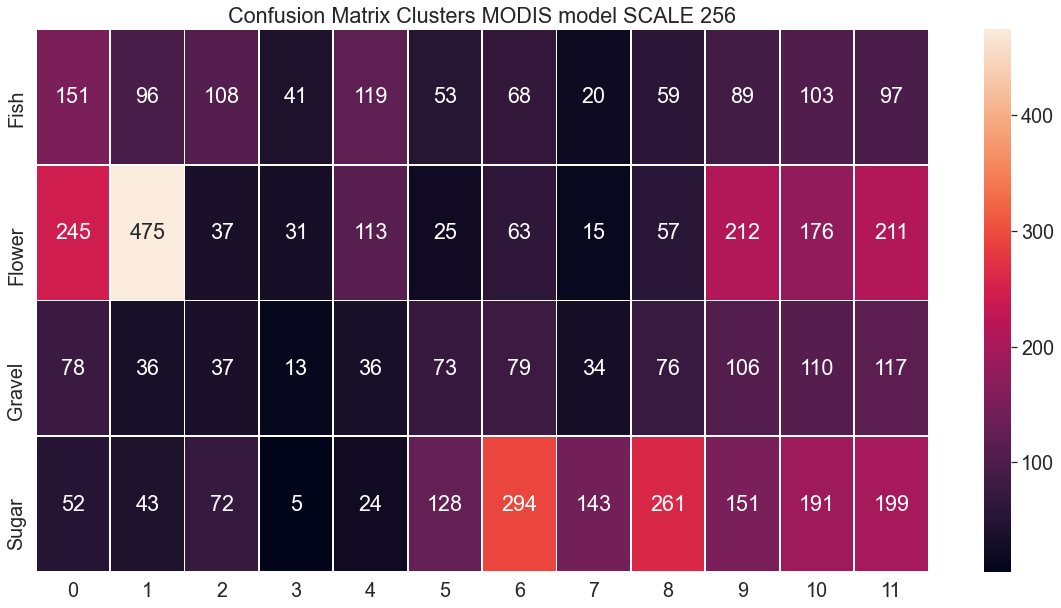

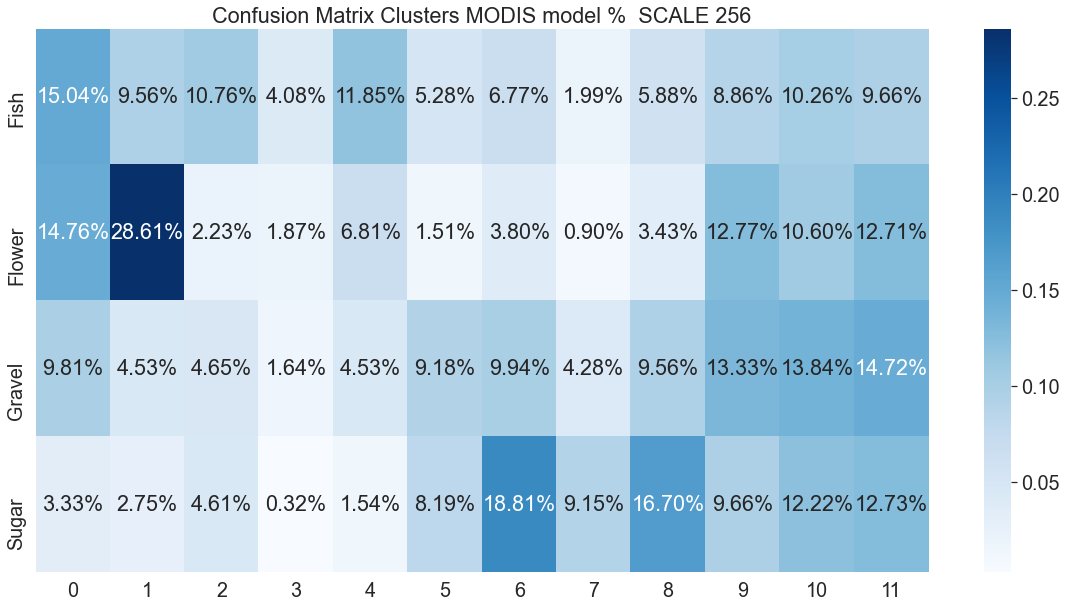

shape components : (17, 2)
explained variance shapoe : (2,)


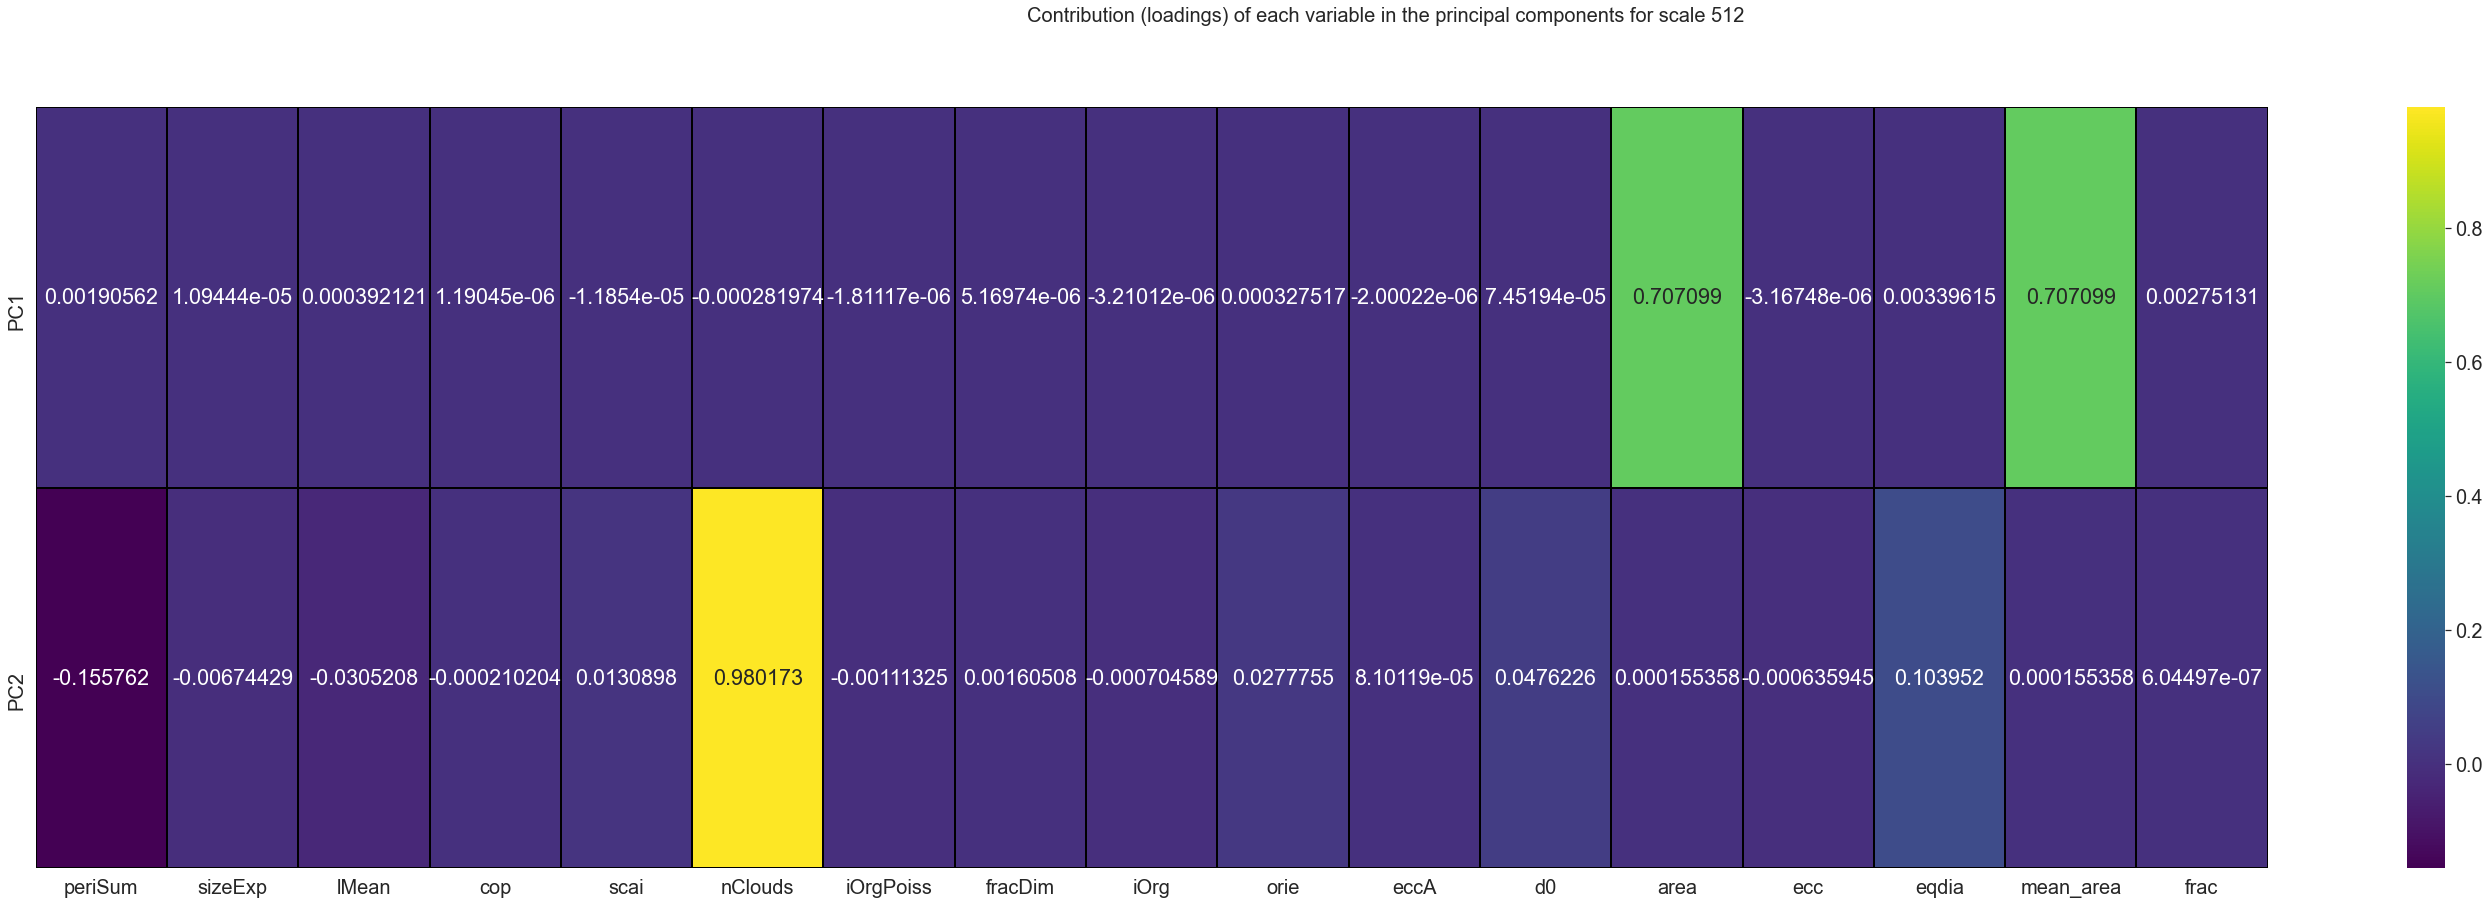

Scale : 512 explained variances of : [9.99986449e-01 1.08822686e-05]
Cluster scale silouhette scale 512 = -0.25901691804655486
Classes scale silouhette scale 512 = -0.03543414516907521


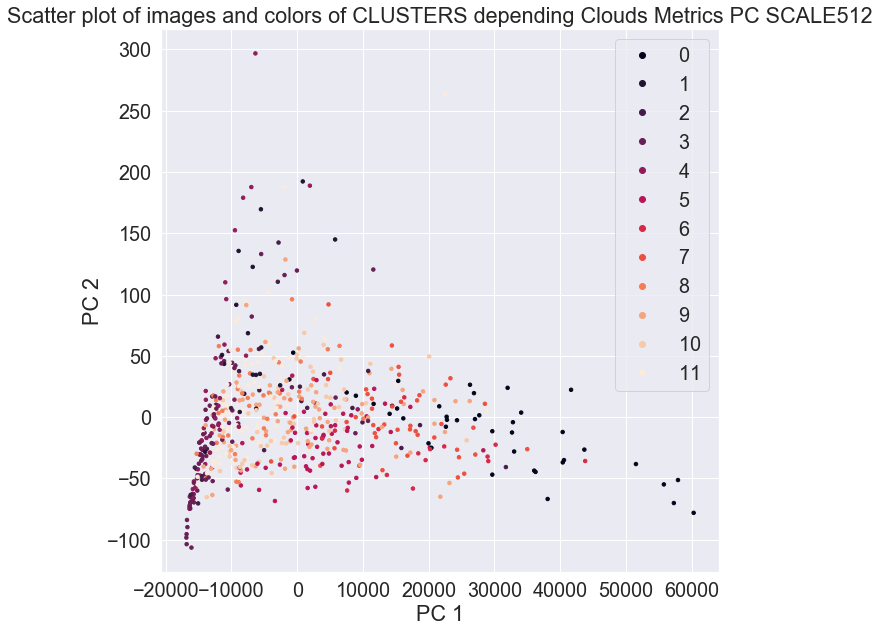

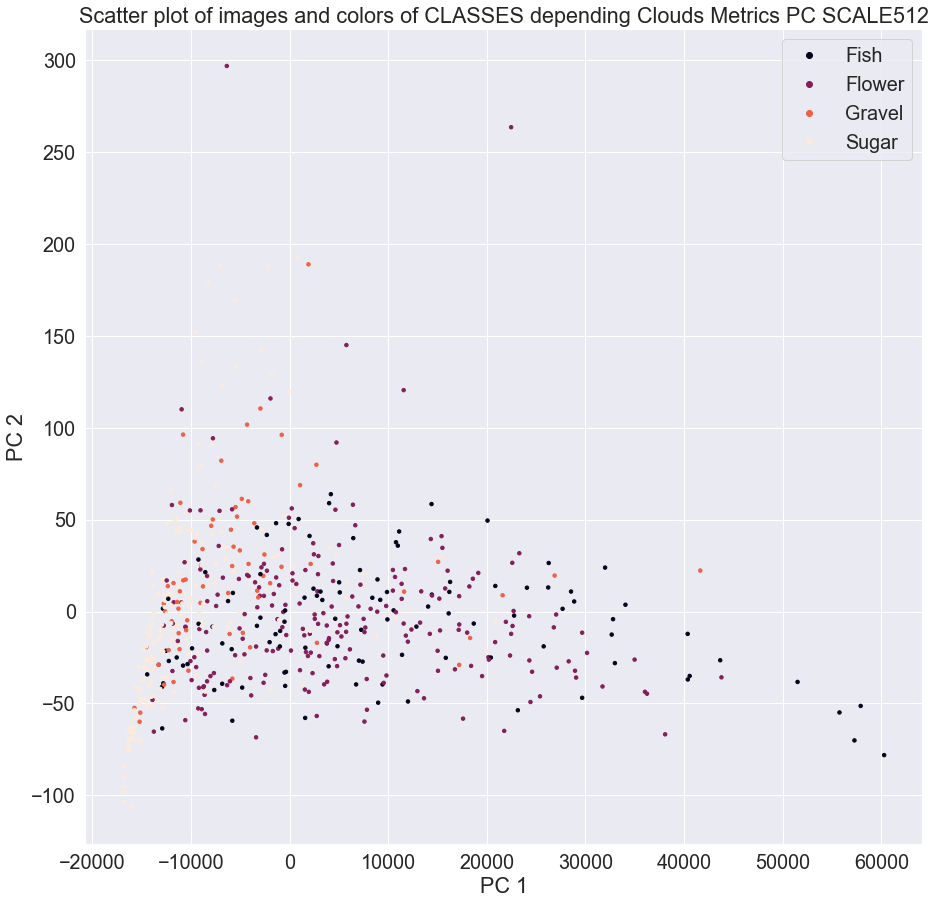

(4, 12)
(4,)
(12, 4)


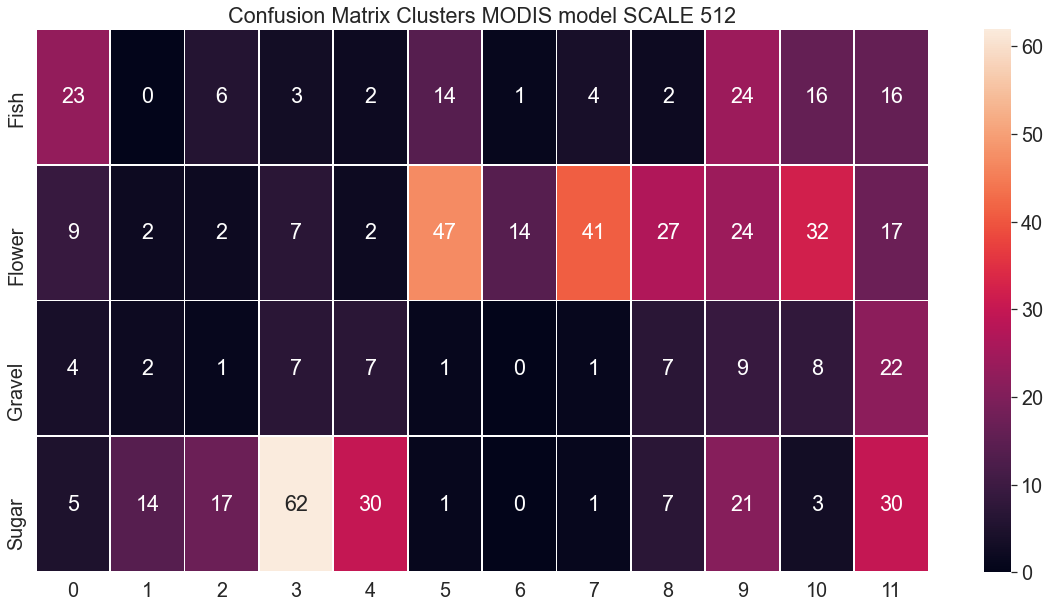

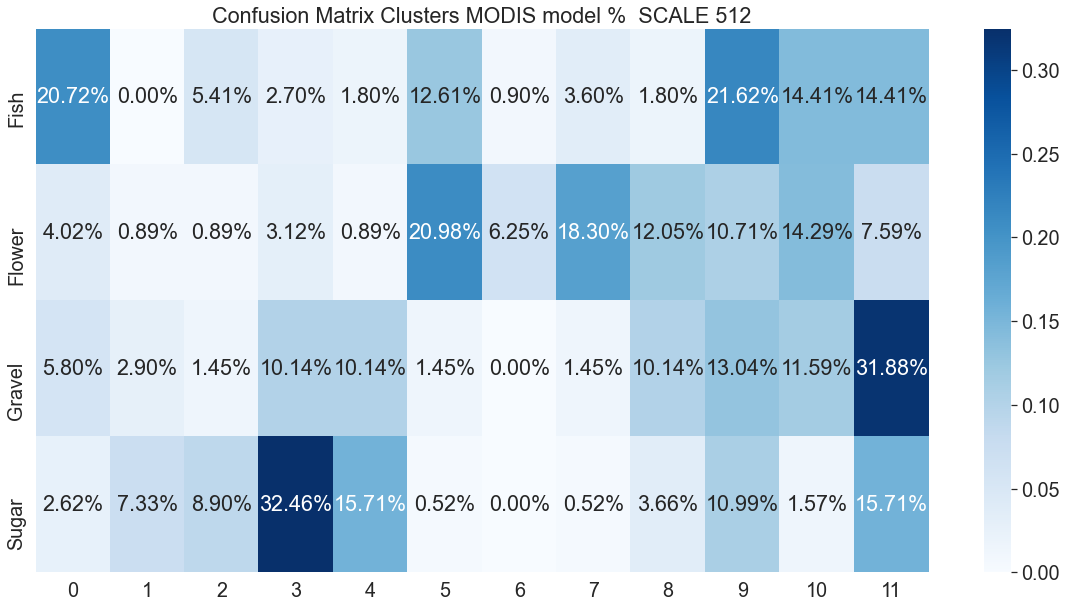

shape components : (17, 2)
explained variance shapoe : (2,)


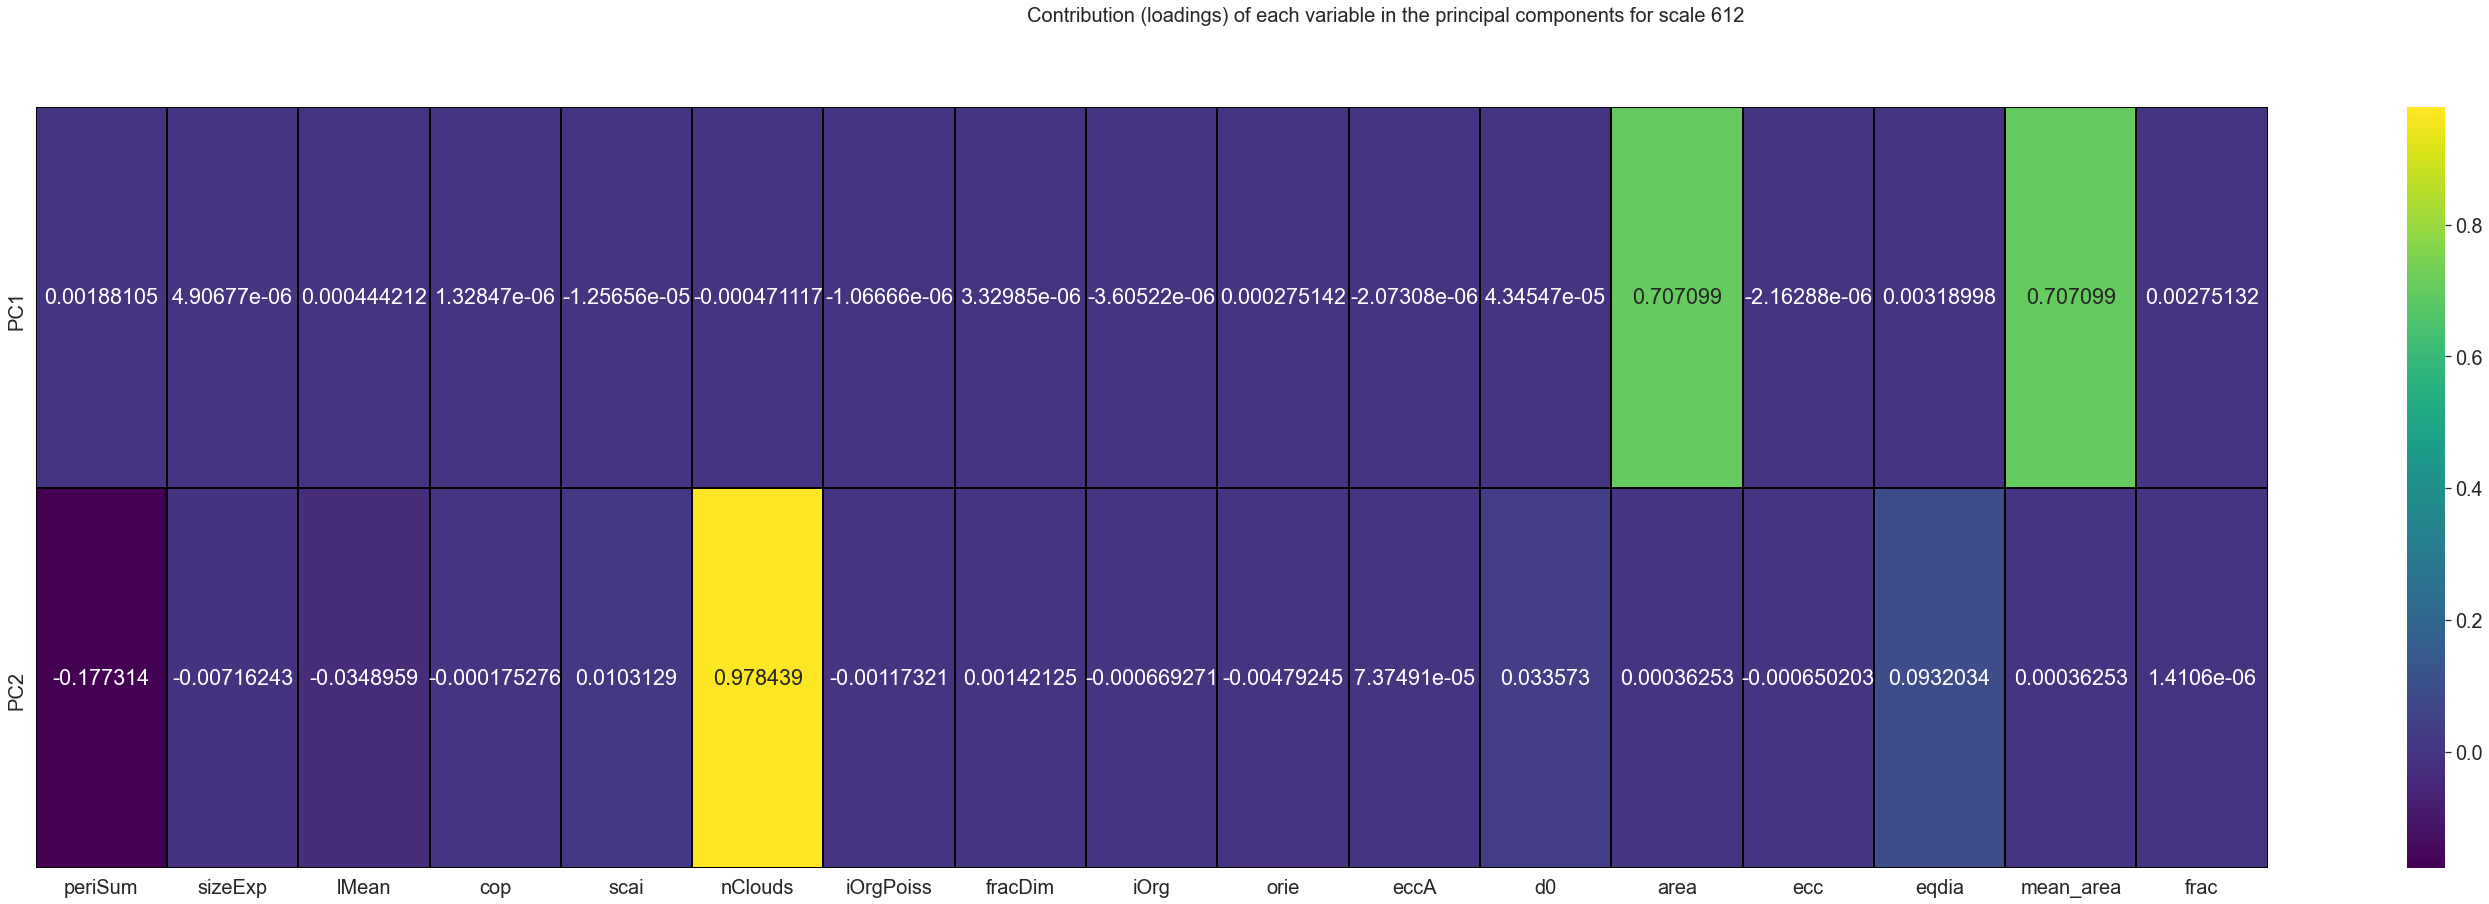

Scale : 612 explained variances of : [9.99984247e-01 1.29695456e-05]
Cluster scale silouhette scale 612 = -0.25077436603361514
Classes scale silouhette scale 612 = -0.06301196540787701


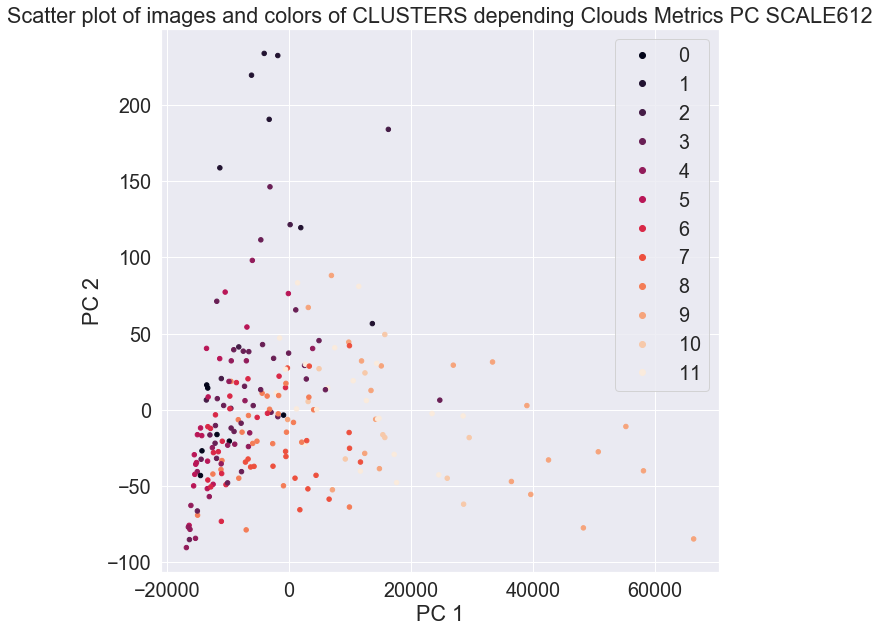

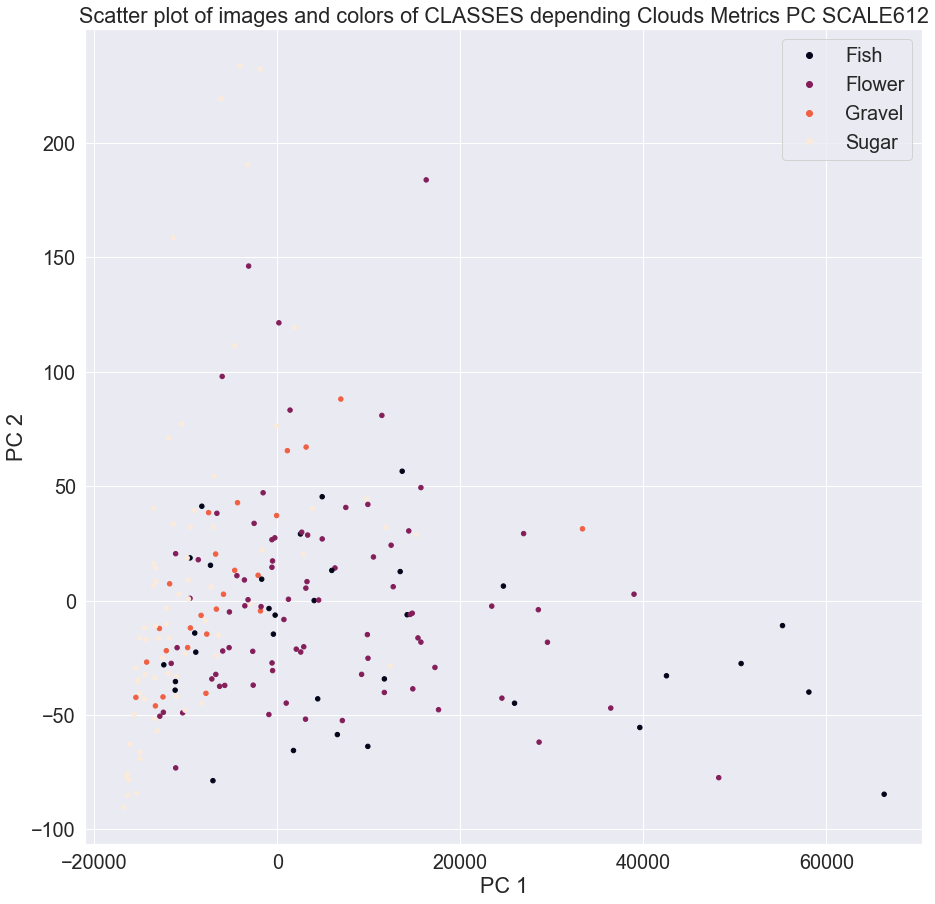

(4, 12)
(4,)
(12, 4)


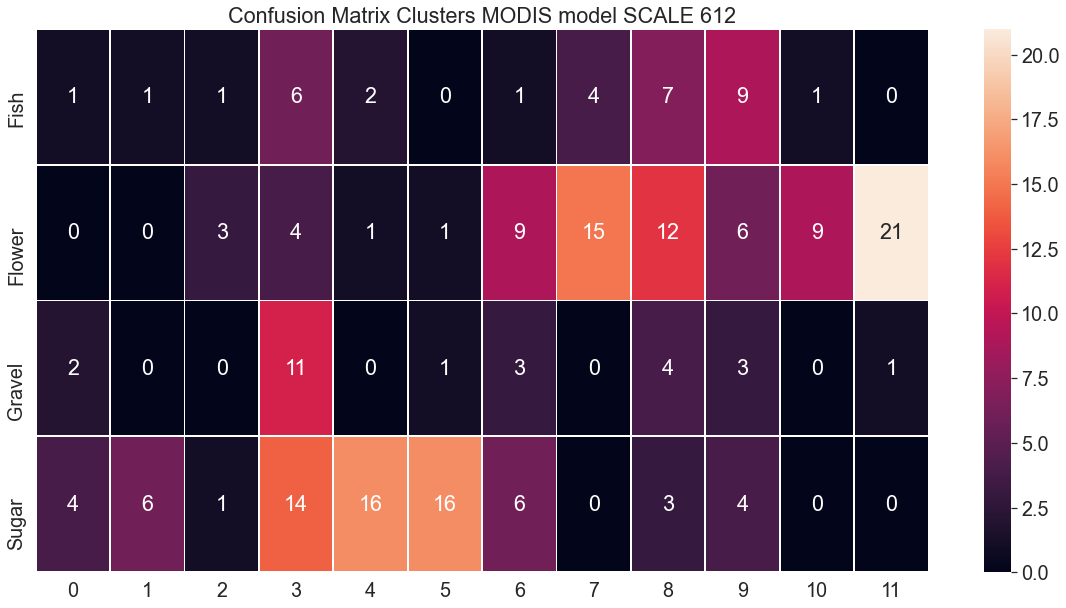

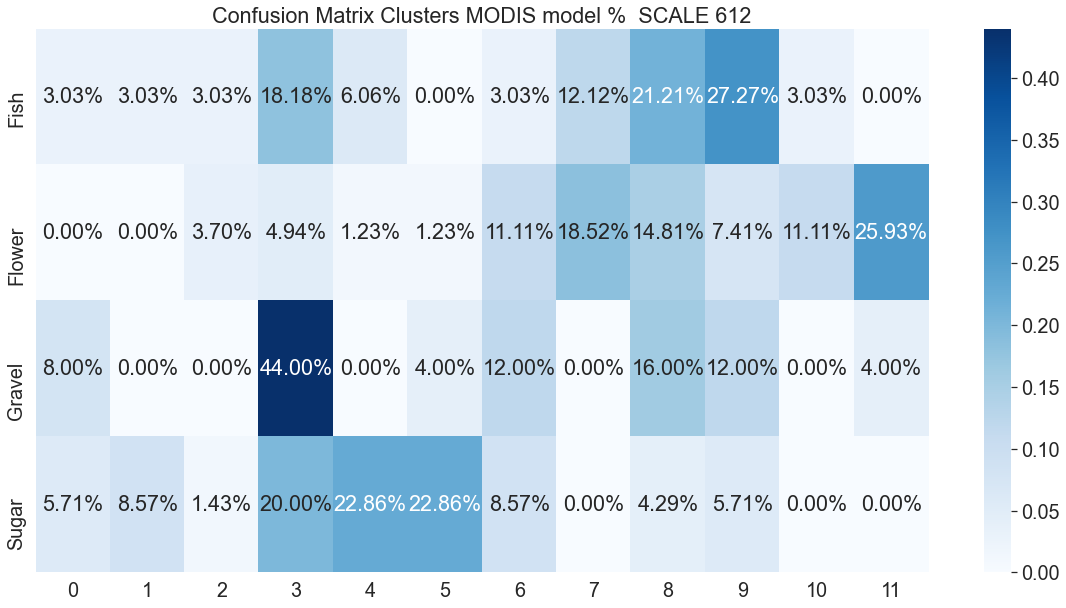

In [6]:
divisions = [256, 512, 612]from sklearn import preprocessing

import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
r = 0
for div in divisions:
    variables = ["mean_area", "ecc", "frac", "eqdia", "sizeExp", "cop", "scai", "nClouds", "iOrgPoiss", "iOrg", "orie", "eccA", "d0", "area", "lMean", "lMax", "periSum", "specLMom"]
    sns.set(rc={'figure.figsize':(10, 10)})
    sns.set_theme(style="whitegrid")
    file_name = str(div)+" scale clouds physics metrics.csv"
    df = pd.read_csv(file_name, sep='\t', encoding='utf-8') #.dropna(df=(df-df.min())/(df.max()-df.min()))
    
    
    
    df.drop('cf', axis=1, inplace=True)
    df.drop('lMax', axis=1, inplace=True)
    df.drop('filename', axis=1, inplace=True)
    df.drop('specLMom', axis=1, inplace=True)
    df.drop('scai initi', axis=1, inplace=True)
    df.dropna(axis=0, how='any', inplace=True)
    
    df.drop('Unnamed: 0', axis=1, inplace=True)
    clusters = df['clusters']
    labs = df['labels']
    df.drop('clusters', axis=1, inplace=True)
    df.drop('labels', axis=1, inplace=True)
    X = df.to_numpy()
    pca = PCA(n_components=2)
    
    X_new = pca.fit_transform(X)
    print("shape components : "+str(pca.components_.T.shape))
    print("explained variance shapoe : "+str(pca.explained_variance_.shape))
    #loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
    loadings = pd.DataFrame(pca.components_, index=['PC1', 'PC2'], columns=df.columns)
    
    fig, ax = plt.subplots(figsize=(50,14)) 
    sns.set(font_scale=1.8)
    sns.heatmap(loadings, annot=True, fmt="g", cmap='viridis', ax=ax, linewidths=1, linecolor='black')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    fig.suptitle("Contribution (loadings) of each variable in the principal components for scale "+str(div), fontsize=20)
    plt.show()

    print("Scale : "+str(div)+" explained variances of : "+str(pca.explained_variance_ratio_))
    fig, ax = plt.subplots()


    clusters_score = silhouette_score (X_new, clusters, metric='euclidean')
    classes_score = silhouette_score (X_new, labs, metric='euclidean')

    print("Cluster scale silouhette scale "+str(div)+" = "+str(clusters_score))
    print("Classes scale silouhette scale "+str(div)+" = "+str(classes_score))
    
    scatter = ax.scatter(X_new[:, 0], X_new[:, 1], c=clusters, s=4+r)
    plt.title('Scatter plot of images and colors of CLUSTERS depending Clouds Metrics PC SCALE'+str(div))
    ax.legend(*scatter.legend_elements())
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    plt.show()

    classes = ['Fish', 'Flower', 'Gravel', 'Sugar']

    fig, ax = plt.subplots(figsize=(15,15))

    scatter = ax.scatter(X_new[:, 0], X_new[:, 1], c=labs, s=4+r)
    plt.title('Scatter plot of images and colors of CLASSES depending Clouds Metrics PC SCALE'+str(div))
    ax.legend(handles=scatter.legend_elements()[0], labels=classes)
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    plt.show()
    try:
        os.makedirs("visualize/"+str(div))
    except:
        pass
    clclc = clusters
    cfs_mat = confusion_matrix(labs, clclc)

    associations = ['Fish', 'Flower', 'Gravel', 'Sugar']
    fig, ax = plt.subplots(figsize=(20,10)) 
    plt.title("Confusion Matrix Clusters MODIS model SCALE "+str(div))
    sns.set(font_scale=1.8)
    sns.heatmap(cfs_mat[:4,:], annot=True, fmt='', ax=ax, linewidths=.9, yticklabels=associations)
    fig, ax = plt.subplots(figsize=(20,10))
    print(cfs_mat[:4,:].shape)
    print(   np.sum(  cfs_mat[:4,:], axis=1  ).shape  )
    print(   (  cfs_mat[:4,:].T/np.sum(cfs_mat[:4,:], axis=1)    ).shape  )
    plt.title("Confusion Matrix Clusters MODIS model %  SCALE "+str(div))
    sns.heatmap( (cfs_mat[:4,:].T/np.sum(cfs_mat[:4,:], axis=1)).T, annot=True, 
                fmt='.2%', cmap='Blues' , yticklabels=associations)
    
    r += 8
    plt.show()